In [23]:
### at month change, must recode in places marked fix

# uses first sheet of scb excel
### USES fhm_scb_dead.csv FHM sheet antal avlidna per dag
# fhm_dead = pd.read_csv('fhm_scb_dead.csv',sep=';',header=0,index_col=0,parse_dates=True,names=['fhm_dead'])

# historical death data from: (in scb_dead_per_month.csv)
# http://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__BE__BE0101__BE0101G/ManadFoddDod/table/tableViewLayout1/

#### !!!!! ANOMALY in SCB data: historical death data for (at least ) 2019 from statistikdatabasen 
# http://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__BE__BE0101__BE0101G/ManadFoddDod/table/tableViewLayout1/
# does not concur with death data 2019 in the preliminary data! 

### DUE to okänd dödsdag when using the daily data of the preliminary stuff - much more okänd dag than okänd månad in 
### the monthly stuff
####



### uses 2019 population for 2020 in curr_pop, multiplied with same growth factor as 2018->2019

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

sns.set()

In [24]:
def parse_scb_prel_2021(YTD=True):
    
    df = pd.read_csv('scb-dead_per_day.csv',sep=';',thousands=',',header=0,usecols=[1,2,3,4,5,6,7,8,9])
    unknown_date = df.loc[366]
    df = df.loc[:365]
    
    daily_ratio = df / df.sum()
    
    df = df + daily_ratio * unknown_date
    df.index = pd.date_range('2020-01-01','2020-12-31')
    return df

In [25]:


def parse_scb_prel(YTD=True):
    
    def monthname2number(m):
        if m == 'januari' : return 1
        if m == 'februari' : return 2
        if m == 'mars' : return 3
        if m == 'april' : return 4
        if m == 'maj' : return 5
        if m == 'juni' : return 6
        if m == 'juli' : return 7
        if m == 'augusti' : return 8
        if m == 'september' : return 9
        if m == 'oktober' : return 10
        if m == 'november' : return 11
        if m == 'december' : return 12

    df = pd.read_csv('scb-dead_per_day.csv',sep=';',usecols=[1,2,3,4,5,6,7,10,11],thousands=',')
    
    df['month'] = df['Månad'].apply(monthname2number)
    df[['Månad','month']] = df[['Månad','month']].replace(np.nan,0)
    df['month'] = df['month'].astype(int)
    
    df = df.replace(np.nan,0)

    
    df[['2015','2016','2017','2018','2019','2020','2015-2019']] = df[['2015','2016','2017','2018','2019','2020','2015-2019']].astype(int)

    unknown_death_day = df.iloc[-1,:7]
    
    df.drop(366,inplace=True)
    
    if YTD:
        df = df.loc[df['2020'] != 0]
    
    #df = df.loc[df['2020'] != 0]
    
    #df = df.drop('Månad',axis=1)
    
    index = pd.date_range('2020-01-01',periods=len(df))
    df.index = index
    
    known_death_day = df.iloc[:,:7].sum()
    
    
    unknown_death_day[['2015','2016','2017','2018','2019','2015-2019']] = unknown_death_day[
    ['2015','2016','2017','2018','2019','2015-2019']] 
    
    dead_pct_per_day = df[['2015','2016','2017','2018','2019','2020','2015-2019']] / known_death_day
    
    all_deaths = df[['2015','2016','2017','2018','2019','2020','2015-2019']] + unknown_death_day * dead_pct_per_day
    
    all_deaths = pd.concat([all_deaths,df['Månad']],axis=1)
    
    return all_deaths

In [26]:
# PARAM #####
last_complete_month = '2020-12-31'
curr_pop = 10327589 * 1.009521235441979 #from scb.se for 2019-12-31 * estimated growth factor


In [27]:
def date_parser(m):
    eng_months = {'januari' : 'January',
                 'februari' : 'February',
                 'mars' : 'March',
                 'april' : 'April',
                 'maj' : 'May',
                 'juni' : 'June',
                 'juli' : 'July',
                 'augusti' : 'August',
                 'september' : 'September',
                 'oktober' : 'October',
                 'november' : 'November',
                 'december' : 'December'}
    
    eng = eng_months[m]
    
    return pd.datetime.strptime(eng,'%B').date().strftime('%B')
    
    



In [28]:
url_0 = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101G/ManadFoddDod'

data_0 = {
  "query": [
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    },
    {
      "code": "Manad",
      "selection": {
        "filter": "item",
        "values": [
          "01",
          "02",
          "03",
          "04",
          "05",
          "06",
          "07",
          "08",
          "09",
          "10",
          "11",
          "12",
          "90"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "000000NF"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "1990",
          "1991",
          "1992",
          "1993",
          "1994",
          "1995",
          "1996",
          "1997",
          "1998",
          "1999",
          "2000",
          "2001",
          "2002",
          "2003",
          "2004",
          "2005",
          "2006",
          "2007",
          "2008",
          "2009",
          "2010",
          "2011",
          "2012",
          "2013",
          "2014",
          "2015",
          "2016",
          "2017",
          "2018",
          "2019"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [29]:
r0 = requests.post(url_0,json=data_0)
r0.status_code

200

In [30]:
json_0 = r0.json()
json_0['data'][0]


{'key': ['1', '01', '1990'], 'values': ['4458']}

In [31]:
data_list_0 = []

nr_records_0 = (len(json_0['data']))

for rec_0 in range(nr_records_0):

    data_list_0.append ((json_0['data'][rec_0]['key'][0],
                        json_0['data'][rec_0]['key'][1],json_0['data'][rec_0]['key'][2],json_0['data'][rec_0]['values'][0]))



In [32]:
death_df = pd.DataFrame(data_list_0,columns=['gender','month','year','dead'])

death_df

,gender,month,year,dead
0,1,01,1990,4458
1,1,01,1991,4576
2,1,01,1992,4681
3,1,01,1993,4360
4,1,01,1994,4591
...,...,...,...,...
775,2,90,2015,23
776,2,90,2016,56
777,2,90,2017,55
778,2,90,2018,75


In [33]:
death_df['dead'] = death_df['dead'].astype(int)
death_df

,gender,month,year,dead
0,1,01,1990,4458
1,1,01,1991,4576
2,1,01,1992,4681
3,1,01,1993,4360
4,1,01,1994,4591
...,...,...,...,...
775,2,90,2015,23
776,2,90,2016,56
777,2,90,2017,55
778,2,90,2018,75


In [34]:
death_df = death_df.groupby(['year','month']).sum().unstack()


In [35]:
death_df.columns = range(1,14)
death_df

,1,2,3,4,5,6,7,8,9,10,11,12,13
year,,,,,,,,,,,,,
1990,8741,7559,8421,7976,7926,7421,7696,7499,7367,7587,7878,8894,196
1991,8981,7429,8003,7929,7969,7645,8006,7529,7622,7463,7866,8552,208
1992,9142,8391,8328,7749,7516,7537,7603,7219,7250,7708,7731,8289,247
1993,8782,7626,9098,7866,7511,7268,7500,7267,7308,7539,7892,11057,294
1994,9188,7278,7743,7188,7428,7079,7707,7162,7654,7509,7514,8071,323
1995,8324,7385,8086,8144,7790,7341,7446,7266,7335,7517,7708,9238,375
1996,10132,8154,7993,7425,7534,7158,7276,7159,7136,7511,7541,8754,360
1997,9383,8187,8039,7525,7605,7288,7367,7345,7296,7618,7185,8059,429
1998,8079,7860,8629,7984,7420,7006,7381,7357,6982,7637,7846,8730,360


In [36]:

no_month = death_df[13]
print (no_month)
death_df = death_df.iloc[:,:-1]
death_df

year
1990    196
1991    208
1992    247
1993    294
1994    323
1995    375
1996    360
1997    429
1998    360
1999    378
2000    383
2001    419
2002    401
2003    415
2004    346
2005    206
2006    159
2007    138
2008    112
2009    120
2010     45
2011     52
2012     22
2013     20
2014     22
2015     91
2016    186
2017    197
2018    248
2019    262
Name: 13, dtype: int64


,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1990,8741,7559,8421,7976,7926,7421,7696,7499,7367,7587,7878,8894
1991,8981,7429,8003,7929,7969,7645,8006,7529,7622,7463,7866,8552
1992,9142,8391,8328,7749,7516,7537,7603,7219,7250,7708,7731,8289
1993,8782,7626,9098,7866,7511,7268,7500,7267,7308,7539,7892,11057
1994,9188,7278,7743,7188,7428,7079,7707,7162,7654,7509,7514,8071
1995,8324,7385,8086,8144,7790,7341,7446,7266,7335,7517,7708,9238
1996,10132,8154,7993,7425,7534,7158,7276,7159,7136,7511,7541,8754
1997,9383,8187,8039,7525,7605,7288,7367,7345,7296,7618,7185,8059
1998,8079,7860,8629,7984,7420,7006,7381,7357,6982,7637,7846,8730


In [37]:
death_monthly_ratio = death_df.div(death_df.sum(axis=1),axis=0)
death_monthly_ratio

,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1990,0.092044,0.079598,0.088675,0.083989,0.083462,0.078145,0.081040,0.078966,0.077576,0.079893,0.082957,0.093656
1991,0.094543,0.078205,0.084247,0.083468,0.083890,0.080479,0.084279,0.079258,0.080237,0.078563,0.082805,0.090027
1992,0.096779,0.088828,0.088162,0.082032,0.079566,0.079788,0.080487,0.076421,0.076750,0.081598,0.081842,0.087749
1993,0.090804,0.078851,0.094071,0.081333,0.077662,0.075149,0.077548,0.075139,0.075563,0.077951,0.081601,0.114327
1994,0.100392,0.079523,0.084604,0.078539,0.081162,0.077348,0.084210,0.078255,0.083631,0.082047,0.082101,0.088187
1995,0.088951,0.078916,0.086407,0.087027,0.083244,0.078446,0.079568,0.077645,0.078382,0.080327,0.082368,0.098718
1996,0.108048,0.086955,0.085238,0.079181,0.080343,0.076333,0.077592,0.076344,0.076099,0.080098,0.080418,0.093353
1997,0.101004,0.088130,0.086537,0.081004,0.081865,0.078452,0.079303,0.079066,0.078539,0.082005,0.077344,0.086752
1998,0.086954,0.084597,0.092874,0.085932,0.079861,0.075405,0.079442,0.079183,0.075147,0.082197,0.084446,0.093961


In [38]:
add_deaths = death_monthly_ratio.mul(no_month,axis=0)
add_deaths

,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1990,18.040710,15.601158,17.380256,16.461812,16.358616,15.316338,15.883915,15.477323,15.204886,15.658948,16.259548,18.356489
1991,19.664905,16.266627,17.523465,17.361433,17.449018,16.739584,17.530033,16.485589,16.689222,16.341074,17.223488,18.725562
1992,23.904322,21.940622,21.775891,20.261933,19.652689,19.707600,19.880175,18.876100,18.957158,20.154727,20.214867,21.673915
1993,26.696321,23.182207,27.656927,23.911781,22.832620,22.093926,22.799181,22.090887,22.215522,22.917737,23.990818,33.612073
1994,32.426700,25.685843,27.326941,25.368211,26.215229,24.983523,27.199889,25.276450,27.012839,26.501098,26.518744,28.484534
1995,33.356486,29.593663,32.402757,32.635178,31.216606,29.417343,29.838106,29.116798,29.393300,30.122622,30.888010,37.019128
1996,38.897337,31.303680,30.685592,28.505007,28.923464,27.479978,27.932987,27.483817,27.395519,28.835166,28.950338,33.607115
1997,43.330861,37.807712,37.124245,34.750584,35.120025,33.656114,34.020937,33.919341,33.693058,35.180060,33.180458,37.216605
1998,31.303506,30.454952,33.434577,30.935411,28.750094,27.145978,28.598982,28.505990,27.052986,29.590899,30.400706,33.825919


In [39]:
death_df = death_df + add_deaths

In [40]:
death_df.columns = ['January','February','March','April','May','June',
                    'July','August','September','October','November','December']
death_df = death_df.T

death_df

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
January,8759.040710,9000.664905,9165.904322,8808.696321,9220.426700,8357.356486,10170.897337,9426.330861,8110.303506,8647.507504,...,8556.255103,8638.994860,8434.018191,8790.944856,8105.004025,8673.682556,8706.799837,9301.924315,8826.746087,8396.783784
February,7574.601158,7445.266627,8412.940622,7649.182207,7303.685843,7414.593663,8185.303680,8224.807712,7890.454952,8467.790351,...,7316.638630,7274.205772,8386.006702,7933.755217,7408.831891,8100.108395,7827.001212,8042.226096,8359.489052,7509.163902
March,8438.380256,8020.523465,8349.775891,9125.656927,7770.326941,8118.402757,8023.685592,8076.124245,8662.434577,9106.338449,...,8068.012295,8143.708497,8755.095022,8566.895289,7689.901387,8674.683558,8179.722301,8265.704778,9462.456302,7814.063839
April,7992.461812,7946.361433,7769.261933,7889.911781,7213.368211,8176.635178,7453.505007,7559.750584,8014.935411,7522.016280,...,7508.734161,7519.347507,7708.844663,7909.749906,7213.783663,7738.746664,7560.456298,7747.595010,7818.032403,7394.826426
May,7942.358616,7986.449018,7535.652689,7533.832620,7454.215229,7821.216606,7562.923464,7640.120025,7448.750094,7559.164519,...,7305.633157,7310.226598,7453.783629,7197.592352,7388.826944,7358.365894,7148.614344,7504.073397,6971.755713,7168.157394
June,7436.316338,7661.739584,7556.707600,7290.093926,7103.983523,7370.417343,7185.479978,7321.656114,7033.145978,6958.768665,...,6857.410252,6712.881227,6791.625180,6837.512691,6817.685725,6852.859871,6716.731420,6851.675990,6680.973438,6653.638751
July,7711.883915,8023.530033,7622.880175,7522.799181,7734.199889,7475.838106,7303.932987,7401.020937,7409.598982,7419.607623,...,7257.609274,7194.159491,7173.716611,6932.533712,7384.825955,7127.134426,7245.813053,6941.869180,7488.144925,6964.556449
August,7514.477323,7545.485589,7237.876100,7289.090887,7187.276450,7295.116798,7186.483817,7378.919341,7385.505990,7537.076377,...,7013.487871,7023.060566,7071.692197,6935.534376,7196.779459,6820.827806,7171.661461,7011.017292,6989.804268,7051.813997
September,7382.204886,7638.689222,7268.957158,7330.215522,7681.012839,7364.393300,7163.395519,7329.693058,7009.052986,7228.846398,...,7085.523695,7105.108003,6938.660364,6843.514018,6991.728759,7013.020195,6885.075576,6927.839128,6970.753016,6875.292981
October,7602.658948,7479.341074,7728.154727,7561.917737,7535.501098,7547.122622,7539.835166,7653.180060,7666.590899,7635.469008,...,7457.708786,7616.403622,7485.791288,7279.610498,7454.843267,7246.253667,7499.331336,7603.285906,7460.069395,7558.308958


In [41]:
death_df.iloc[:,1:].sum()

year
1991    95202.0
1992    94710.0
1993    97008.0
1994    91844.0
1995    93955.0
1996    94133.0
1997    93326.0
1998    93271.0
1999    94726.0
2000    93461.0
2001    93752.0
2002    95009.0
2003    92961.0
2004    90532.0
2005    91710.0
2006    91177.0
2007    91729.0
2008    91449.0
2009    90080.0
2010    90487.0
2011    89938.0
2012    91938.0
2013    90402.0
2014    88976.0
2015    90907.0
2016    90982.0
2017    91972.0
2018    92185.0
2019    88766.0
dtype: float64

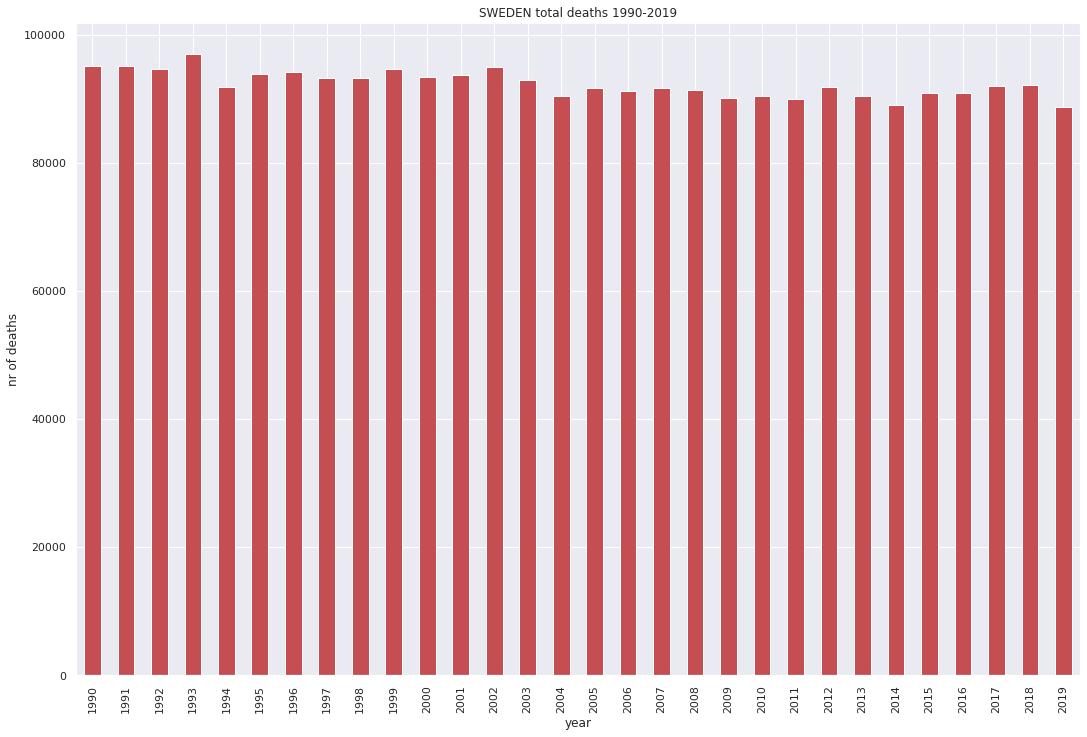

In [42]:
(death_df.iloc[:,:].sum()).plot(kind='bar',color='r',figsize=(18,12),
                               title='SWEDEN total deaths 1990-2019')
plt.ylabel('nr of deaths')
plt.savefig('total_number_of_deaths_1990_2019.jpg',format='jpg')

In [43]:
death_df[['2015','2016','2017','2018','2019']].sum().mean() - death_df.sum()['2019']

2196.4000000000087

In [44]:
scb_pop = pd.read_csv('scb_population.csv',encoding='ISO-8859-1')

scb_pop

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,8590630,8644119,8692013,8745109,8816381,8837496,8844499,8847625,8854322,8861426,...,9415570,9482855,9555893,9644864,9747355,9851017,9995153,10120242,10230185,10327589


In [45]:
pd.set_option("display.precision", 2)
deaths_per_m = death_df / (scb_pop.loc[0,:] / 1e6)
deaths_per_m = deaths_per_m.T
deaths_per_m

,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1990,1019.60,881.73,982.28,930.37,924.54,865.63,897.71,874.73,859.33,884.99,918.94,1037.45
1991,1041.25,861.31,927.86,919.28,923.92,886.35,928.21,872.90,883.69,865.25,911.98,991.51
1992,1054.52,967.89,960.63,893.84,866.96,869.39,877.00,832.70,836.28,889.11,891.76,956.13
1993,1007.27,874.68,1043.52,902.21,861.49,833.62,860.23,833.50,838.21,864.70,905.19,1268.21
1994,1045.83,828.42,881.35,818.18,845.50,805.77,877.25,815.22,871.22,854.72,855.29,918.69
1995,945.67,838.99,918.63,925.22,885.00,833.99,845.92,825.47,833.31,853.99,875.69,1049.51
1996,1149.97,925.47,907.20,842.73,855.10,812.42,825.82,812.54,809.93,852.49,855.89,993.57
1997,1065.41,929.61,912.80,854.44,863.52,827.53,836.50,834.00,828.44,865.00,815.83,915.07
1998,915.97,891.14,978.33,905.20,841.26,794.32,836.83,834.11,791.60,865.86,889.55,989.78


Text(0, 0.5, 'deaths per million')

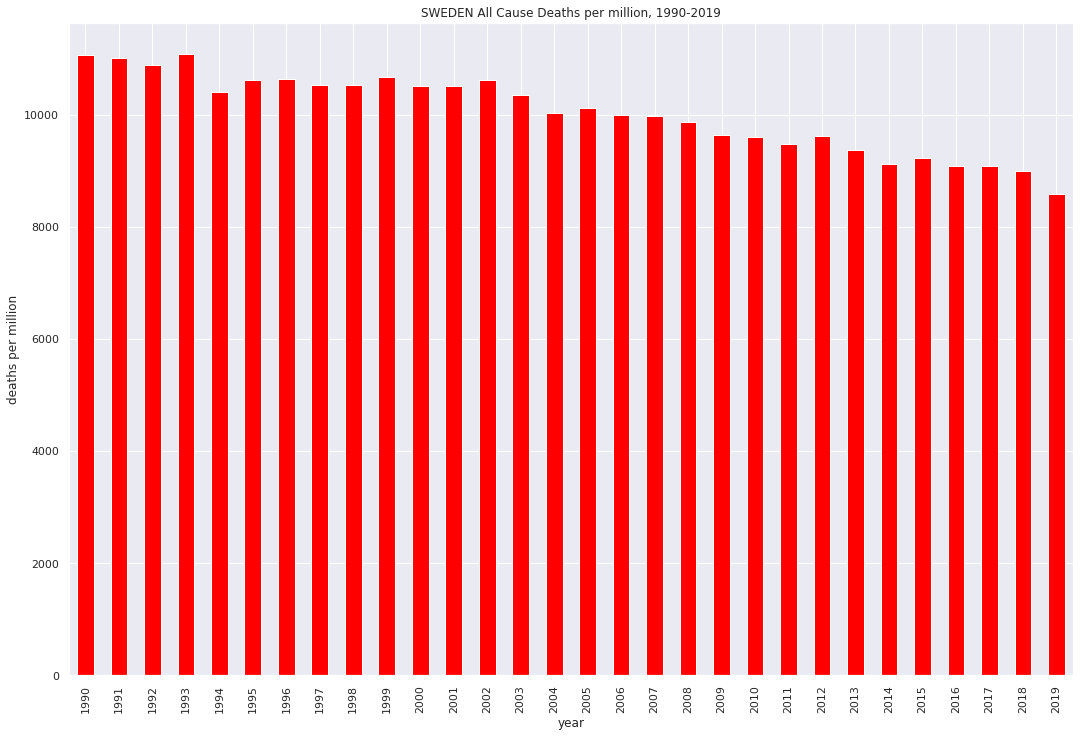

In [46]:
deaths_per_m.loc[:,'January' : 'September'].sum(axis=1)

deaths_per_m.sum(axis=1).plot(kind='bar',
                              figsize=(18,12),
                              color='red',
                              title='SWEDEN All Cause Deaths per million, 1990-2019')

plt.ylabel('deaths per million')

In [47]:
monthly_deaths = []

for r,v in deaths_per_m.iterrows():
    monthly_deaths.extend(v)
    


In [48]:
dates = pd.date_range('1990-01-01','2019-12-31',freq='M')
dates

DatetimeIndex(['1990-01-31', '1990-02-28', '1990-03-31', '1990-04-30',
               '1990-05-31', '1990-06-30', '1990-07-31', '1990-08-31',
               '1990-09-30', '1990-10-31',
               ...
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', length=360, freq='M')

In [49]:
monthly_timeline = pd.DataFrame(data=monthly_deaths,index=dates,columns=['dead_per_million'])
scb_1990_2019 = monthly_timeline.copy()

In [50]:
scb_1990_2019.loc['2019-01-01' : '2019-08-31'].sum()

dead_per_million    5708.3
dtype: float64

In [51]:
scb_pop.mean()['2015':'2019'].mean()

10104837.2

In [52]:
scb_2020 = parse_scb_prel_2021()
scb_2020

,2015,2016,2017,2018,2019,2020,2021,2015-2019,2016-2020
2020-01-01,298.15,250.40,347.42,282.71,309.11,260.94,96.57,297.71,290.49
2020-01-02,274.90,278.00,324.88,320.74,284.38,310.25,113.86,296.69,303.83
2020-01-03,284.00,299.46,317.70,303.27,279.23,262.99,109.79,296.69,292.54
2020-01-04,258.73,265.73,312.58,292.99,290.56,281.48,80.31,284.41,288.44
2020-01-05,270.86,265.73,311.55,299.16,283.35,272.24,58.96,286.46,286.38
...,...,...,...,...,...,...,...,...,...
2020-12-27,229.42,254.49,277.73,246.73,245.23,315.38,0.00,250.65,267.91
2020-12-28,276.92,267.78,279.78,268.31,221.53,323.60,0.00,262.93,272.01
2020-12-29,295.12,280.04,282.86,270.37,251.41,223.95,0.00,276.23,261.75
2020-12-30,286.02,313.77,281.83,238.50,232.86,141.77,0.00,271.11,242.24


In [53]:
(scb_2020.loc[:,'2015' : '2020'].sum()).astype(int)

2015    90907
2016    90981
2017    91972
2018    92185
2019    88766
2020    97163
dtype: int64

In [54]:
pd.date_range('2020-01-01',pd.Timestamp((pd.to_datetime(last_complete_month) + pd.DateOffset(days=31))),
                                  freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31'],
              dtype='datetime64[ns]', freq='M')

In [55]:
last_date = scb_2020.index[-1].date()
last_date

datetime.date(2020, 12, 31)

In [56]:
scb_2020

,2015,2016,2017,2018,2019,2020,2021,2015-2019,2016-2020
2020-01-01,298.15,250.40,347.42,282.71,309.11,260.94,96.57,297.71,290.49
2020-01-02,274.90,278.00,324.88,320.74,284.38,310.25,113.86,296.69,303.83
2020-01-03,284.00,299.46,317.70,303.27,279.23,262.99,109.79,296.69,292.54
2020-01-04,258.73,265.73,312.58,292.99,290.56,281.48,80.31,284.41,288.44
2020-01-05,270.86,265.73,311.55,299.16,283.35,272.24,58.96,286.46,286.38
...,...,...,...,...,...,...,...,...,...
2020-12-27,229.42,254.49,277.73,246.73,245.23,315.38,0.00,250.65,267.91
2020-12-28,276.92,267.78,279.78,268.31,221.53,323.60,0.00,262.93,272.01
2020-12-29,295.12,280.04,282.86,270.37,251.41,223.95,0.00,276.23,261.75
2020-12-30,286.02,313.77,281.83,238.50,232.86,141.77,0.00,271.11,242.24


In [57]:
month_map = {1 : 'januari',2 : 'februari', 3 : 'mars', 4 : 'april',
            5 : 'maj', 6 : 'juni', 7 : 'juli', 8 : 'augusti',
            9 : 'september',10 : 'oktober',11 : 'november',12 : 'december'}

foo = scb_2020.groupby(scb_2020.index.get_level_values(0).month).sum()


foo

,2015,2016,2017,2018,2019,2020,2021,2015-2019,2016-2020
1,8729.18,8736.50,9327.15,8818.39,8422.21,8347.92,552.0,8809.69,8733.13
2,8153.10,7841.18,8070.69,8379.43,7515.49,7567.16,0.0,8191.75,8025.90
3,8710.99,8185.61,8276.68,9468.10,7799.87,8599.61,0.0,8487.42,8466.25
4,7776.12,7569.31,7754.01,7828.41,7404.21,10658.34,0.0,7666.92,8242.48
5,7389.03,7145.16,7514.19,6967.95,7183.71,8943.76,0.0,7238.25,7551.67
6,6839.22,6686.26,6820.37,6681.13,6647.92,7437.72,0.0,6735.92,6852.65
7,7111.09,7240.21,6946.43,7462.43,6927.15,7037.07,0.0,7133.89,7120.56
8,6783.64,7159.47,6993.57,6981.31,7036.37,6973.38,0.0,6988.62,7030.23
9,6989.81,6876.36,6930.03,6993.65,6876.66,6766.89,0.0,6932.35,6888.58
10,7223.28,7519.23,7599.26,7479.91,7560.82,7246.64,0.0,7477.65,7481.87


In [58]:
(foo.sum()).astype(int)

2015         90907
2016         90982
2017         91971
2018         92185
2019         88766
2020         97164
2021           552
2015-2019    91161
2016-2020    92363
dtype: int64

In [59]:
foo['Månad'] = [month_map[x] for x in foo.index]
foo

,2015,2016,2017,2018,2019,2020,2021,2015-2019,2016-2020,Månad
1,8729.18,8736.50,9327.15,8818.39,8422.21,8347.92,552.0,8809.69,8733.13,januari
2,8153.10,7841.18,8070.69,8379.43,7515.49,7567.16,0.0,8191.75,8025.90,februari
3,8710.99,8185.61,8276.68,9468.10,7799.87,8599.61,0.0,8487.42,8466.25,mars
4,7776.12,7569.31,7754.01,7828.41,7404.21,10658.34,0.0,7666.92,8242.48,april
5,7389.03,7145.16,7514.19,6967.95,7183.71,8943.76,0.0,7238.25,7551.67,maj
6,6839.22,6686.26,6820.37,6681.13,6647.92,7437.72,0.0,6735.92,6852.65,juni
7,7111.09,7240.21,6946.43,7462.43,6927.15,7037.07,0.0,7133.89,7120.56,juli
8,6783.64,7159.47,6993.57,6981.31,7036.37,6973.38,0.0,6988.62,7030.23,augusti
9,6989.81,6876.36,6930.03,6993.65,6876.66,6766.89,0.0,6932.35,6888.58,september
10,7223.28,7519.23,7599.26,7479.91,7560.82,7246.64,0.0,7477.65,7481.87,oktober


In [60]:
##### needs update when month changes #####
scb_2020 = foo.copy()
scb_2020['Månad'] = [month_map[x] for x in foo.index]
scb_2020['min_2015_2019'] = scb_2020[['2015','2016','2017','2018','2019']].min(axis=1)
scb_2020['max_2015_2019'] = scb_2020[['2015','2016','2017','2018','2019']].max(axis=1)

scb_2020 = scb_2020[['2020','2015-2019','min_2015_2019','max_2015_2019']]
scb_2020_orig = scb_2020.copy()


####
# dividing all years 2015-2020 by 2020 population for consistency with scb_poisson
####

'''
scb_2020[['2015-2019','min_2015_2019',
          'max_2015_2019']] = scb_2020[['2015-2019','min_2015_2019',
            'max_2015_2019']] / (scb_pop.mean()['2015':'2019'].mean()/1e6)
'''

scb_2020[['2015-2019','min_2015_2019',
          'max_2015_2019']] = scb_2020[['2015-2019','min_2015_2019',
            'max_2015_2019']] / (curr_pop/1e6)

scb_2020 = pd.DataFrame(scb_2020)
scb_2020.reset_index(inplace=True)


#scb_2020.sort_values('Månad',inplace=True)

print (scb_2020)

# fix monthly
try:
    scb_2020.index = pd.date_range('2020-01-01',last_complete_month,freq='M')
except:
    scb_2020.index = pd.date_range('2020-01-01',pd.Timestamp(
        (pd.to_datetime(last_complete_month) + pd.DateOffset(days=31))),
                                  freq='M')
    
#scb_2020 = scb_2020.loc[:last_complete_month]
scb_2020['2020'] = scb_2020['2020'] / (curr_pop/1e6)
scb_2020.rename(columns={'2020' : 'dead_per_million'},inplace=True)
scb_2020

    index      2020  2015-2019  min_2015_2019  max_2015_2019
0       1   8347.92     844.98         807.81         894.61
1       2   7567.16     785.71         720.85         803.71
2       3   8599.61     814.07         748.12         908.13
3       4  10658.34     735.37         710.17         750.86
4       5   8943.76     694.26         668.33         720.72
5       6   7437.72     646.07         637.63         655.98
6       7   7037.07     684.25         664.42         715.76
7       8   6973.38     670.31         650.65         686.70
8       9   6766.89     664.91         659.54         670.79
9      10   7246.64     717.22         692.82         728.88
10     11   8222.59     707.40         680.46         725.52
11     12   9362.90     779.14         758.25         811.30


,index,dead_per_million,2015-2019,min_2015_2019,max_2015_2019
2020-01-31,1,800.69,844.98,807.81,894.61
2020-02-29,2,725.80,785.71,720.85,803.71
2020-03-31,3,824.83,814.07,748.12,908.13
2020-04-30,4,1022.29,735.37,710.17,750.86
2020-05-31,5,857.84,694.26,668.33,720.72
2020-06-30,6,713.39,646.07,637.63,655.98
2020-07-31,7,674.96,684.25,664.42,715.76
2020-08-31,8,668.85,670.31,650.65,686.70
2020-09-30,9,649.04,664.91,659.54,670.79
2020-10-31,10,695.06,717.22,692.82,728.88


In [61]:
scb_2020['dead_per_million'].cumsum() - scb_2020['2015-2019'].cumsum()

2020-01-31    -44.29
2020-02-29   -104.20
2020-03-31    -93.44
2020-04-30    193.48
2020-05-31    357.07
2020-06-30    424.38
2020-07-31    415.10
2020-08-31    413.63
2020-09-30    397.76
2020-10-31    375.61
2020-11-30    456.87
2020-12-31    575.78
Freq: M, dtype: float64

In [62]:
monthly_timeline

,dead_per_million
1990-01-31,1019.60
1990-02-28,881.73
1990-03-31,982.28
1990-04-30,930.37
1990-05-31,924.54
...,...
2019-08-31,682.81
2019-09-30,665.72
2019-10-31,731.86
2019-11-30,722.34


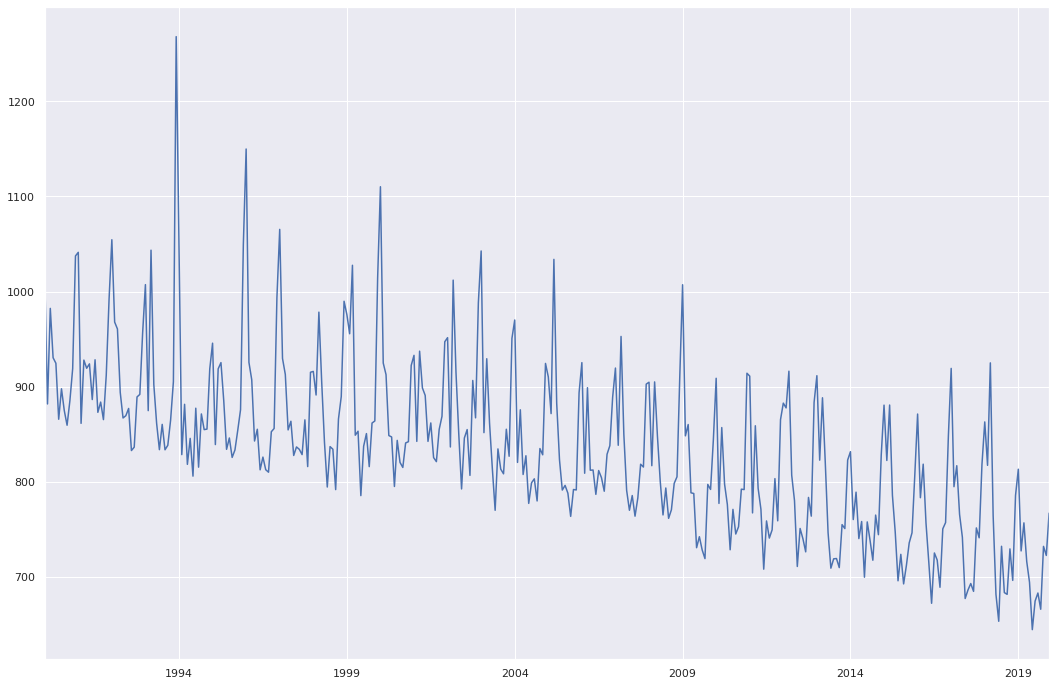

In [63]:
monthly_timeline.loc[:'2019-12-31','dead_per_million'].plot(figsize=(18,12))
plt.plot(scb_2020.loc[:last_complete_month,'dead_per_million'],color='r')

In [64]:
scb_2020

,index,dead_per_million,2015-2019,min_2015_2019,max_2015_2019
2020-01-31,1,800.69,844.98,807.81,894.61
2020-02-29,2,725.80,785.71,720.85,803.71
2020-03-31,3,824.83,814.07,748.12,908.13
2020-04-30,4,1022.29,735.37,710.17,750.86
2020-05-31,5,857.84,694.26,668.33,720.72
2020-06-30,6,713.39,646.07,637.63,655.98
2020-07-31,7,674.96,684.25,664.42,715.76
2020-08-31,8,668.85,670.31,650.65,686.70
2020-09-30,9,649.04,664.91,659.54,670.79
2020-10-31,10,695.06,717.22,692.82,728.88


In [65]:
monthly_timeline = pd.concat([monthly_timeline['dead_per_million'],scb_2020['dead_per_million']],axis=0)
monthly_timeline

1990-01-31    1019.60
1990-02-28     881.73
1990-03-31     982.28
1990-04-30     930.37
1990-05-31     924.54
               ...   
2020-08-31     668.85
2020-09-30     649.04
2020-10-31     695.06
2020-11-30     788.67
2020-12-31     898.04
Freq: M, Name: dead_per_million, Length: 372, dtype: float64

In [66]:
yearly_monthly_sums = monthly_timeline.groupby(
    [monthly_timeline.index.year,monthly_timeline.index.month]).sum()

deaths_per_m_grouped_sums_1990_2020_YTD = yearly_monthly_sums.unstack().reset_index().set_index('index')
cols = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
deaths_per_m_grouped_sums_1990_2020_YTD.columns = cols
deaths_per_m_grouped_sums_1990_2020_YTD.index.name='year'
deaths_per_m_grouped_sums_1990_2020_YTD 

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1990,1019.60,881.73,982.28,930.37,924.54,865.63,897.71,874.73,859.33,884.99,918.94,1037.45
1991,1041.25,861.31,927.86,919.28,923.92,886.35,928.21,872.90,883.69,865.25,911.98,991.51
1992,1054.52,967.89,960.63,893.84,866.96,869.39,877.00,832.70,836.28,889.11,891.76,956.13
1993,1007.27,874.68,1043.52,902.21,861.49,833.62,860.23,833.50,838.21,864.70,905.19,1268.21
1994,1045.83,828.42,881.35,818.18,845.50,805.77,877.25,815.22,871.22,854.72,855.29,918.69
1995,945.67,838.99,918.63,925.22,885.00,833.99,845.92,825.47,833.31,853.99,875.69,1049.51
1996,1149.97,925.47,907.20,842.73,855.10,812.42,825.82,812.54,809.93,852.49,855.89,993.57
1997,1065.41,929.61,912.80,854.44,863.52,827.53,836.50,834.00,828.44,865.00,815.83,915.07
1998,915.97,891.14,978.33,905.20,841.26,794.32,836.83,834.11,791.60,865.86,889.55,989.78


In [67]:
deaths_per_m_grouped_sums_1990_2020_YTD.to_pickle('deaths_per_m_1990-2020-YTD.pkl')

In [68]:
#UPDATE monthly
deaths_per_m_grouped_sums_1990_2020_YTD.loc[:,'Jan' : 'Nov'].sum(axis=1)

year
1990    10039.85
1991    10021.99
1992     9940.08
1993     9824.62
1994     9498.74
1995     9581.90
1996     9649.55
1997     9633.07
1998     9544.17
1999     9675.32
2000     9599.28
2001     9575.94
2002     9638.38
2003     9406.31
2004     9122.03
2005     9242.72
2006     9116.05
2007     9086.49
2008     8968.51
2009     8799.62
2010     8696.31
2011     8619.06
2012     8737.75
2013     8550.38
2014     8300.30
2015     8421.06
2016     8254.67
2017     8270.09
2018     8225.60
2019     7828.22
2020     8421.42
dtype: float64

In [69]:
print (sns.axes_style())

#sns.set_style("darkgrid", {"axes.facecolor": ".9"})

sns.set_style({'grid.color' : 'lightgrey'})

{'axes.facecolor': '#EAEAF2', 'axes.edgecolor': 'white', 'axes.grid': True, 'axes.axisbelow': True, 'axes.labelcolor': '.15', 'figure.facecolor': 'white', 'grid.color': 'white', 'grid.linestyle': '-', 'text.color': '.15', 'xtick.color': '.15', 'ytick.color': '.15', 'xtick.direction': 'out', 'ytick.direction': 'out', 'lines.solid_capstyle': 'round', 'patch.edgecolor': 'w', 'patch.force_edgecolor': True, 'image.cmap': 'rocket', 'font.family': ['sans-serif'], 'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'], 'xtick.bottom': False, 'xtick.top': False, 'ytick.left': False, 'ytick.right': False, 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': True, 'axes.spines.top': True}


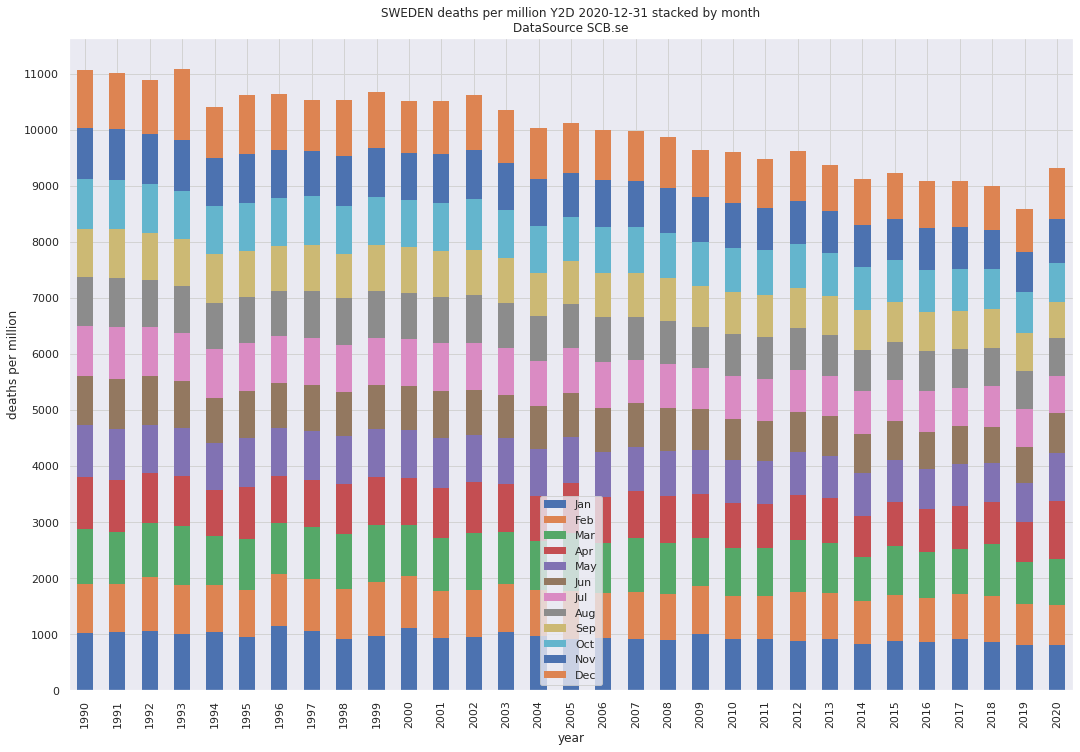

In [70]:
title = 'SWEDEN deaths per million Y2D {} stacked by month\nDataSource SCB.se'.format(last_date)

deaths_per_m_grouped_sums_1990_2020_YTD.plot(kind='bar',title=title,
                                             stacked=True,figsize=(18,12),edgecolor='none')
plt.ylabel('deaths per million')
plt.legend(loc='lower center')
plt.yticks(range(0,12000,1000))
plt.savefig('scb_1990_2020_deaths_per_M_stacked.jpg',format='jpg')



Text(0, 0.5, 'rank')

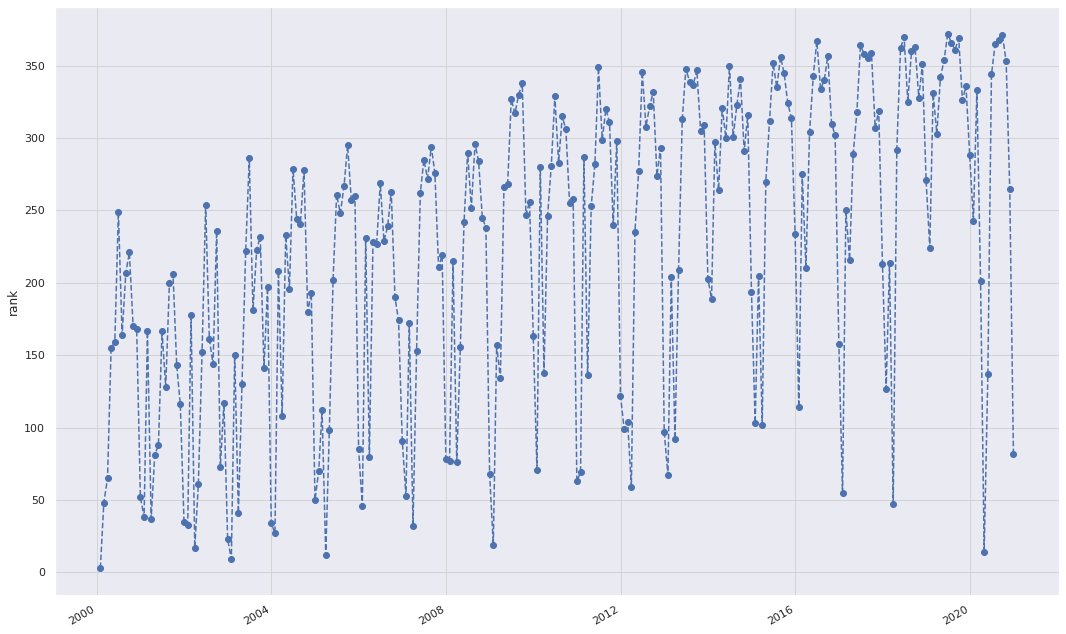

In [71]:
two_thousands_rank = monthly_timeline.rank(ascending=False).sort_values()
two_thousands_rank = two_thousands_rank.loc['2000-01-01':]
two_thousands_rank.plot(figsize=(18,12),style=['o--'])
plt.ylabel('rank')

In [72]:
monthly_timeline = pd.DataFrame(monthly_timeline.sort_values(ascending=False))
monthly_timeline['rank'] = range(1,len(monthly_timeline) + 1)
monthly_timeline.head(50)

,dead_per_million,rank
1993-12-31,1268.21,1
1996-01-31,1149.97,2
2000-01-31,1110.28,3
1997-01-31,1065.41,4
1992-01-31,1054.52,5
1995-12-31,1049.51,6
1994-01-31,1045.83,7
1993-03-31,1043.52,8
2003-01-31,1042.68,9
1991-01-31,1041.25,10


In [73]:
monthly_timeline.loc['2020-08-31']

,dead_per_million,rank
2020-08-31,668.85,368


<AxesSubplot:>

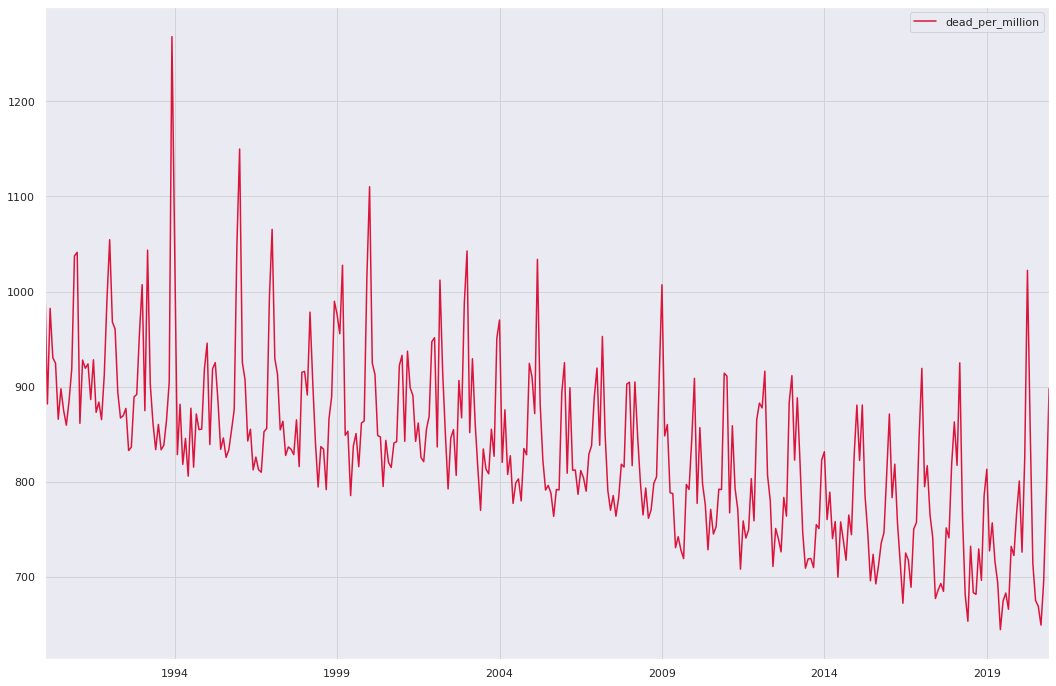

In [74]:
monthly_timeline.sort_index().plot(y='dead_per_million',figsize=(18,12),color=['crimson'])

In [75]:
mean = monthly_timeline.mean()
mean

dead_per_million    835.57
rank                186.50
dtype: float64

In [76]:
monthly_timeline.loc[last_complete_month]

,dead_per_million,rank
2020-12-31,898.04,82


In [77]:
monthly_timeline.sort_index()

,dead_per_million,rank
1990-01-31,1019.60,15
1990-02-28,881.73,100
1990-03-31,982.28,24
1990-04-30,930.37,39
1990-05-31,924.54,49
...,...,...
2020-08-31,668.85,368
2020-09-30,649.04,371
2020-10-31,695.06,353
2020-11-30,788.67,265


In [78]:
max_rank = monthly_timeline['rank'].max()
year_groups = monthly_timeline.groupby(pd.Grouper(freq='Y'))
year_group_2020 = (year_groups.get_group('2020-12-31 00:00:00')).copy()
year_group_2020['rel_rank'] = 1 - year_group_2020['rank'] / max_rank
year_group_2020['inv_rank'] = max_rank - year_group_2020['rank']

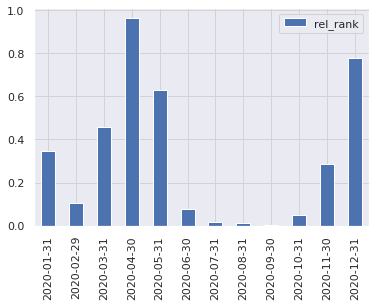

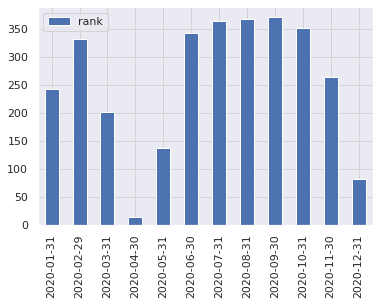

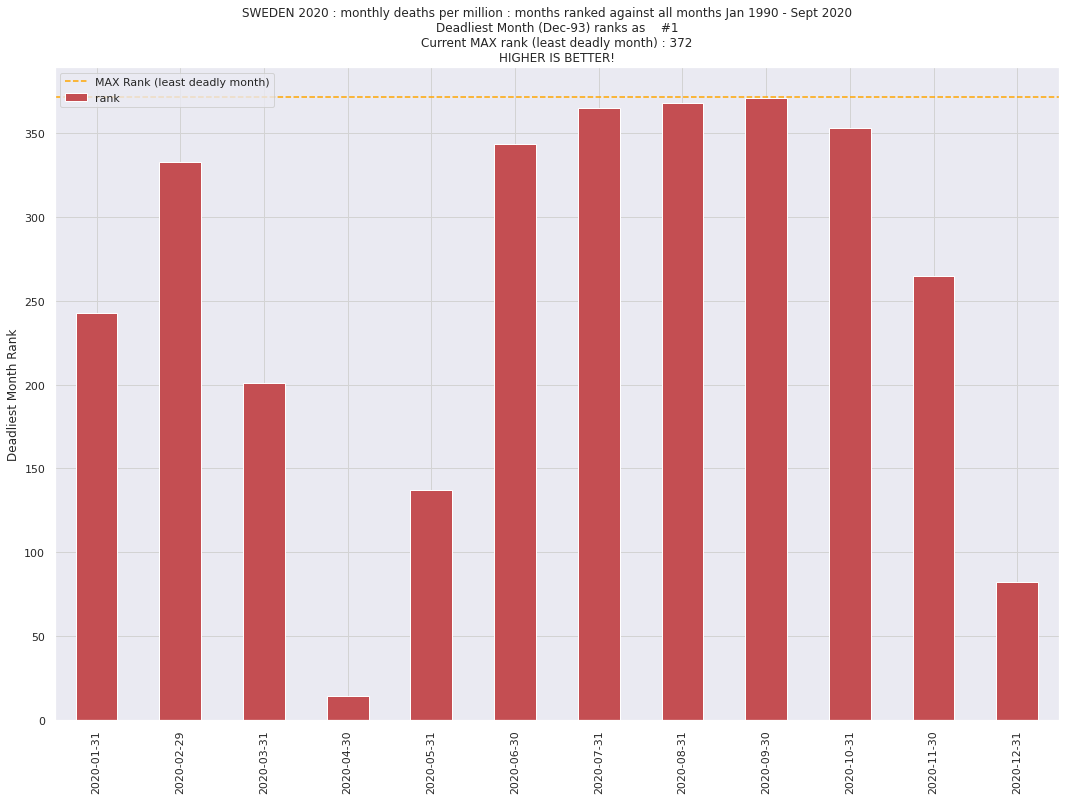

In [79]:
ax = year_group_2020.set_index(year_group_2020.index.date).plot(kind='bar',y='rel_rank')

year_group_2020.set_index(year_group_2020.index.date).plot(kind='bar',y='rank')

year_group_2020.set_index(
    year_group_2020.index.date).plot(
    kind='bar',color='r',
    y='rank',
    figsize=(18,12),
    title='SWEDEN 2020 : monthly deaths per million : months ranked against all months Jan 1990 - Sept 2020 \
    \nDeadliest Month (Dec-93) ranks as\
    #1\nCurrent MAX rank (least deadly month) : {}\nHIGHER IS BETTER!'.format(len(monthly_timeline)))

plt.ylabel('Deadliest Month Rank')
plt.axhline(len(monthly_timeline),color='orange',ls='dashed',label='MAX Rank (least deadly month)')
plt.legend(loc='upper left')

plt.savefig('monthly_ranking_2020.jpg',format='jpg')

In [80]:
year_group_2020

,dead_per_million,rank,rel_rank,inv_rank
2020-01-31,800.69,243,3.47e-01,129
2020-02-29,725.80,333,1.05e-01,39
2020-03-31,824.83,201,4.60e-01,171
2020-04-30,1022.29,14,9.62e-01,358
2020-05-31,857.84,137,6.32e-01,235
2020-06-30,713.39,344,7.53e-02,28
2020-07-31,674.96,365,1.88e-02,7
2020-08-31,668.85,368,1.08e-02,4
2020-09-30,649.04,371,2.69e-03,1
2020-10-31,695.06,353,5.11e-02,19


In [81]:
year_groups2 = monthly_timeline.groupby(pd.Grouper(freq='M')).mean()
year_groups2

,dead_per_million,rank
1990-01-31,1019.60,15
1990-02-28,881.73,100
1990-03-31,982.28,24
1990-04-30,930.37,39
1990-05-31,924.54,49
...,...,...
2020-08-31,668.85,368
2020-09-30,649.04,371
2020-10-31,695.06,353
2020-11-30,788.67,265


In [82]:
top_20 = pd.DataFrame(monthly_timeline[:20])
top_20

,dead_per_million,rank
1993-12-31,1268.21,1
1996-01-31,1149.97,2
2000-01-31,1110.28,3
1997-01-31,1065.41,4
1992-01-31,1054.52,5
1995-12-31,1049.51,6
1994-01-31,1045.83,7
1993-03-31,1043.52,8
2003-01-31,1042.68,9
1991-01-31,1041.25,10


In [83]:
len (top_20)

20

['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'b', 'b']


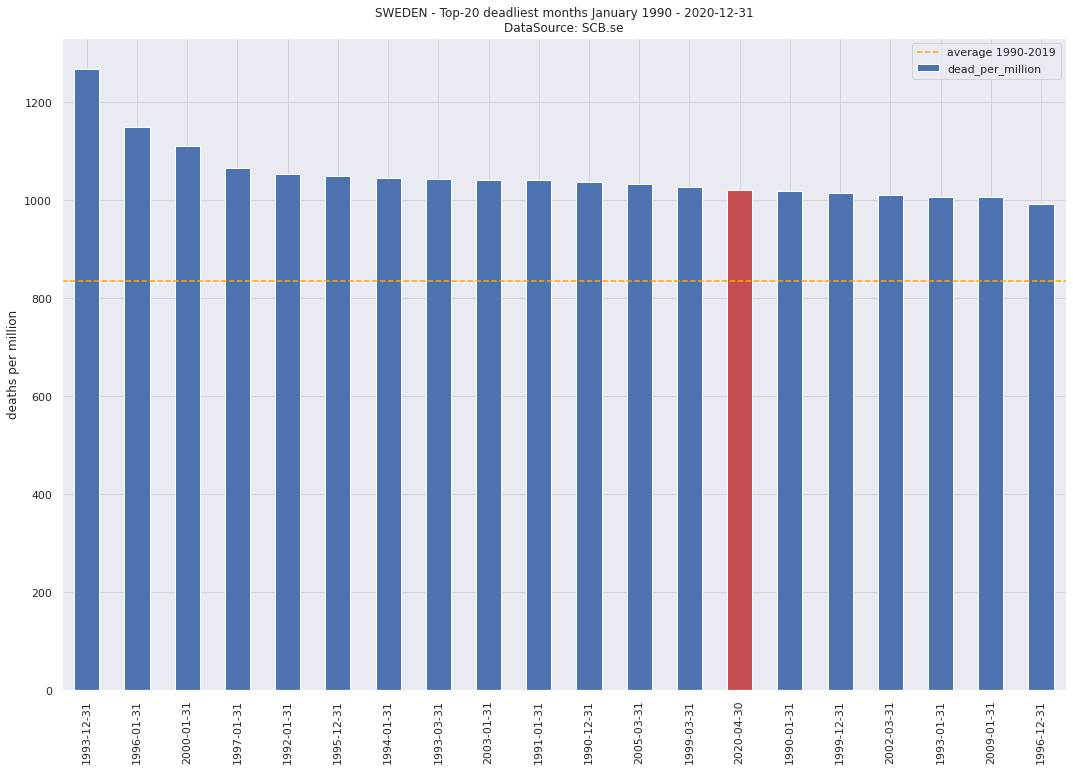

In [84]:
colors = ['b'] * 13 # must set colors after seeing which place they fall onto
colors.extend(['r','b','b','b','b','b','b'])
print (colors)
top_20.index = top_20.index.date
top_20['dead_per_million'].plot(kind='bar',
                                figsize=(18,12),
                                color=colors,
                                title='SWEDEN - Top-20 deadliest months January 1990 - {}\nDataSource: SCB.se'.format(
                                last_complete_month))
plt.ylabel('deaths per million')
plt.axhline(mean['dead_per_million'],color='orange',ls='dashed',label='average 1990-2019')
plt.legend(loc='upper right')
plt.savefig('scb_population_deaths_1990-2020.jpg',format='jpg')

In [85]:
bottom_20 = monthly_timeline.iloc[-21:].sort_values('dead_per_million',ascending=False)
bottom_20 = bottom_20.loc[:last_complete_month]
bottom_20.index = bottom_20.index.date
bottom_20

,dead_per_million,rank
2015-06-30,695.65,352
2020-10-31,695.06,353
2019-05-31,694.08,354
2017-08-31,692.77,355
2015-08-31,692.40,356
2016-09-30,688.84,357
2017-07-31,685.94,358
2017-09-30,684.55,359
2018-08-31,683.25,360
2019-08-31,682.81,361


In [86]:
monthly_timeline.loc['2020-02-29']

,dead_per_million,rank
2020-02-29,725.8,333


In [87]:
print ('total number of months',len(monthly_timeline))
months_rank_2020 = monthly_timeline[monthly_timeline.index.get_level_values(0).year == 2020]
months_rank_2020

total number of months 372


,dead_per_million,rank
2020-04-30,1022.29,14
2020-12-31,898.04,82
2020-05-31,857.84,137
2020-03-31,824.83,201
2020-01-31,800.69,243
2020-11-30,788.67,265
2020-02-29,725.80,333
2020-06-30,713.39,344
2020-10-31,695.06,353
2020-07-31,674.96,365


['r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'r', 'b', 'b', 'r', 'b']


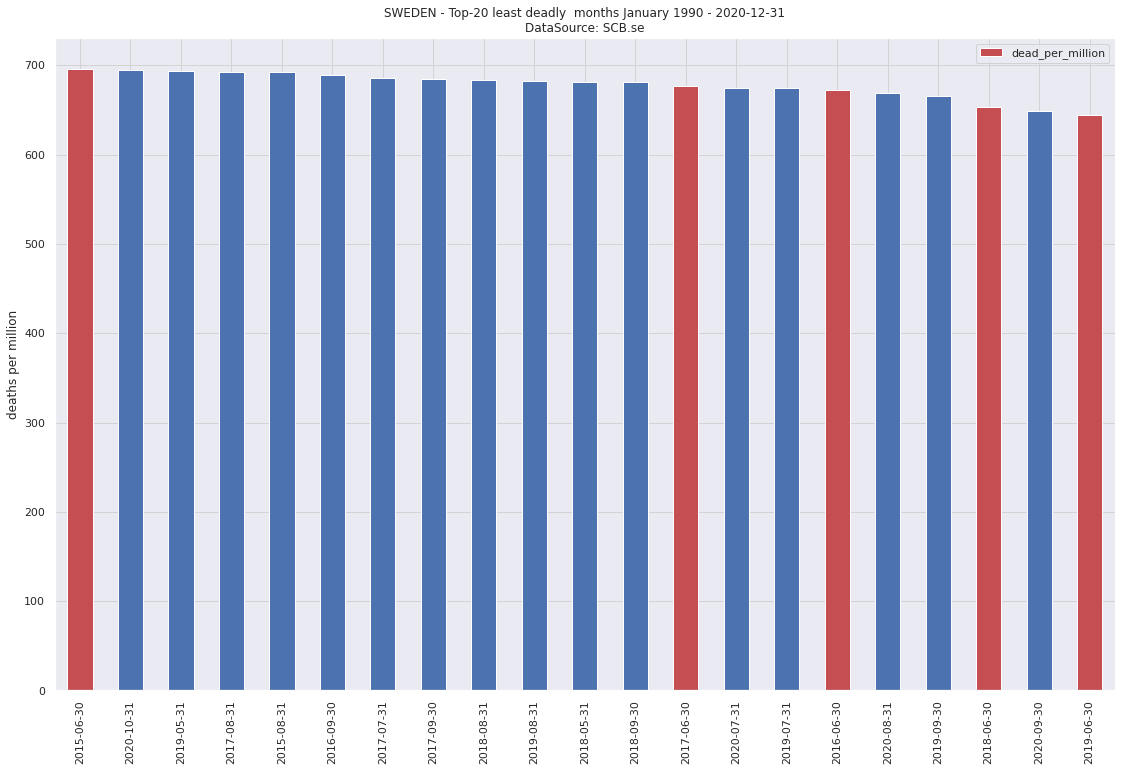

In [88]:

colors = ['r'] * 1 # must set colors after seeing which place they fall onto
colors.extend(['b','b','b','b','b','b','b','b','b','b','b','r','b','b','r','b','b','r','b'])


print (colors)
title = 'SWEDEN All Cause morta'
bottom_20.plot(kind='bar',y='dead_per_million',figsize=(19,12),color=colors,
              title='SWEDEN - Top-20 least deadly  months January 1990 - {}\nDataSource: SCB.se'.format(
                                last_complete_month))

plt.ylabel('deaths per million')
plt.savefig('sweden_bottom_20_deadliest_months.jpg',format='jpg')


In [89]:

scb_1990_2019

,dead_per_million
1990-01-31,1019.60
1990-02-28,881.73
1990-03-31,982.28
1990-04-30,930.37
1990-05-31,924.54
...,...
2019-08-31,682.81
2019-09-30,665.72
2019-10-31,731.86
2019-11-30,722.34


In [90]:
scb_1990_2020 = pd.DataFrame(pd.concat([scb_1990_2019['dead_per_million'],scb_2020['dead_per_million']],axis=0))
scb_1990_2020

,dead_per_million
1990-01-31,1019.60
1990-02-28,881.73
1990-03-31,982.28
1990-04-30,930.37
1990-05-31,924.54
...,...
2020-08-31,668.85
2020-09-30,649.04
2020-10-31,695.06
2020-11-30,788.67


In [91]:
scb_1990_2020['year'] = scb_1990_2020.index.year
scb_1990_2020['month'] = scb_1990_2020.index.month

In [92]:
scb_1990_2020.tail(20)

,dead_per_million,year,month
2019-05-31,694.08,2019,5
2019-06-30,644.26,2019,6
2019-07-31,674.36,2019,7
2019-08-31,682.81,2019,8
2019-09-30,665.72,2019,9
2019-10-31,731.86,2019,10
2019-11-30,722.34,2019,11
2019-12-31,766.82,2019,12
2020-01-31,800.69,2020,1
2020-02-29,725.80,2020,2


In [93]:
month_grp = scb_1990_2020[:'2019-12-31'].groupby('month')['dead_per_million'].agg(['min','mean','max'])
print (month_grp.head(12))
scb_2020


          min    mean      max
month                         
1      813.04  956.24  1149.97
2      727.10  845.41   967.89
3      756.62  912.12  1043.52
4      716.03  836.59   930.37
5      681.49  812.46   924.54
6      644.26  767.70   886.35
7      674.36  801.09   928.21
8      682.81  783.30   874.73
9      665.72  777.03   883.69
10     729.22  819.34   906.43
11     696.09  817.64   918.94
12     766.82  921.52  1268.21


,index,dead_per_million,2015-2019,min_2015_2019,max_2015_2019
2020-01-31,1,800.69,844.98,807.81,894.61
2020-02-29,2,725.80,785.71,720.85,803.71
2020-03-31,3,824.83,814.07,748.12,908.13
2020-04-30,4,1022.29,735.37,710.17,750.86
2020-05-31,5,857.84,694.26,668.33,720.72
2020-06-30,6,713.39,646.07,637.63,655.98
2020-07-31,7,674.96,684.25,664.42,715.76
2020-08-31,8,668.85,670.31,650.65,686.70
2020-09-30,9,649.04,664.91,659.54,670.79
2020-10-31,10,695.06,717.22,692.82,728.88


In [94]:
scb_2020['excess'] = scb_2020['dead_per_million'] - scb_2020['2015-2019']
scb_2020

,index,dead_per_million,2015-2019,min_2015_2019,max_2015_2019,excess
2020-01-31,1,800.69,844.98,807.81,894.61,-44.29
2020-02-29,2,725.80,785.71,720.85,803.71,-59.91
2020-03-31,3,824.83,814.07,748.12,908.13,10.76
2020-04-30,4,1022.29,735.37,710.17,750.86,286.92
2020-05-31,5,857.84,694.26,668.33,720.72,163.58
2020-06-30,6,713.39,646.07,637.63,655.98,67.31
2020-07-31,7,674.96,684.25,664.42,715.76,-9.29
2020-08-31,8,668.85,670.31,650.65,686.70,-1.46
2020-09-30,9,649.04,664.91,659.54,670.79,-15.87
2020-10-31,10,695.06,717.22,692.82,728.88,-22.16


In [95]:
excess = scb_2020.set_index(scb_2020.index.month).join(month_grp['mean'])
excess.drop(['min_2015_2019','max_2015_2019'],axis=1,inplace=True)


,index,dead_per_million,2015-2019,excess,1990-2019_mean,excess_1990_baseline,excess_2015_baseline,cumulative_excess_vs_1990-2019,cumulative_excess_vs_2015-2019,date
1,1,800.69,844.98,-44.29,956.24,-155.55,-44.29,-155.55,-44.29,2020-01-31
2,2,725.80,785.71,-59.91,845.41,-119.61,-59.91,-275.16,-104.20,2020-02-29
3,3,824.83,814.07,10.76,912.12,-87.29,10.76,-362.46,-93.44,2020-03-31
4,4,1022.29,735.37,286.92,836.59,185.70,286.92,-176.76,193.48,2020-04-30
5,5,857.84,694.26,163.58,812.46,45.38,163.58,-131.38,357.07,2020-05-31
6,6,713.39,646.07,67.31,767.70,-54.32,67.31,-185.70,424.38,2020-06-30
7,7,674.96,684.25,-9.29,801.09,-126.13,-9.29,-311.82,415.10,2020-07-31
8,8,668.85,670.31,-1.46,783.30,-114.45,-1.46,-426.27,413.63,2020-08-31
9,9,649.04,664.91,-15.87,777.03,-127.98,-15.87,-554.26,397.76,2020-09-30
10,10,695.06,717.22,-22.16,819.34,-124.28,-22.16,-678.54,375.61,2020-10-31


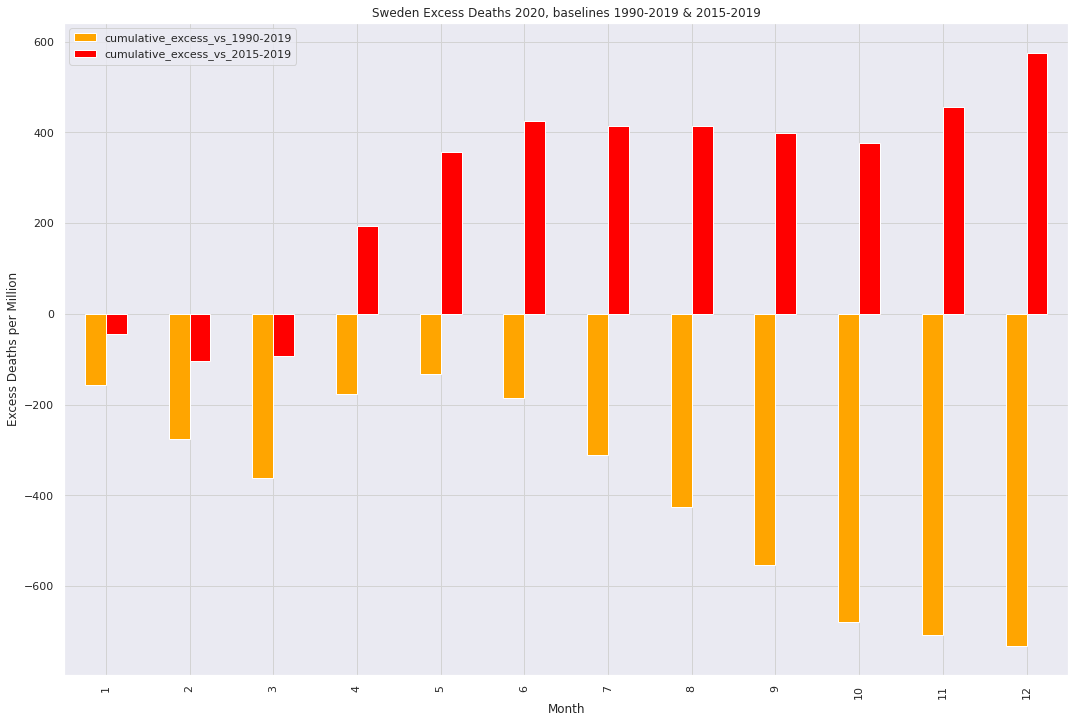

In [96]:
excess.rename(columns={'mean' : '1990-2019_mean'}, inplace=True)
excess['excess_1990_baseline'] = excess['dead_per_million'] - excess['1990-2019_mean']
excess['excess_2015_baseline'] = excess['dead_per_million'] - excess['2015-2019']
excess['cumulative_excess_vs_1990-2019'] = excess['excess_1990_baseline'].cumsum()
excess['cumulative_excess_vs_2015-2019'] = excess['excess_2015_baseline'].cumsum()

# fix monthly
#excess['date'] = pd.date_range('2020-01-01',last_complete_month,freq='M')
excess['date'] = pd.date_range('2020-01-01',pd.Timestamp((pd.to_datetime(last_complete_month))),freq='M')

excess[:pd.Timestamp(last_complete_month).date().month].plot(kind='bar',figsize=(18,12),
                                                             title=('Sweden Excess Deaths 2020, baselines 1990-2019 & 2015-2019'),
                                                             y=['cumulative_excess_vs_1990-2019',
                                                               'cumulative_excess_vs_2015-2019'],color=['orange','red'])
plt.ylabel('Excess Deaths per Million')
plt.xlabel('Month')
excess

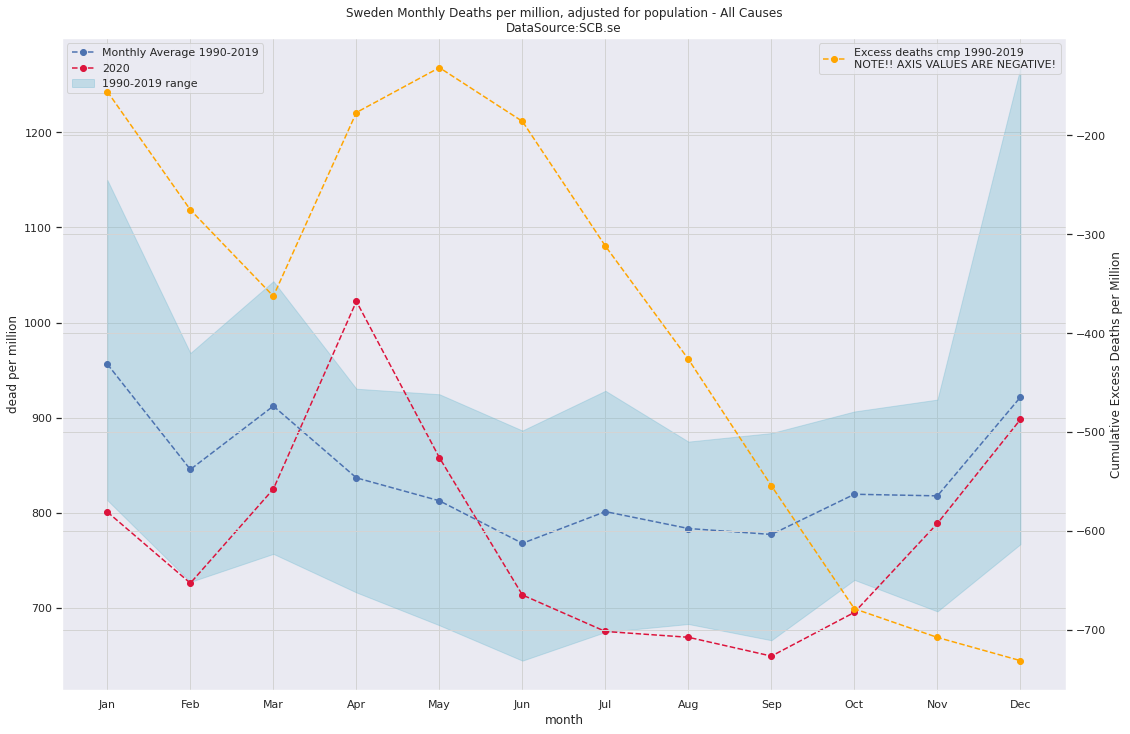

In [97]:
scb_2020['month'] = scb_2020.index.month 

plt.figure(figsize=(18,12))
plt.title('Sweden Monthly Deaths per million, adjusted for population - All Causes\nDataSource:SCB.se')
ax = plt.gca()
ax2 = plt.twinx()

ax.plot(month_grp['mean'],'o--',label='Monthly Average 1990-2019')
#ax.plot(scb_2020['month'],scb_2020['2015-2019'],'o--',color='k',label='Monthly Average 2015-2019')
#plt.fill_between(scb_2020['month'],scb_2020['min_2015_2019'],scb_2020['max_2015_2019'],color='m',alpha=0.3,label='2015-2019 range')

ax.fill_between(month_grp.index,month_grp['min'],month_grp['max'],color='c',alpha=0.3,label='1990-2019 range')

ax.plot(scb_2020['month'][:last_complete_month],scb_2020['dead_per_million'][:last_complete_month],'o--',color='crimson',label='2020')
ax.legend(loc='upper left')
ax.set_xlabel('month')
ax.set_ylabel('dead per million')

#ax2.plot(excess['cum_vs_2015'][:pd.Timestamp(last_complete_month).month],'o--',
         #color='orange',label='Excess deaths cmp 2015-2019')

ax2.plot(excess['cumulative_excess_vs_1990-2019'][:pd.Timestamp(last_complete_month).month],'o--',
         color='orange',label='Excess deaths cmp 1990-2019\nNOTE!! AXIS VALUES ARE NEGATIVE!')

ax2.set_ylabel('Cumulative Excess Deaths per Million')
#ax2.set_ylim([-400,10])
ax2.legend(loc='upper right')

xticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
_=plt.xticks(month_grp.index,xticks)
#plt.savefig('scb_monthly_deaths_all_cmp_1990_2019.jpg',format='jpg')

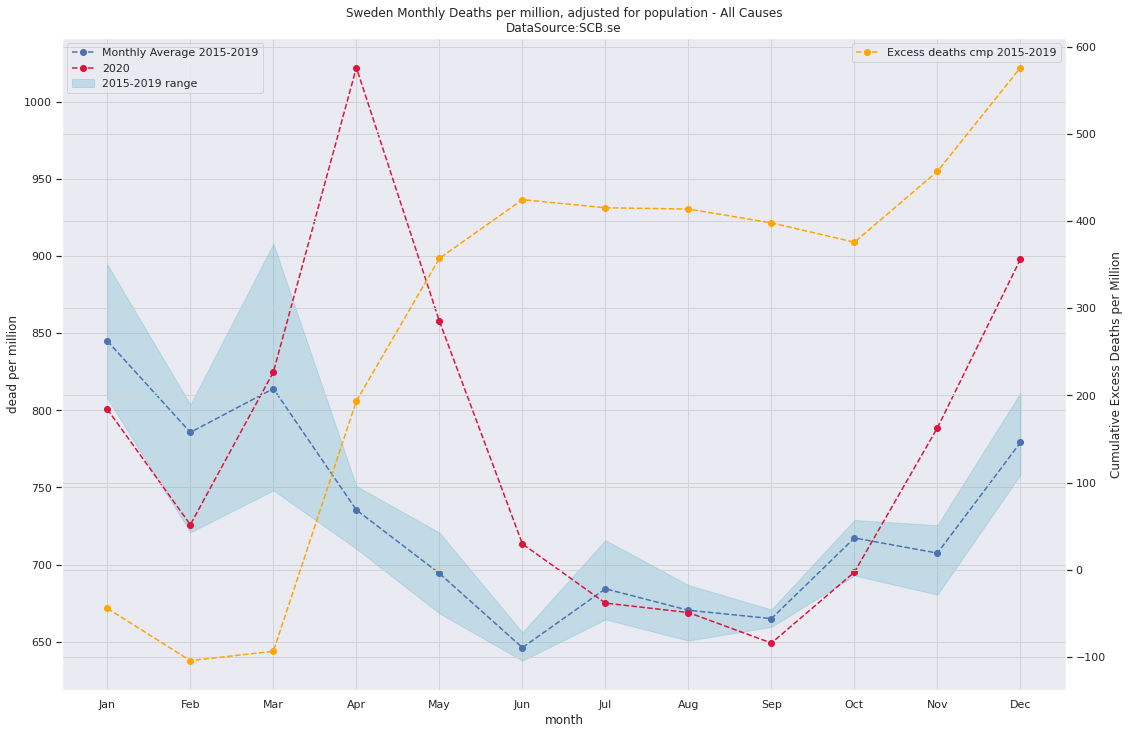

In [98]:
plt.figure(figsize=(18,12))
plt.title('Sweden Monthly Deaths per million, adjusted for population - All Causes\nDataSource:SCB.se')
ax = plt.gca()
ax2 = plt.twinx()

#ax.plot(month_grp['mean'],'o--',label='Monthly Average 1990-2019')
ax.plot(scb_2020['month'],scb_2020['2015-2019'],'o--',color='b',label='Monthly Average 2015-2019')
ax.fill_between(scb_2020['month'],scb_2020['min_2015_2019'],scb_2020['max_2015_2019'],
                color='c',alpha=0.3,label='2015-2019 range')

#ax.fill_between(month_grp.index,month_grp['min'],month_grp['max'],color='c',alpha=0.3,label='1990-2019 range')

ax.plot(scb_2020['month'][:last_complete_month],scb_2020['dead_per_million'][:last_complete_month],
        'o--',color='crimson',label='2020')
ax.legend(loc='upper left')
ax.set_xlabel('month')
ax.set_ylabel('dead per million')

#ax2.plot(excess['cum_vs_2015'][:pd.Timestamp(last_complete_month).month],'o--',
         #color='orange',label='Excess deaths cmp 2015-2019')

ax2.plot(excess['cumulative_excess_vs_2015-2019'][:],'o--',
         color='orange',label='Excess deaths cmp 2015-2019')

ax2.set_ylabel('Cumulative Excess Deaths per Million')
ax2.legend(loc='upper right')

xticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
_=plt.xticks(month_grp.index,xticks)
#plt.savefig('scb_monthly_deaths_all_cmp_2015-2019.jpg',format='jpg')

In [99]:
scb_2020_monthly = scb_2020.set_index('month')
print (scb_2020_monthly)

mean_1990_2019 = month_grp.loc[:pd.Timestamp(last_complete_month).month]
print (mean_1990_2019)
monthly_excess = scb_2020_monthly['dead_per_million'] - mean_1990_2019['mean']
print (monthly_excess)
print (monthly_excess.cumsum())

       index  dead_per_million  2015-2019  min_2015_2019  max_2015_2019  \
month                                                                     
1          1            800.69     844.98         807.81         894.61   
2          2            725.80     785.71         720.85         803.71   
3          3            824.83     814.07         748.12         908.13   
4          4           1022.29     735.37         710.17         750.86   
5          5            857.84     694.26         668.33         720.72   
6          6            713.39     646.07         637.63         655.98   
7          7            674.96     684.25         664.42         715.76   
8          8            668.85     670.31         650.65         686.70   
9          9            649.04     664.91         659.54         670.79   
10        10            695.06     717.22         692.82         728.88   
11        11            788.67     707.40         680.46         725.52   
12        12            8

In [100]:
pd.Timestamp(last_complete_month).month

12

In [101]:
mask = scb_1990_2020.index.month.isin(range(1,pd.Timestamp(last_complete_month).month + 1))
first_months = scb_1990_2020[mask]['dead_per_million']
first_cum = first_months.groupby(first_months.index.year).sum()
first_cum

1990    11077.30
1991    11013.50
1992    10896.21
1993    11092.83
1994    10417.43
1995    10631.41
1996    10643.11
1997    10548.14
1998    10533.95
1999    10689.70
2000    10521.58
2001    10523.14
2002    10626.47
2003    10357.00
2004    10046.39
2005    10136.22
2006    10004.88
2007     9989.08
2008     9879.60
2009     9643.84
2010     9610.36
2011     9484.27
2012     9621.08
2013     9373.07
2014     9128.22
2015     9228.18
2016     9102.61
2017     9087.92
2018     9011.08
2019     8595.04
2020     9319.46
Name: dead_per_million, dtype: float64

Text(0, 0.5, 'deaths per million')

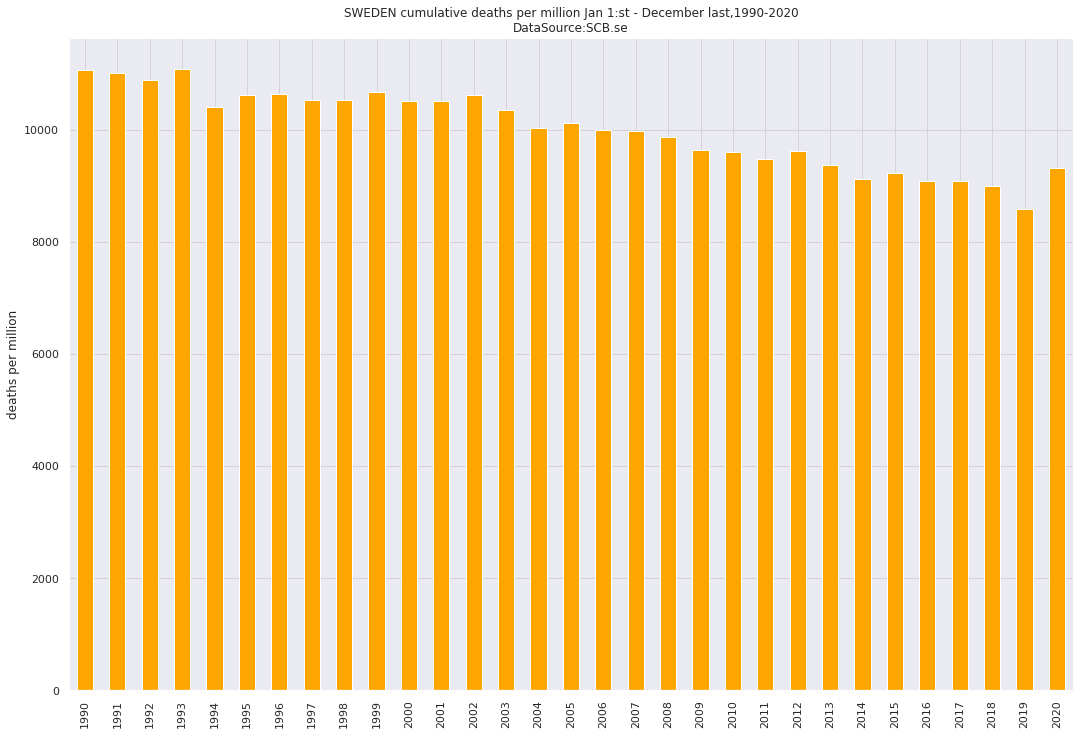

In [102]:
first_cum.plot(kind='bar',figsize=(18,12),color='orange',
               title='SWEDEN cumulative deaths per million Jan 1:st - {} last,1990-2020\nDataSource:SCB.se'.format(
                   pd.Timestamp(last_complete_month).month_name()))
plt.ylabel('deaths per million')
#plt.savefig('scb_deaths_jan_may_unsorted.jpg'.format('jpg'))

['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'crimson', 'orange', 'orange', 'orange']


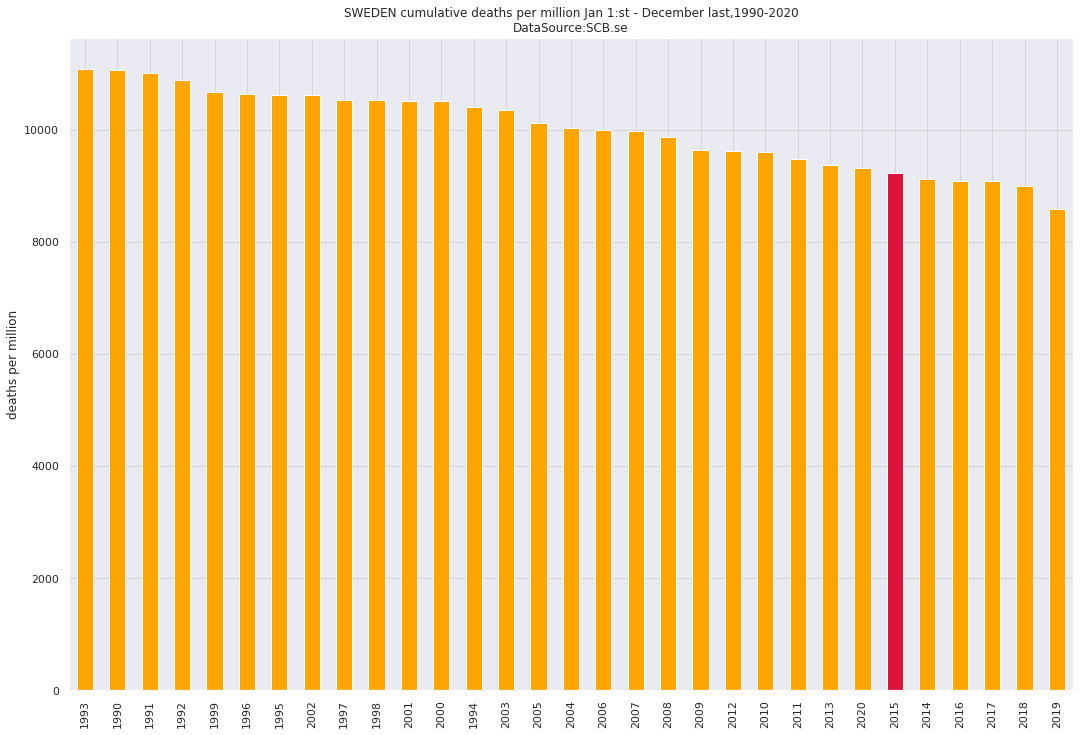

In [103]:
colors = ['orange'] * 25
colors.append('crimson')
color_tail = ['orange'] * 3
colors.extend(color_tail)

print (colors)
first_cum.sort_values(ascending=False).plot(kind='bar',figsize=(18,12),
                                            title='SWEDEN cumulative deaths per million Jan 1:st - {} last,1990-2020\nDataSource:SCB.se'.format(
                   pd.Timestamp(last_complete_month).month_name()),
                                            color=colors)
plt.ylabel('deaths per million')
plt.savefig('scb_deaths_jan_july_sorted.jpg',format='jpg')

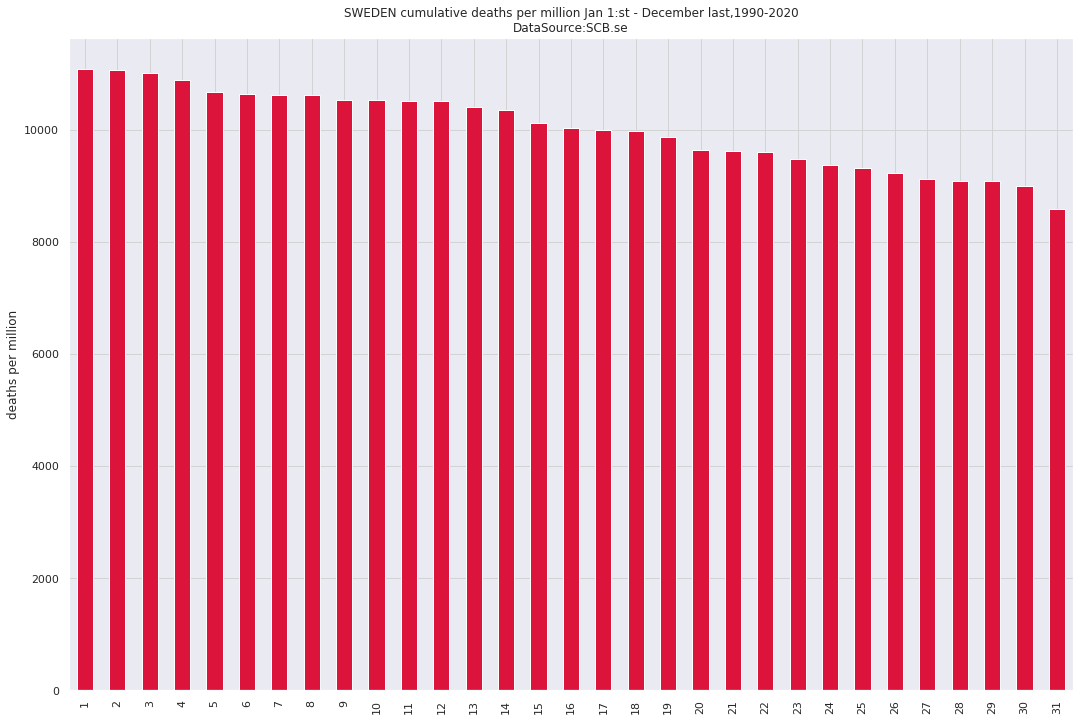

In [104]:
first_cum.sort_values(ascending=False).plot(kind='bar',figsize=(18,12),
                                            title='SWEDEN cumulative deaths per million Jan 1:st - {} last,1990-2020\nDataSource:SCB.se'.format(
                   pd.Timestamp(last_complete_month).month_name()),
                                            color='crimson')
plt.ylabel('deaths per million')
_= plt.xticks(range(len(first_cum)),range(1,len(first_cum) + 1))
#plt.savefig('scb_deaths_jan_july_sorted_random.jpg',format='jpg')

In [105]:
by_month = first_months.groupby(first_months.index.month)
month_stats =[]

for month in range (1,pd.Timestamp(last_complete_month).month + 1):
    m = by_month.get_group(month)
    month_stats.append(m.agg(['min','mean','max']).values)
    
month_stats = pd.DataFrame(data=np.array(month_stats),
                           index=range(1,pd.Timestamp(last_complete_month).month + 1),
                           columns=['mini','mean','maxi'])

month_stats.index.name='month'
month_stats

,mini,mean,maxi
month,,,
1,800.69,951.23,1149.97
2,725.80,841.55,967.89
3,756.62,909.31,1043.52
4,716.03,842.58,1022.29
5,681.49,813.92,924.54
6,644.26,765.95,886.35
7,674.36,797.02,928.21
8,668.85,779.61,874.73
9,649.04,772.90,883.69


Text(0, 0.5, 'cumulative deaths per million')

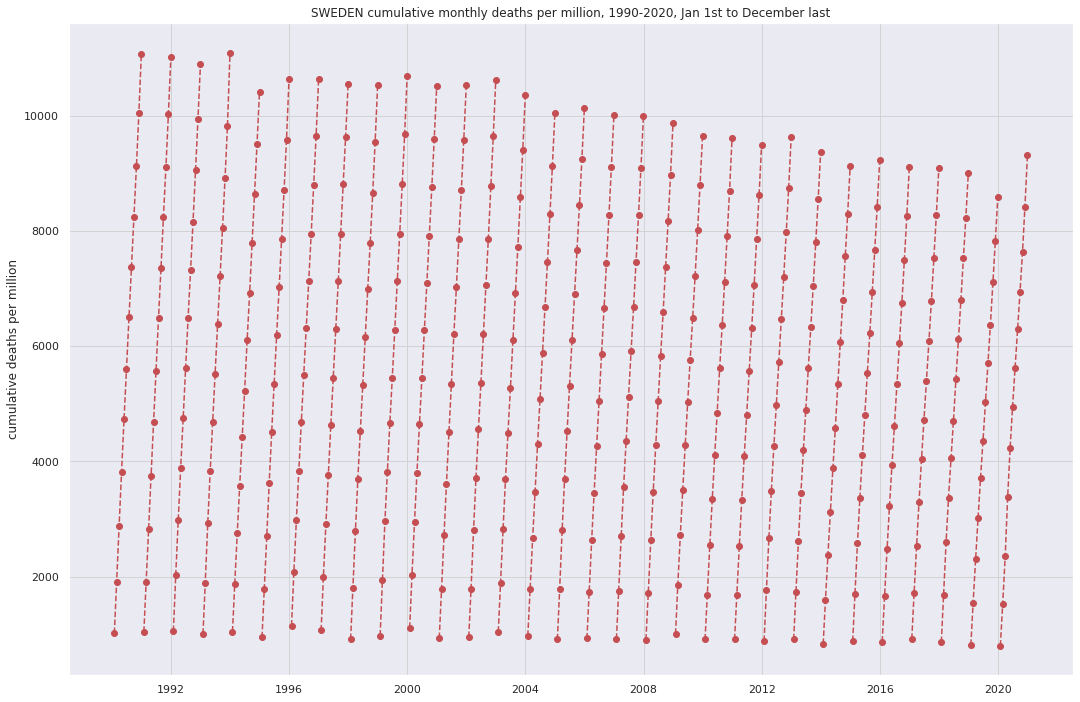

In [106]:
from matplotlib import cm

first_cumsum = first_months.groupby(first_months.index.year).cumsum()
bar = first_cumsum.groupby(first_cumsum.index.year)

plt.figure(figsize=(18,12))
plt.title('SWEDEN cumulative monthly deaths per million, 1990-2020, Jan 1st to {} last'.format(
    pd.Timestamp(last_complete_month).month_name()))

for k in bar.groups.keys():
    plt.plot(bar.get_group(k),'ro--')
    
plt.ylabel('cumulative deaths per million')

In [107]:
first_months

1990-01-31    1019.60
1990-02-28     881.73
1990-03-31     982.28
1990-04-30     930.37
1990-05-31     924.54
               ...   
2020-08-31     668.85
2020-09-30     649.04
2020-10-31     695.06
2020-11-30     788.67
2020-12-31     898.04
Freq: M, Name: dead_per_million, Length: 372, dtype: float64

In [108]:
first_sum = first_months.groupby(first_months.index.year)

month_names = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
              7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

years = dict()

for k in first_sum.groups.keys():
    years[k] = first_sum.get_group(k).values
    
years = pd.DataFrame(years).T
num_months = range(1,pd.Timestamp(last_complete_month).month + 1)
years.columns= num_months

years.rename(columns=month_names,inplace=True)

years.columns.name = 'month'
years.index.name = 'year'
years_per_M = years

years_per_M

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1990,1019.60,881.73,982.28,930.37,924.54,865.63,897.71,874.73,859.33,884.99,918.94,1037.45
1991,1041.25,861.31,927.86,919.28,923.92,886.35,928.21,872.90,883.69,865.25,911.98,991.51
1992,1054.52,967.89,960.63,893.84,866.96,869.39,877.00,832.70,836.28,889.11,891.76,956.13
1993,1007.27,874.68,1043.52,902.21,861.49,833.62,860.23,833.50,838.21,864.70,905.19,1268.21
1994,1045.83,828.42,881.35,818.18,845.50,805.77,877.25,815.22,871.22,854.72,855.29,918.69
1995,945.67,838.99,918.63,925.22,885.00,833.99,845.92,825.47,833.31,853.99,875.69,1049.51
1996,1149.97,925.47,907.20,842.73,855.10,812.42,825.82,812.54,809.93,852.49,855.89,993.57
1997,1065.41,929.61,912.80,854.44,863.52,827.53,836.50,834.00,828.44,865.00,815.83,915.07
1998,915.97,891.14,978.33,905.20,841.26,794.32,836.83,834.11,791.60,865.86,889.55,989.78


In [109]:
years_1990_2019_mean = years.loc[1990:2019].mean().sum()
years_2015_2019_mean = years.loc[2015:2019].mean().sum()
print (years_1990_2019_mean)
print (years_2015_2019_mean)

# fix monthly
#years.drop('Oct',axis=1,inplace=True)

years

10050.45363212961
9004.967165740143


month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1990,1019.60,881.73,982.28,930.37,924.54,865.63,897.71,874.73,859.33,884.99,918.94,1037.45
1991,1041.25,861.31,927.86,919.28,923.92,886.35,928.21,872.90,883.69,865.25,911.98,991.51
1992,1054.52,967.89,960.63,893.84,866.96,869.39,877.00,832.70,836.28,889.11,891.76,956.13
1993,1007.27,874.68,1043.52,902.21,861.49,833.62,860.23,833.50,838.21,864.70,905.19,1268.21
1994,1045.83,828.42,881.35,818.18,845.50,805.77,877.25,815.22,871.22,854.72,855.29,918.69
1995,945.67,838.99,918.63,925.22,885.00,833.99,845.92,825.47,833.31,853.99,875.69,1049.51
1996,1149.97,925.47,907.20,842.73,855.10,812.42,825.82,812.54,809.93,852.49,855.89,993.57
1997,1065.41,929.61,912.80,854.44,863.52,827.53,836.50,834.00,828.44,865.00,815.83,915.07
1998,915.97,891.14,978.33,905.20,841.26,794.32,836.83,834.11,791.60,865.86,889.55,989.78


In [110]:
years.to_csv('death_per_M_1990_2020_Jan_Jul.csv')
years.sum(axis=1)

year
1990    11077.30
1991    11013.50
1992    10896.21
1993    11092.83
1994    10417.43
1995    10631.41
1996    10643.11
1997    10548.14
1998    10533.95
1999    10689.70
2000    10521.58
2001    10523.14
2002    10626.47
2003    10357.00
2004    10046.39
2005    10136.22
2006    10004.88
2007     9989.08
2008     9879.60
2009     9643.84
2010     9610.36
2011     9484.27
2012     9621.08
2013     9373.07
2014     9128.22
2015     9228.18
2016     9102.61
2017     9087.92
2018     9011.08
2019     8595.04
2020     9319.46
dtype: float64

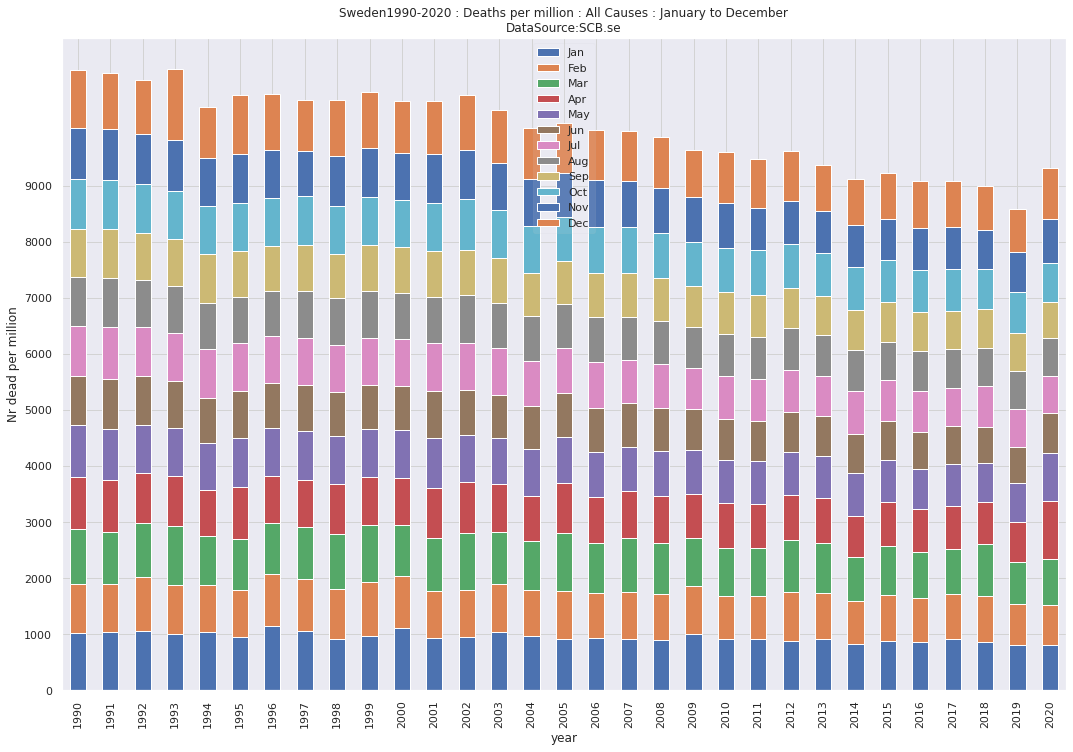

In [111]:


years.plot(kind='bar',stacked=True,figsize=(18,12),
          title='Sweden1990-2020 : Deaths per million : All Causes : January to {}\nDataSource:SCB.se'.format(
              pd.Timestamp(last_complete_month).month_name()))

#plt.axhline(years_1990_2019_mean,ls='dashed',color='crimson',label='1990-2019 average')
#plt.axhline(years_2015_2019_mean,ls='dashed',color='orange',label='2015-2019 average')

plt.ylabel('Nr dead per million')

plt.legend(loc='upper center',framealpha=0.1)
plt.yticks(range(0,10000,1000))
plt.savefig('scb_deaths_per_M_per_month_1990_2020.jpg',format='jpg')

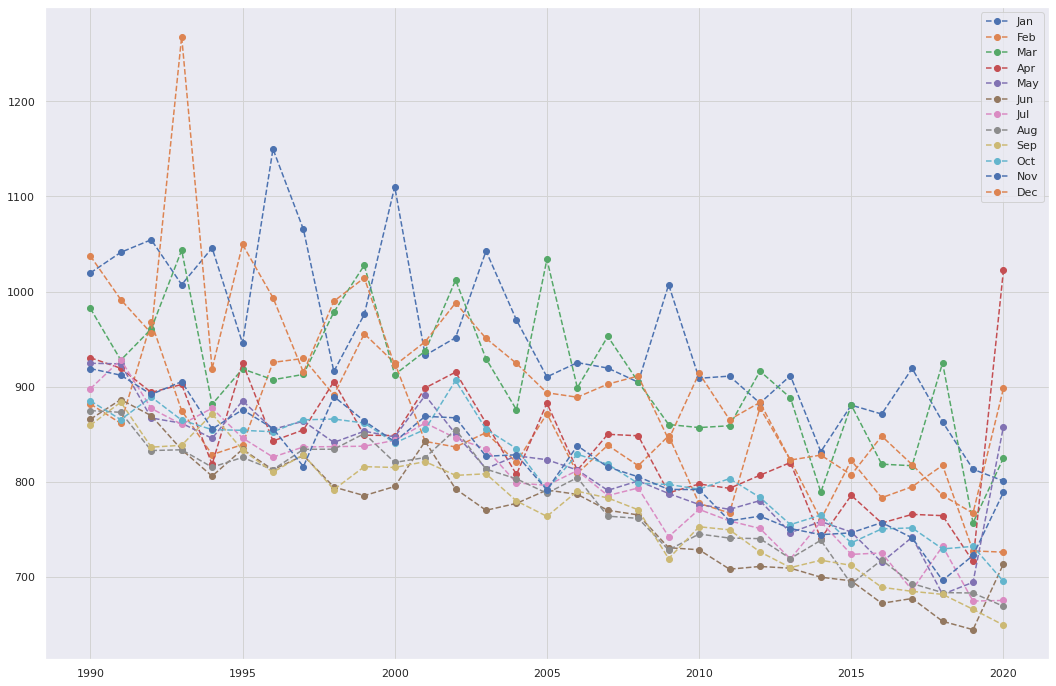

In [112]:
plt.figure(figsize=(18,12))
for month in years.columns:
    
    plt.plot(years.index,years[month],'o--',label=month)
    
plt.legend(loc='upper right')


In [113]:
print (years)
deaths_per_month = years.sum(axis=0)


deaths_per_year = years.sum(axis=1) 

print (deaths_per_month)
print (deaths_per_year)

month      Jan     Feb      Mar      Apr     May     Jun     Jul     Aug  \
year                                                                       
1990   1019.60  881.73   982.28   930.37  924.54  865.63  897.71  874.73   
1991   1041.25  861.31   927.86   919.28  923.92  886.35  928.21  872.90   
1992   1054.52  967.89   960.63   893.84  866.96  869.39  877.00  832.70   
1993   1007.27  874.68  1043.52   902.21  861.49  833.62  860.23  833.50   
1994   1045.83  828.42   881.35   818.18  845.50  805.77  877.25  815.22   
1995    945.67  838.99   918.63   925.22  885.00  833.99  845.92  825.47   
1996   1149.97  925.47   907.20   842.73  855.10  812.42  825.82  812.54   
1997   1065.41  929.61   912.80   854.44  863.52  827.53  836.50  834.00   
1998    915.97  891.14   978.33   905.20  841.26  794.32  836.83  834.11   
1999    975.86  955.58  1027.64   848.85  853.04  785.29  837.29  850.55   
2000   1110.28  924.78   912.58   848.48  847.01  794.90  843.39  820.22   
2001    932.

Text(0, 0.5, 'year')

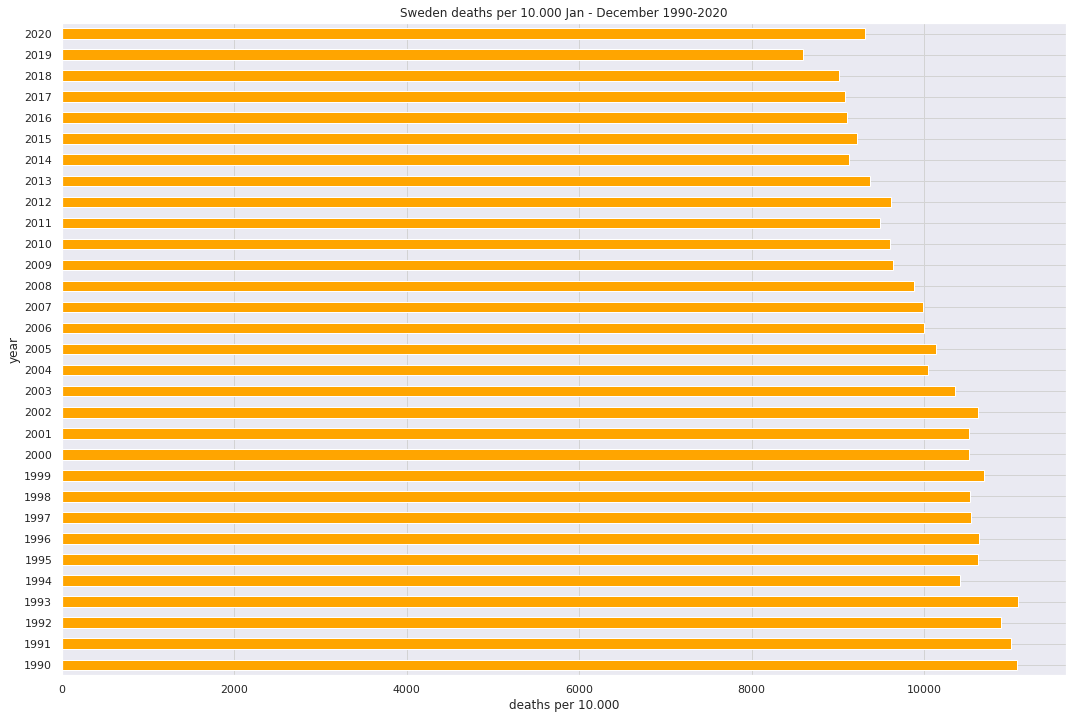

In [114]:
deaths_per_year.plot(kind='barh',title='Sweden deaths per 10.000 Jan - {} 1990-2020'.format(
    pd.Timestamp(last_complete_month).month_name()),color='orange',
                     figsize=(18,12))

plt.xlabel('deaths per 10.000')
plt.ylabel('year')

In [115]:
years = years_per_M
print (years[:-1])

average_2015_2019 = years.loc[2015:2019].mean()
print (average_2015_2019)
monthly_average = years[:-1].mean()
print (monthly_average)
monthly_percentiles = years[:-1].quantile(1,axis=0)
monthly_percentiles


month      Jan     Feb      Mar     Apr     May     Jun     Jul     Aug  \
year                                                                      
1990   1019.60  881.73   982.28  930.37  924.54  865.63  897.71  874.73   
1991   1041.25  861.31   927.86  919.28  923.92  886.35  928.21  872.90   
1992   1054.52  967.89   960.63  893.84  866.96  869.39  877.00  832.70   
1993   1007.27  874.68  1043.52  902.21  861.49  833.62  860.23  833.50   
1994   1045.83  828.42   881.35  818.18  845.50  805.77  877.25  815.22   
1995    945.67  838.99   918.63  925.22  885.00  833.99  845.92  825.47   
1996   1149.97  925.47   907.20  842.73  855.10  812.42  825.82  812.54   
1997   1065.41  929.61   912.80  854.44  863.52  827.53  836.50  834.00   
1998    915.97  891.14   978.33  905.20  841.26  794.32  836.83  834.11   
1999    975.86  955.58  1027.64  848.85  853.04  785.29  837.29  850.55   
2000   1110.28  924.78   912.58  848.48  847.01  794.90  843.39  820.22   
2001    932.88  842.34   

month
Jan    1149.97
Feb     967.89
Mar    1043.52
Apr     930.37
May     924.54
Jun     886.35
Jul     928.21
Aug     874.73
Sep     883.69
Oct     906.43
Nov     918.94
Dec    1268.21
Name: 1, dtype: float64

In [118]:
### USES fhm_scb_dead.csv

fhm_dead = pd.read_csv('fhm_scb_dead.csv',sep=';',header=0,index_col=0,parse_dates=True,names=['fhm_dead'])
fhm_dead


,fhm_dead
2020-03-11,2
2020-03-12,0
2020-03-13,1
2020-03-14,1
2020-03-15,2
...,...
2021-01-03,15
2021-01-04,16
2021-01-05,5
2021-01-06,12


In [119]:
fhm_monthly = fhm_dead.groupby(fhm_dead.index.month).sum()
fhm_monthly['fhm_dead_per_M'] = fhm_monthly['fhm_dead'] / (curr_pop / 1e6)
fhm_monthly.at[1,:] = [0,0]
fhm_monthly.at[2,:] = [0,0]
fhm_monthly.sort_index(inplace=True)
fhm_monthly

,fhm_dead,fhm_dead_per_M
1,0.0,0.00
2,0.0,0.00
3,333.0,31.94
4,2544.0,244.01
5,1751.0,167.95
6,854.0,81.91
7,247.0,23.69
8,70.0,6.71
9,53.0,5.08
10,151.0,14.48


In [120]:
scb_dead_2020_per_M = pd.DataFrame(years.loc[2020].copy())
scb_dead_2020_per_M['month_nr'] = range(1,len(scb_dead_2020_per_M) + 1)
scb_dead_2020_per_M.reset_index(inplace=True)
scb_dead_2020_per_M.set_index('month_nr',inplace=True)
scb_dead_2020_per_M

,month,2020
month_nr,,
1,Jan,800.69
2,Feb,725.80
3,Mar,824.83
4,Apr,1022.29
5,May,857.84
6,Jun,713.39
7,Jul,674.96
8,Aug,668.85
9,Sep,649.04


In [121]:
all_deaths = scb_dead_2020_per_M.join(fhm_monthly)
all_deaths.rename(columns={2020 : 'scb_dead_per_M',
                          'fhm_dead_per_M' : 'covid_deaths_per_M'},inplace=True)
all_deaths['other_deaths_per_M'] = all_deaths['scb_dead_per_M'] - all_deaths['covid_deaths_per_M']
all_deaths['pct_covid_deaths'] = all_deaths['covid_deaths_per_M'] / all_deaths['scb_dead_per_M'] * 100
all_deaths['pct_other_deaths'] = all_deaths['other_deaths_per_M'] / all_deaths['scb_dead_per_M'] * 100
all_deaths

,month,scb_dead_per_M,fhm_dead,covid_deaths_per_M,other_deaths_per_M,pct_covid_deaths,pct_other_deaths
month_nr,,,,,,,
1,Jan,800.69,0.0,0.00,800.69,0.00,100.00
2,Feb,725.80,0.0,0.00,725.80,0.00,100.00
3,Mar,824.83,333.0,31.94,792.89,3.87,96.13
4,Apr,1022.29,2544.0,244.01,778.29,23.87,76.13
5,May,857.84,1751.0,167.95,689.89,19.58,80.42
6,Jun,713.39,854.0,81.91,631.48,11.48,88.52
7,Jul,674.96,247.0,23.69,651.27,3.51,96.49
8,Aug,668.85,70.0,6.71,662.14,1.00,99.00
9,Sep,649.04,53.0,5.08,643.96,0.78,99.22


In [122]:
(pd.Timestamp(last_complete_month) - pd.DateOffset(months=1)).month_name()

'November'

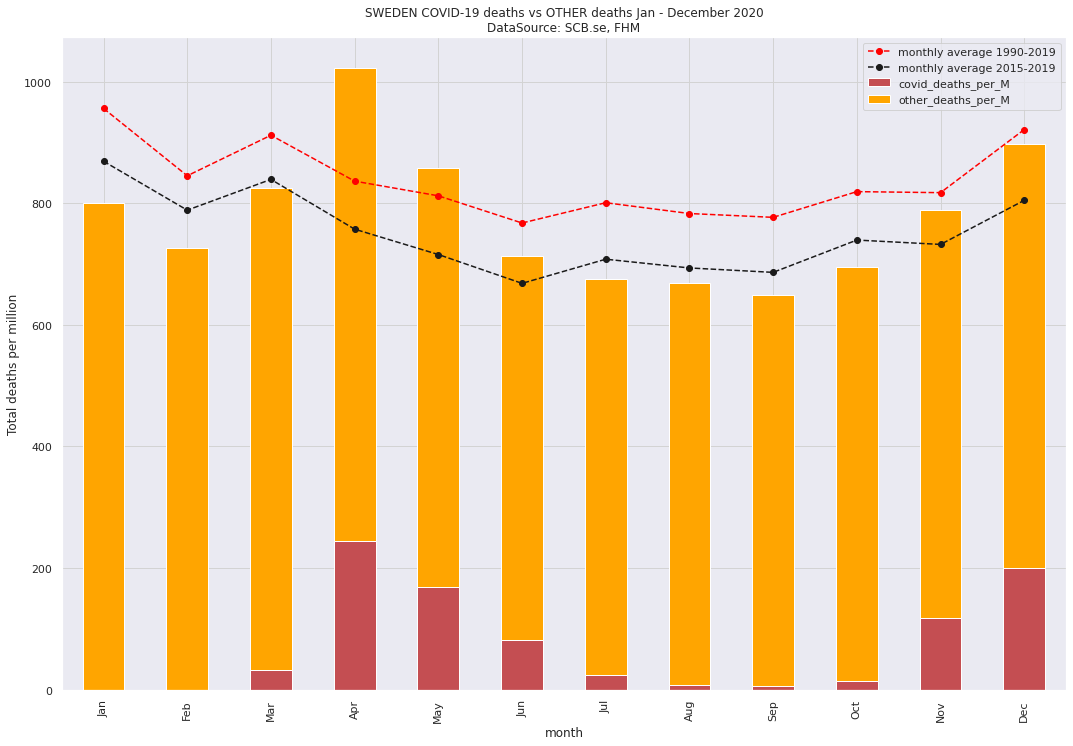

In [123]:
all_deaths.plot(title='SWEDEN COVID-19 deaths vs OTHER deaths Jan - {} 2020\nDataSource: SCB.se, FHM'.format(
    pd.Timestamp(last_complete_month).month_name()),
                kind='bar',x='month',color=['r','orange'],
                y=['covid_deaths_per_M','other_deaths_per_M'],stacked=True,figsize=(18,12))

plt.ylabel('Total deaths per million')
plt.plot(monthly_average.index,monthly_average,'o--',label='monthly average 1990-2019',color='red')
plt.plot(average_2015_2019.index,average_2015_2019,'o--',label='monthly average 2015-2019',color='k')

plt.legend(loc='upper right')
plt.savefig('scb_fhm_covid_vs_other_per_M.jpg',format='jpg')

In [124]:
average_2015_2019

month
Jan    869.32
Feb    788.85
Mar    839.46
Apr    757.56
May    715.85
Jun    668.40
Jul    708.14
Aug    693.75
Sep    686.48
Oct    739.65
Nov    732.48
Dec    805.04
dtype: float64

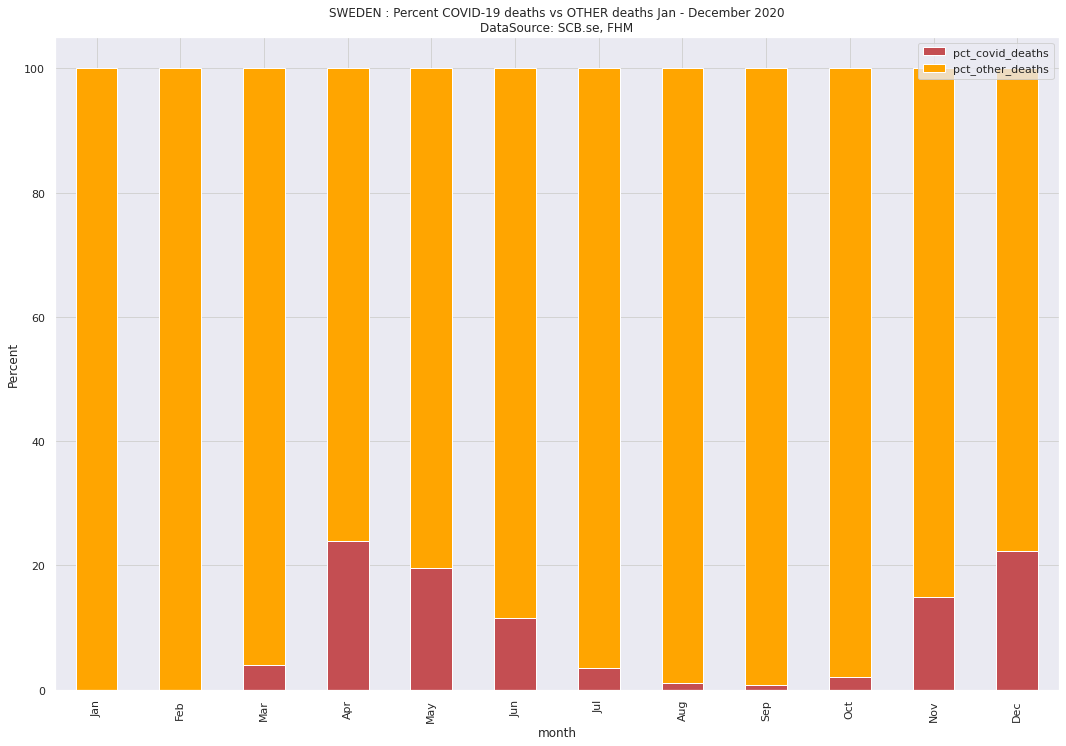

In [125]:
all_deaths.plot(title='SWEDEN : Percent COVID-19 deaths vs OTHER deaths Jan - {} 2020\nDataSource: SCB.se, FHM'.format(
    pd.Timestamp(last_complete_month).month_name()),
                kind='bar',x='month',color=['r','orange'],
                y=['pct_covid_deaths','pct_other_deaths'],stacked=True,figsize=(18,12))

plt.ylabel('Percent')
plt.savefig('scb_fhm_covid_vs_other_rel.jpg',format='jpg')

In [126]:
print (years.min())
print (years.max())
print (years)


month
Jan    800.69
Feb    725.80
Mar    756.62
Apr    716.03
May    681.49
Jun    644.26
Jul    674.36
Aug    668.85
Sep    649.04
Oct    695.06
Nov    696.09
Dec    766.82
dtype: float64
month
Jan    1149.97
Feb     967.89
Mar    1043.52
Apr    1022.29
May     924.54
Jun     886.35
Jul     928.21
Aug     874.73
Sep     883.69
Oct     906.43
Nov     918.94
Dec    1268.21
dtype: float64
month      Jan     Feb      Mar      Apr     May     Jun     Jul     Aug  \
year                                                                       
1990   1019.60  881.73   982.28   930.37  924.54  865.63  897.71  874.73   
1991   1041.25  861.31   927.86   919.28  923.92  886.35  928.21  872.90   
1992   1054.52  967.89   960.63   893.84  866.96  869.39  877.00  832.70   
1993   1007.27  874.68  1043.52   902.21  861.49  833.62  860.23  833.50   
1994   1045.83  828.42   881.35   818.18  845.50  805.77  877.25  815.22   
1995    945.67  838.99   918.63   925.22  885.00  833.99  845.92  825.47   
19

In [127]:
years.sum(axis=1).sort_values(ascending=False)

year
1993    11092.83
1990    11077.30
1991    11013.50
1992    10896.21
1999    10689.70
1996    10643.11
1995    10631.41
2002    10626.47
1997    10548.14
1998    10533.95
2001    10523.14
2000    10521.58
1994    10417.43
2003    10357.00
2005    10136.22
2004    10046.39
2006    10004.88
2007     9989.08
2008     9879.60
2009     9643.84
2012     9621.08
2010     9610.36
2011     9484.27
2013     9373.07
2020     9319.46
2015     9228.18
2014     9128.22
2016     9102.61
2017     9087.92
2018     9011.08
2019     8595.04
dtype: float64

In [128]:
cum_mean_2015_2019 = years.sum(axis=1)
cum_mean_2015_2019 = cum_mean_2015_2019.loc[2015:2020].mean()
print (cum_mean_2015_2019)

cum_mean_1990_2019 = years.sum(axis=1)
cum_mean_1990_2019 = cum_mean_1990_2019.loc[1990:2020].mean()
print (cum_mean_1990_2019)

print (years.loc[2020].sum())

9057.383466328445
10026.873352682525
9319.464969269962


In [129]:
scb_2020_copy = scb_2020_orig.copy()
scb_2020_copy['Månad'] = [month_map[x] for x in scb_2020_copy.index]

scb_2020_copy.reset_index(inplace=True)
#scb_2020_copy['Månad'] = scb_2020_copy['Månad'].apply(date_parser)



scb_2020_copy.sort_values('Månad',inplace=True)
scb_2020_copy.drop(['min_2015_2019','max_2015_2019'],axis=1,inplace=True)

scb_2020_copy['excess_2015'] = scb_2020_copy['2020'] - scb_2020_copy['2015-2019']
scb_2020_copy['excess_2015_cum'] = scb_2020_copy['excess_2015'].cumsum()
scb_2020_copy['2020_cum'] = scb_2020_copy['2020'].cumsum()
scb_2020_copy['2020_per_M'] = scb_2020_copy['2020'] / (curr_pop / 1e6)
scb_2020_copy['2020_per_M_cum'] = scb_2020_copy['2020_per_M'].cumsum()
scb_2020_copy['excess_2015_per_M'] = scb_2020_copy['excess_2015'] / (curr_pop / 1e6)
scb_2020_copy['excess_2015_per_M_cum'] = scb_2020_copy['excess_2015_per_M'].cumsum()
scb_2020_copy

,index,2020,2015-2019,Månad,excess_2015,excess_2015_cum,2020_cum,2020_per_M,2020_per_M_cum,excess_2015_per_M,excess_2015_per_M_cum
3,4,10658.34,7666.92,april,2991.42,2991.42,10658.34,1022.29,1022.29,286.92,286.92
7,8,6973.38,6988.62,augusti,-15.24,2976.19,17631.72,668.85,1691.14,-1.46,285.46
11,12,9362.90,8123.21,december,1239.70,4215.88,26994.62,898.04,2589.18,118.91,404.37
1,2,7567.16,8191.75,februari,-624.59,3591.29,34561.79,725.80,3314.99,-59.91,344.46
0,1,8347.92,8809.69,januari,-461.77,3129.53,42909.71,800.69,4115.68,-44.29,300.17
6,7,7037.07,7133.89,juli,-96.82,3032.70,49946.78,674.96,4790.64,-9.29,290.88
5,6,7437.72,6735.92,juni,701.81,3734.51,57384.51,713.39,5504.02,67.31,358.19
4,5,8943.76,7238.25,maj,1705.51,5440.02,66328.27,857.84,6361.86,163.58,521.78
2,3,8599.61,8487.42,mars,112.19,5552.21,74927.88,824.83,7186.69,10.76,532.54
10,11,8222.59,7375.34,november,847.25,6399.46,83150.47,788.67,7975.36,81.26,613.80


In [130]:
death_df

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
January,8759.04,9000.66,9165.90,8808.70,9220.43,8357.36,10170.90,9426.33,8110.30,8647.51,...,8556.26,8638.99,8434.02,8790.94,8105.00,8673.68,8706.80,9301.92,8826.75,8396.78
February,7574.60,7445.27,8412.94,7649.18,7303.69,7414.59,8185.30,8224.81,7890.45,8467.79,...,7316.64,7274.21,8386.01,7933.76,7408.83,8100.11,7827.00,8042.23,8359.49,7509.16
March,8438.38,8020.52,8349.78,9125.66,7770.33,8118.40,8023.69,8076.12,8662.43,9106.34,...,8068.01,8143.71,8755.10,8566.90,7689.90,8674.68,8179.72,8265.70,9462.46,7814.06
April,7992.46,7946.36,7769.26,7889.91,7213.37,8176.64,7453.51,7559.75,8014.94,7522.02,...,7508.73,7519.35,7708.84,7909.75,7213.78,7738.75,7560.46,7747.60,7818.03,7394.83
May,7942.36,7986.45,7535.65,7533.83,7454.22,7821.22,7562.92,7640.12,7448.75,7559.16,...,7305.63,7310.23,7453.78,7197.59,7388.83,7358.37,7148.61,7504.07,6971.76,7168.16
June,7436.32,7661.74,7556.71,7290.09,7103.98,7370.42,7185.48,7321.66,7033.15,6958.77,...,6857.41,6712.88,6791.63,6837.51,6817.69,6852.86,6716.73,6851.68,6680.97,6653.64
July,7711.88,8023.53,7622.88,7522.80,7734.20,7475.84,7303.93,7401.02,7409.60,7419.61,...,7257.61,7194.16,7173.72,6932.53,7384.83,7127.13,7245.81,6941.87,7488.14,6964.56
August,7514.48,7545.49,7237.88,7289.09,7187.28,7295.12,7186.48,7378.92,7385.51,7537.08,...,7013.49,7023.06,7071.69,6935.53,7196.78,6820.83,7171.66,7011.02,6989.80,7051.81
September,7382.20,7638.69,7268.96,7330.22,7681.01,7364.39,7163.40,7329.69,7009.05,7228.85,...,7085.52,7105.11,6938.66,6843.51,6991.73,7013.02,6885.08,6927.84,6970.75,6875.29
October,7602.66,7479.34,7728.15,7561.92,7535.50,7547.12,7539.84,7653.18,7666.59,7635.47,...,7457.71,7616.40,7485.79,7279.61,7454.84,7246.25,7499.33,7603.29,7460.07,7558.31


In [131]:
scb_2020_abs = scb_2020_orig.reset_index()
scb_2020_abs['Månad'] = [month_map[x] for x in scb_2020_orig.index]

scb_2020_abs['Månad'] = scb_2020_abs['Månad'].apply(date_parser)
print (scb_2020_abs)

#### month fix ### 
scb_2020_abs['Månad'] = pd.Categorical(scb_2020_abs['Månad'],['January','February','March',
                                                             'April','May','June','July','August','September',
                                                             'October','November'])
scb_2020_abs.set_index('Månad',inplace=True)

    index      2020  2015-2019  min_2015_2019  max_2015_2019      Månad
0       1   8347.92    8809.69        8422.21        9327.15    January
1       2   7567.16    8191.75        7515.49        8379.43   February
2       3   8599.61    8487.42        7799.87        9468.10      March
3       4  10658.34    7666.92        7404.21        7828.41      April
4       5   8943.76    7238.25        6967.95        7514.19        May
5       6   7437.72    6735.92        6647.92        6839.22       June
6       7   7037.07    7133.89        6927.15        7462.43       July
7       8   6973.38    6988.62        6783.64        7159.47     August
8       9   6766.89    6932.35        6876.36        6993.65  September
9      10   7246.64    7477.65        7223.28        7599.26    October
10     11   8222.59    7375.34        7094.40        7564.20   November
11     12   9362.90    8123.21        7905.48        8458.50   December


<ipython-input-27-542dd1f79d06>:17: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime(eng,'%B').date().strftime('%B')


In [132]:
scb_2020_abs.sort_index(inplace=True)
scb_2020_abs

,index,2020,2015-2019,min_2015_2019,max_2015_2019
Månad,,,,,
January,1,8347.92,8809.69,8422.21,9327.15
February,2,7567.16,8191.75,7515.49,8379.43
March,3,8599.61,8487.42,7799.87,9468.10
April,4,10658.34,7666.92,7404.21,7828.41
May,5,8943.76,7238.25,6967.95,7514.19
June,6,7437.72,6735.92,6647.92,6839.22
July,7,7037.07,7133.89,6927.15,7462.43
August,8,6973.38,6988.62,6783.64,7159.47
September,9,6766.89,6932.35,6876.36,6993.65


In [133]:
scb_2020_abs = pd.concat([death_df,scb_2020_abs['2020']],axis=1)
death_df.reset_index(inplace=True)
death_df

year,index,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,January,8759.04,9000.66,9165.90,8808.70,9220.43,8357.36,10170.90,9426.33,8110.30,...,8556.26,8638.99,8434.02,8790.94,8105.00,8673.68,8706.80,9301.92,8826.75,8396.78
1,February,7574.60,7445.27,8412.94,7649.18,7303.69,7414.59,8185.30,8224.81,7890.45,...,7316.64,7274.21,8386.01,7933.76,7408.83,8100.11,7827.00,8042.23,8359.49,7509.16
2,March,8438.38,8020.52,8349.78,9125.66,7770.33,8118.40,8023.69,8076.12,8662.43,...,8068.01,8143.71,8755.10,8566.90,7689.90,8674.68,8179.72,8265.70,9462.46,7814.06
3,April,7992.46,7946.36,7769.26,7889.91,7213.37,8176.64,7453.51,7559.75,8014.94,...,7508.73,7519.35,7708.84,7909.75,7213.78,7738.75,7560.46,7747.60,7818.03,7394.83
4,May,7942.36,7986.45,7535.65,7533.83,7454.22,7821.22,7562.92,7640.12,7448.75,...,7305.63,7310.23,7453.78,7197.59,7388.83,7358.37,7148.61,7504.07,6971.76,7168.16
5,June,7436.32,7661.74,7556.71,7290.09,7103.98,7370.42,7185.48,7321.66,7033.15,...,6857.41,6712.88,6791.63,6837.51,6817.69,6852.86,6716.73,6851.68,6680.97,6653.64
6,July,7711.88,8023.53,7622.88,7522.80,7734.20,7475.84,7303.93,7401.02,7409.60,...,7257.61,7194.16,7173.72,6932.53,7384.83,7127.13,7245.81,6941.87,7488.14,6964.56
7,August,7514.48,7545.49,7237.88,7289.09,7187.28,7295.12,7186.48,7378.92,7385.51,...,7013.49,7023.06,7071.69,6935.53,7196.78,6820.83,7171.66,7011.02,6989.80,7051.81
8,September,7382.20,7638.69,7268.96,7330.22,7681.01,7364.39,7163.40,7329.69,7009.05,...,7085.52,7105.11,6938.66,6843.51,6991.73,7013.02,6885.08,6927.84,6970.75,6875.29
9,October,7602.66,7479.34,7728.15,7561.92,7535.50,7547.12,7539.84,7653.18,7666.59,...,7457.71,7616.40,7485.79,7279.61,7454.84,7246.25,7499.33,7603.29,7460.07,7558.31


In [134]:
scb_2020_abs.reset_index(inplace=True)

In [135]:
scb_2020_abs['index'] = pd.Categorical(scb_2020_abs['index'],['January','February','March','April',
                                                             'May','June','July','August',
                                                             'September','October','November','December'])

scb_2020_abs.sort_values('index',inplace=True)
scb_2020_abs.set_index('index',inplace=True)
scb_2020_abs
                                       
                                       

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
index,,,,,,,,,,,,,,,,,,,,,
January,8759.04,9000.66,9165.90,8808.70,9220.43,8357.36,10170.90,9426.33,8110.30,8647.51,...,8638.99,8434.02,8790.94,8105.00,8673.68,8706.80,9301.92,8826.75,8396.78,8347.92
February,7574.60,7445.27,8412.94,7649.18,7303.69,7414.59,8185.30,8224.81,7890.45,8467.79,...,7274.21,8386.01,7933.76,7408.83,8100.11,7827.00,8042.23,8359.49,7509.16,7567.16
March,8438.38,8020.52,8349.78,9125.66,7770.33,8118.40,8023.69,8076.12,8662.43,9106.34,...,8143.71,8755.10,8566.90,7689.90,8674.68,8179.72,8265.70,9462.46,7814.06,8599.61
April,7992.46,7946.36,7769.26,7889.91,7213.37,8176.64,7453.51,7559.75,8014.94,7522.02,...,7519.35,7708.84,7909.75,7213.78,7738.75,7560.46,7747.60,7818.03,7394.83,10658.34
May,7942.36,7986.45,7535.65,7533.83,7454.22,7821.22,7562.92,7640.12,7448.75,7559.16,...,7310.23,7453.78,7197.59,7388.83,7358.37,7148.61,7504.07,6971.76,7168.16,8943.76
June,7436.32,7661.74,7556.71,7290.09,7103.98,7370.42,7185.48,7321.66,7033.15,6958.77,...,6712.88,6791.63,6837.51,6817.69,6852.86,6716.73,6851.68,6680.97,6653.64,7437.72
July,7711.88,8023.53,7622.88,7522.80,7734.20,7475.84,7303.93,7401.02,7409.60,7419.61,...,7194.16,7173.72,6932.53,7384.83,7127.13,7245.81,6941.87,7488.14,6964.56,7037.07
August,7514.48,7545.49,7237.88,7289.09,7187.28,7295.12,7186.48,7378.92,7385.51,7537.08,...,7023.06,7071.69,6935.53,7196.78,6820.83,7171.66,7011.02,6989.80,7051.81,6973.38
September,7382.20,7638.69,7268.96,7330.22,7681.01,7364.39,7163.40,7329.69,7009.05,7228.85,...,7105.11,6938.66,6843.51,6991.73,7013.02,6885.08,6927.84,6970.75,6875.29,6766.89


In [136]:
total_abs_ytd = scb_2020_abs[:pd.to_datetime(last_complete_month).month_name()].sum()
total_abs_ytd

1990    95161.0
1991    95202.0
1992    94710.0
1993    97008.0
1994    91844.0
1995    93955.0
1996    94133.0
1997    93326.0
1998    93271.0
1999    94726.0
2000    93461.0
2001    93752.0
2002    95009.0
2003    92961.0
2004    90532.0
2005    91710.0
2006    91177.0
2007    91729.0
2008    91449.0
2009    90080.0
2010    90487.0
2011    89938.0
2012    91938.0
2013    90402.0
2014    88976.0
2015    90907.0
2016    90982.0
2017    91972.0
2018    92185.0
2019    88766.0
2020    97164.0
dtype: float64

In [137]:
year_pairs_abs = total_abs_ytd.iloc[1::2].reset_index() + total_abs_ytd.iloc[2::2].reset_index()
year_pairs_abs['index'] = year_pairs_abs['index'].apply(lambda x : x[:4] + '_' + x[4:])
year_pairs_abs.columns = ['years','deaths']
year_pairs_abs

,years,deaths
0,1991_1992,189912.0
1,1993_1994,188852.0
2,1995_1996,188088.0
3,1997_1998,186597.0
4,1999_2000,188187.0
5,2001_2002,188761.0
6,2003_2004,183493.0
7,2005_2006,182887.0
8,2007_2008,183178.0
9,2009_2010,180567.0


In [138]:
pop = scb_pop.T[1:]

In [139]:
pop = pop.iloc[::2].reset_index()
pop.columns=['year','pop']
pop

,year,pop
0,1991,8644119
1,1993,8745109
2,1995,8837496
3,1997,8847625
4,1999,8861426
5,2001,8909128
6,2003,8975670
7,2005,9047752
8,2007,9182927
9,2009,9340682


In [140]:
year_pairs_abs['dead_per_M'] = year_pairs_abs['deaths'] / (pop['pop'] / 1e6)
year_pairs_abs.set_index('years',inplace=True)
year_pairs_abs

,deaths,dead_per_M
years,,
1991_1992,189912.0,21970.08
1993_1994,188852.0,21595.16
1995_1996,188088.0,21282.95
1997_1998,186597.0,21090.07
1999_2000,188187.0,21236.65
2001_2002,188761.0,21187.37
2003_2004,183493.0,20443.38
2005_2006,182887.0,20213.53
2007_2008,183178.0,19947.67


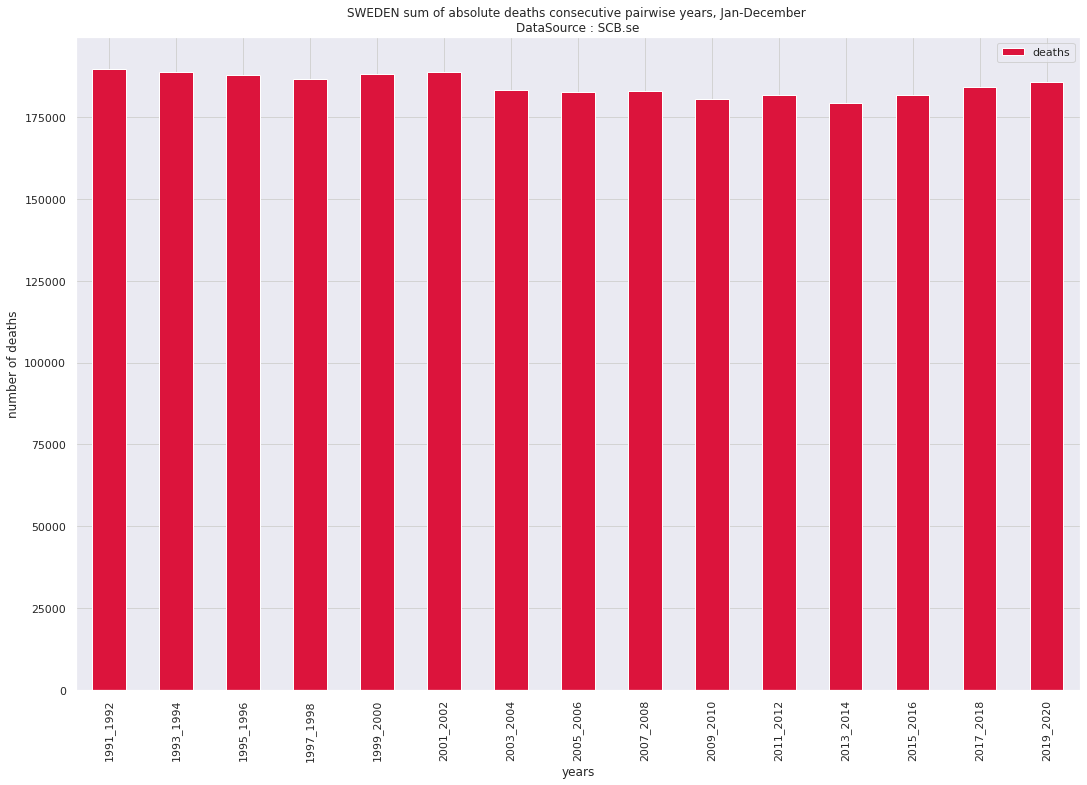

In [141]:
year_pairs_abs.plot(figsize=(18,12),y='deaths',kind='bar',color='crimson',
                   title='SWEDEN sum of absolute deaths consecutive pairwise years, Jan-{} \nDataSource : SCB.se'.format(
                   pd.to_datetime(last_complete_month).month_name()))
plt.ylabel('number of deaths')

plt.savefig('pair_abs_deaths.jpg',format='jpg',dpi=400)

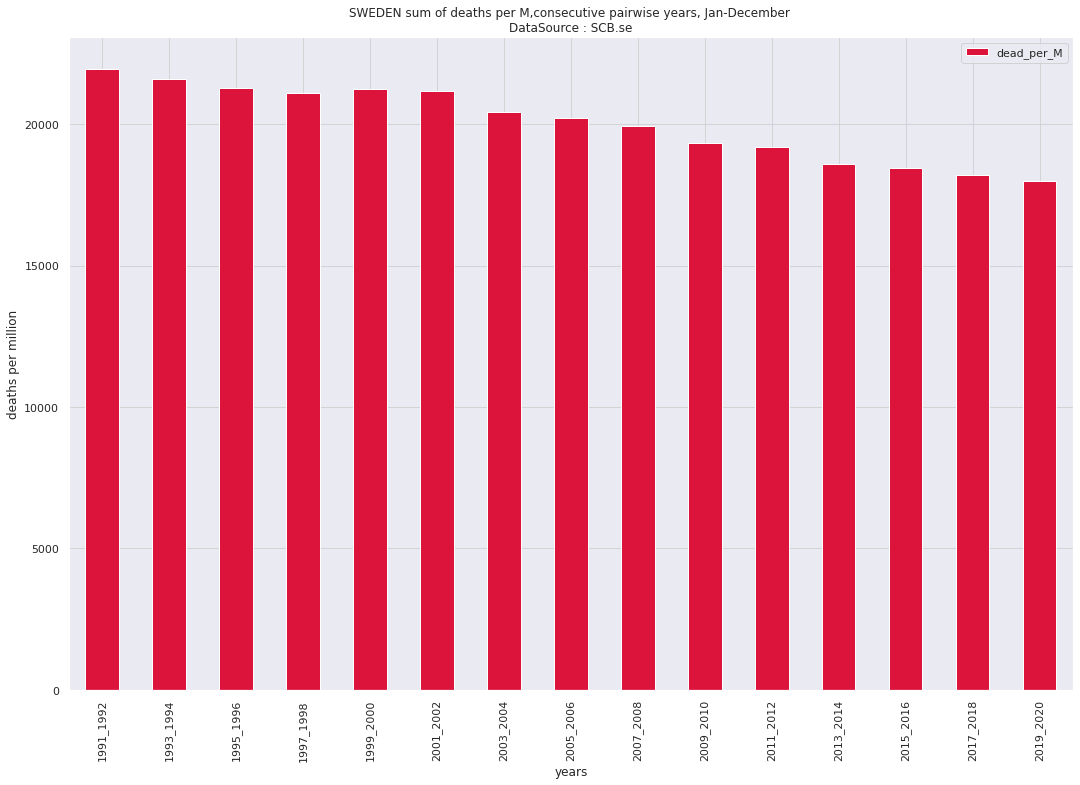

In [142]:
year_pairs_abs.plot(figsize=(18,12),y='dead_per_M',kind='bar',color='crimson',
                   title='SWEDEN sum of deaths per M,consecutive pairwise years, Jan-{} \nDataSource : SCB.se'.format(
                   pd.to_datetime(last_complete_month).month_name()))
plt.ylabel('deaths per million')

plt.savefig('pair_rel_deaths.jpg',format='jpg',dpi=400)

In [143]:
pd.to_datetime(last_complete_month).month_name()

'December'

In [144]:
deaths_per_m_grouped_sums_1990_2020_YTD.sum(axis=1)



year
1990    11077.30
1991    11013.50
1992    10896.21
1993    11092.83
1994    10417.43
1995    10631.41
1996    10643.11
1997    10548.14
1998    10533.95
1999    10689.70
2000    10521.58
2001    10523.14
2002    10626.47
2003    10357.00
2004    10046.39
2005    10136.22
2006    10004.88
2007     9989.08
2008     9879.60
2009     9643.84
2010     9610.36
2011     9484.27
2012     9621.08
2013     9373.07
2014     9128.22
2015     9228.18
2016     9102.61
2017     9087.92
2018     9011.08
2019     8595.04
2020     9319.46
dtype: float64

In [145]:
last_date

datetime.date(2020, 12, 31)

In [146]:
deaths_per_m_grouped_sums_1990_2020_YTD


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1990,1019.60,881.73,982.28,930.37,924.54,865.63,897.71,874.73,859.33,884.99,918.94,1037.45
1991,1041.25,861.31,927.86,919.28,923.92,886.35,928.21,872.90,883.69,865.25,911.98,991.51
1992,1054.52,967.89,960.63,893.84,866.96,869.39,877.00,832.70,836.28,889.11,891.76,956.13
1993,1007.27,874.68,1043.52,902.21,861.49,833.62,860.23,833.50,838.21,864.70,905.19,1268.21
1994,1045.83,828.42,881.35,818.18,845.50,805.77,877.25,815.22,871.22,854.72,855.29,918.69
1995,945.67,838.99,918.63,925.22,885.00,833.99,845.92,825.47,833.31,853.99,875.69,1049.51
1996,1149.97,925.47,907.20,842.73,855.10,812.42,825.82,812.54,809.93,852.49,855.89,993.57
1997,1065.41,929.61,912.80,854.44,863.52,827.53,836.50,834.00,828.44,865.00,815.83,915.07
1998,915.97,891.14,978.33,905.20,841.26,794.32,836.83,834.11,791.60,865.86,889.55,989.78


In [147]:
first_part_of_year = ['Aug','Sep','Oct','Nov','Dec']
second_part_of_year = ['Jan','Feb','Mar','Apr','May','Jun','Jul']


first = deaths_per_m_grouped_sums_1990_2020_YTD[first_part_of_year][1:]
second = deaths_per_m_grouped_sums_1990_2020_YTD[second_part_of_year][1:]

first = first[::2]
second = second[1::2]
print (first.sum(axis=1))
second.sum(axis=1)


year
1991    4525.33
1993    4709.81
1995    4437.97
1997    4258.34
1999    4406.15
2001    4317.25
2003    4253.88
2005    4027.72
2007    4082.73
2009    3880.15
2011    3917.01
2013    3756.72
2015    3693.16
2017    3687.36
2019    3569.55
dtype: float64


year
1992    6490.23
1994    6102.30
1996    6318.70
1998    6163.05
2000    6281.43
2002    6203.49
2004    5876.38
2006    5855.32
2008    5833.53
2010    5615.20
2012    5724.54
2014    5335.69
2016    5341.10
2018    5435.64
2020    5619.80
dtype: float64

In [148]:
season_deaths_per_m = pd.concat([first.reset_index(drop=True),second.reset_index(drop=True)],axis=1)
season_deaths_per_m.sum(axis=1)

0     11015.55
1     10812.11
2     10756.67
3     10421.39
4     10687.59
5     10520.74
6     10130.27
7      9883.05
8      9916.25
9      9495.35
10     9641.55
11     9092.41
12     9034.27
13     9123.00
14     9189.35
dtype: float64

Text(0, 0.5, 'dead per million')

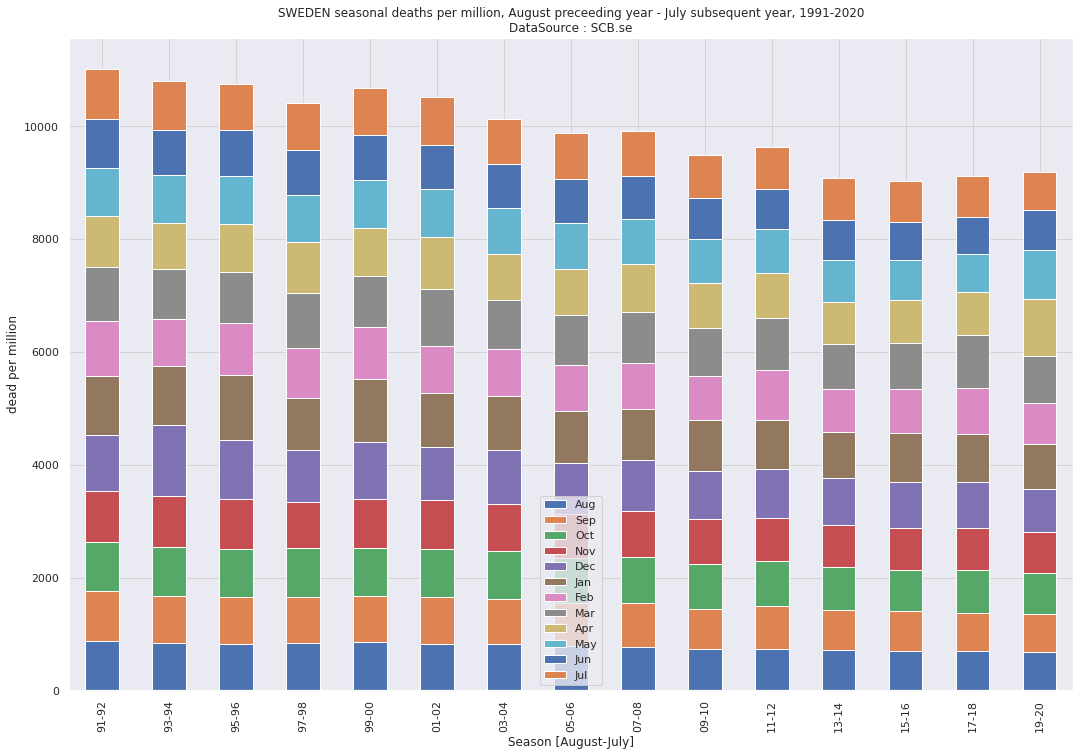

In [149]:
title = 'SWEDEN seasonal deaths per million, August preceeding year - July subsequent year,'\
' 1991-2020\nDataSource : SCB.se'

xlabels = ['91-92','93-94','95-96','97-98','99-00','01-02','03-04','05-06','07-08',
          '09-10','11-12','13-14','15-16','17-18','19-20']

season_deaths_per_m.plot(figsize=(18,12),kind='bar',stacked=True,title=title)
plt.xticks(range(len(season_deaths_per_m.index)),xlabels)
plt.legend(loc='lower center')
plt.xlabel('Season [August-July]')
plt.ylabel('dead per million')
#plt.savefig('sweden_seasonal_deaths_per_m.jpg',format='jpg',dpi=400)

In [150]:
death_df.rename(columns={'index' : 'Månad'},inplace=True)

In [151]:
print (scb_2020_orig)
scb_2020_orig['Månad'] = [month_map[x] for x in scb_2020_orig.index]
scb_2020_orig.index = scb_2020_orig.reset_index()['Månad'].apply(date_parser)

        2020  2015-2019  min_2015_2019  max_2015_2019
1    8347.92    8809.69        8422.21        9327.15
2    7567.16    8191.75        7515.49        8379.43
3    8599.61    8487.42        7799.87        9468.10
4   10658.34    7666.92        7404.21        7828.41
5    8943.76    7238.25        6967.95        7514.19
6    7437.72    6735.92        6647.92        6839.22
7    7037.07    7133.89        6927.15        7462.43
8    6973.38    6988.62        6783.64        7159.47
9    6766.89    6932.35        6876.36        6993.65
10   7246.64    7477.65        7223.28        7599.26
11   8222.59    7375.34        7094.40        7564.20
12   9362.90    8123.21        7905.48        8458.50


<ipython-input-27-542dd1f79d06>:17: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime(eng,'%B').date().strftime('%B')


In [152]:
scb_2020_orig

,2020,2015-2019,min_2015_2019,max_2015_2019,Månad
Månad,,,,,
January,8347.92,8809.69,8422.21,9327.15,januari
February,7567.16,8191.75,7515.49,8379.43,februari
March,8599.61,8487.42,7799.87,9468.10,mars
April,10658.34,7666.92,7404.21,7828.41,april
May,8943.76,7238.25,6967.95,7514.19,maj
June,7437.72,6735.92,6647.92,6839.22,juni
July,7037.07,7133.89,6927.15,7462.43,juli
August,6973.38,6988.62,6783.64,7159.47,augusti
September,6766.89,6932.35,6876.36,6993.65,september


In [153]:
abs_deaths = death_df.set_index('Månad').join(scb_2020_orig['2020'])

In [154]:
abs_deaths = abs_deaths.T
abs_deaths

Månad,January,February,March,April,May,June,July,August,September,October,November,December
1990,8759.04,7574.60,8438.38,7992.46,7942.36,7436.32,7711.88,7514.48,7382.20,7602.66,7894.26,8912.36
1991,9000.66,7445.27,8020.52,7946.36,7986.45,7661.74,8023.53,7545.49,7638.69,7479.34,7883.22,8570.73
1992,9165.90,8412.94,8349.78,7769.26,7535.65,7556.71,7622.88,7237.88,7268.96,7728.15,7751.21,8310.67
1993,8808.70,7649.18,9125.66,7889.91,7533.83,7290.09,7522.80,7289.09,7330.22,7561.92,7915.99,11090.61
1994,9220.43,7303.69,7770.33,7213.37,7454.22,7103.98,7734.20,7187.28,7681.01,7535.50,7540.52,8099.48
1995,8357.36,7414.59,8118.40,8176.64,7821.22,7370.42,7475.84,7295.12,7364.39,7547.12,7738.89,9275.02
1996,10170.90,8185.30,8023.69,7453.51,7562.92,7185.48,7303.93,7186.48,7163.40,7539.84,7569.95,8787.61
1997,9426.33,8224.81,8076.12,7559.75,7640.12,7321.66,7401.02,7378.92,7329.69,7653.18,7218.18,8096.22
1998,8110.30,7890.45,8662.43,8014.94,7448.75,7033.15,7409.60,7385.51,7009.05,7666.59,7876.40,8763.83
1999,8647.51,8467.79,9106.34,7522.02,7559.16,6958.77,7419.61,7537.08,7228.85,7635.47,7654.55,8988.87


In [155]:
first_season_half = abs_deaths.loc[:,'September' : 'December'][1::2]
second_season_half = abs_deaths.loc[:,: 'August'][2::2]

print (first_season_half)
second_season_half

Månad  September  October  November  December
1991     7638.69  7479.34   7883.22   8570.73
1993     7330.22  7561.92   7915.99  11090.61
1995     7364.39  7547.12   7738.89   9275.02
1997     7329.69  7653.18   7218.18   8096.22
1999     7228.85  7635.47   7654.55   8988.87
2001     7314.69  7617.04   7739.59   8438.71
2003     7254.39  7675.26   7420.13   8533.09
2005     6907.52  7163.09   7159.08   8084.16
2007     7188.82  7514.30   7487.26   8288.47
2009     6715.95  7444.92   7395.85   7885.50
2011     7105.11  7616.40   7195.16   8204.74
2013     6843.51  7279.61   7239.60   7934.76
2015     7013.02  7246.25   7350.36   7950.96
2017     6927.84  7603.29   7498.06   8276.73
2019     6875.29  7558.31   7460.02   7919.37


Månad,January,February,March,April,May,June,July,August
1992,9165.90,8412.94,8349.78,7769.26,7535.65,7556.71,7622.88,7237.88
1994,9220.43,7303.69,7770.33,7213.37,7454.22,7103.98,7734.20,7187.28
1996,10170.90,8185.30,8023.69,7453.51,7562.92,7185.48,7303.93,7186.48
1998,8110.30,7890.45,8662.43,8014.94,7448.75,7033.15,7409.60,7385.51
2000,9862.42,8214.66,8106.22,7536.89,7523.83,7060.94,7491.70,7285.86
2002,8506.90,7478.56,9048.19,8182.54,7601.08,7083.90,7562.92,7642.26
2004,8741.41,7391.25,7890.16,7276.81,7454.49,7002.76,7197.51,7235.65
2006,8431.70,7370.85,8191.28,7399.90,7401.91,7168.50,7396.90,7328.78
2008,8373.25,7560.26,8376.26,7851.62,7412.08,7080.67,7342.99,7047.63
2010,8556.26,7316.64,8068.01,7508.73,7305.63,6857.41,7257.61,7013.49


In [156]:
season_deaths_abs= pd.concat([first_season_half.reset_index(drop=True),second_season_half.reset_index(drop=True)],axis=1)
season_deaths_abs.sum(axis=1)

0     95222.98
1     94886.22
2     94997.63
3     92252.40
4     94590.24
5     94216.39
6     91072.91
7     90003.68
8     91523.62
9     89326.00
10    91896.20
11    88503.12
12    90117.39
13    92903.32
14    95377.97
dtype: float64

In [157]:
scb_pop['2020'] = scb_pop['2019']

In [158]:
ave_pop = ((scb_pop.T + scb_pop.T.shift()) / 2)[::2].reset_index(drop=True).dropna().reset_index(drop=True)
ave_pop

,0
0,8.67e+06
1,8.78e+06
2,8.84e+06
3,8.85e+06
4,8.87e+06
5,8.92e+06
6,8.99e+06
7,9.08e+06
8,9.22e+06
9,9.38e+06


In [159]:
season_deaths_abs = season_deaths_abs[['January','February','March','April','May','June',
                                      'July','August','September','October','November','December']]

season_deaths_abs.index = ['91-92','93-94','95-96','97-98','99-00','01-02','03-04',
                          '05-06','07-08','09-10','11-12','13-14','15-16',
                          '17-18','19-20']

season_deaths_abs

Månad,January,February,March,April,May,June,July,August,September,October,November,December
91-92,9165.90,8412.94,8349.78,7769.26,7535.65,7556.71,7622.88,7237.88,7638.69,7479.34,7883.22,8570.73
93-94,9220.43,7303.69,7770.33,7213.37,7454.22,7103.98,7734.20,7187.28,7330.22,7561.92,7915.99,11090.61
95-96,10170.90,8185.30,8023.69,7453.51,7562.92,7185.48,7303.93,7186.48,7364.39,7547.12,7738.89,9275.02
97-98,8110.30,7890.45,8662.43,8014.94,7448.75,7033.15,7409.60,7385.51,7329.69,7653.18,7218.18,8096.22
99-00,9862.42,8214.66,8106.22,7536.89,7523.83,7060.94,7491.70,7285.86,7228.85,7635.47,7654.55,8988.87
01-02,8506.90,7478.56,9048.19,8182.54,7601.08,7083.90,7562.92,7642.26,7314.69,7617.04,7739.59,8438.71
03-04,8741.41,7391.25,7890.16,7276.81,7454.49,7002.76,7197.51,7235.65,7254.39,7675.26,7420.13,8533.09
05-06,8431.70,7370.85,8191.28,7399.90,7401.91,7168.50,7396.90,7328.78,6907.52,7163.09,7159.08,8084.16
07-08,8373.25,7560.26,8376.26,7851.62,7412.08,7080.67,7342.99,7047.63,7188.82,7514.30,7487.26,8288.47
09-10,8556.26,7316.64,8068.01,7508.73,7305.63,6857.41,7257.61,7013.49,6715.95,7444.92,7395.85,7885.50


In [160]:
season_tot_deaths_abs = season_deaths_abs.sum(axis=1)
season_tot_deaths_per_m = season_tot_deaths_abs.reset_index(drop=True) / (ave_pop[0] / 1e6)

season_tot_deaths_per_m.index = ['91-92','93-94','95-96','97-98','99-00','01-02','03-04',
                          '05-06','07-08','09-10','11-12','13-14','15-16',
                          '17-18','19-20']
season_tot_deaths_per_m

91-92    10985.49
93-94    10806.17
95-96    10745.13
97-98    10422.85
99-00    10661.53
01-02    10556.51
03-04    10126.49
05-06     9911.75
07-08     9927.03
09-10     9524.93
11-12     9653.60
13-14     9127.69
15-16     9081.59
17-18     9130.36
19-20     9235.26
dtype: float64

<AxesSubplot:>

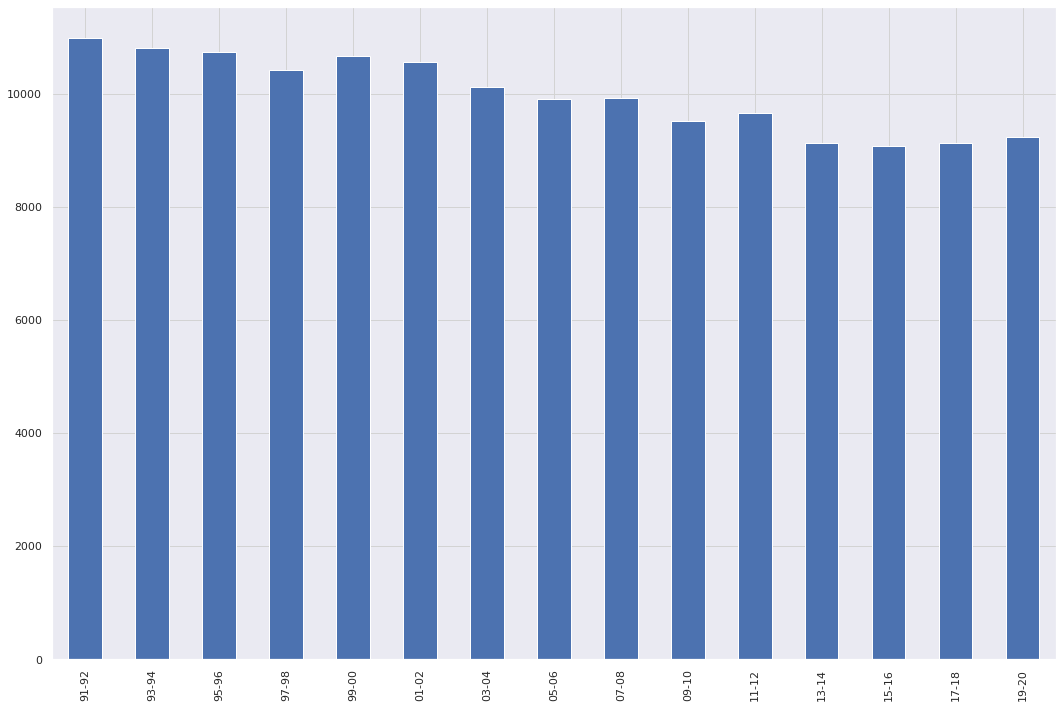

In [161]:
season_tot_deaths_per_m.plot(figsize=(18,12),kind='bar')

In [162]:
second_season_half


Månad,January,February,March,April,May,June,July,August
1992,9165.90,8412.94,8349.78,7769.26,7535.65,7556.71,7622.88,7237.88
1994,9220.43,7303.69,7770.33,7213.37,7454.22,7103.98,7734.20,7187.28
1996,10170.90,8185.30,8023.69,7453.51,7562.92,7185.48,7303.93,7186.48
1998,8110.30,7890.45,8662.43,8014.94,7448.75,7033.15,7409.60,7385.51
2000,9862.42,8214.66,8106.22,7536.89,7523.83,7060.94,7491.70,7285.86
2002,8506.90,7478.56,9048.19,8182.54,7601.08,7083.90,7562.92,7642.26
2004,8741.41,7391.25,7890.16,7276.81,7454.49,7002.76,7197.51,7235.65
2006,8431.70,7370.85,8191.28,7399.90,7401.91,7168.50,7396.90,7328.78
2008,8373.25,7560.26,8376.26,7851.62,7412.08,7080.67,7342.99,7047.63
2010,8556.26,7316.64,8068.01,7508.73,7305.63,6857.41,7257.61,7013.49


In [163]:
abs_deaths

Månad,January,February,March,April,May,June,July,August,September,October,November,December
1990,8759.04,7574.60,8438.38,7992.46,7942.36,7436.32,7711.88,7514.48,7382.20,7602.66,7894.26,8912.36
1991,9000.66,7445.27,8020.52,7946.36,7986.45,7661.74,8023.53,7545.49,7638.69,7479.34,7883.22,8570.73
1992,9165.90,8412.94,8349.78,7769.26,7535.65,7556.71,7622.88,7237.88,7268.96,7728.15,7751.21,8310.67
1993,8808.70,7649.18,9125.66,7889.91,7533.83,7290.09,7522.80,7289.09,7330.22,7561.92,7915.99,11090.61
1994,9220.43,7303.69,7770.33,7213.37,7454.22,7103.98,7734.20,7187.28,7681.01,7535.50,7540.52,8099.48
1995,8357.36,7414.59,8118.40,8176.64,7821.22,7370.42,7475.84,7295.12,7364.39,7547.12,7738.89,9275.02
1996,10170.90,8185.30,8023.69,7453.51,7562.92,7185.48,7303.93,7186.48,7163.40,7539.84,7569.95,8787.61
1997,9426.33,8224.81,8076.12,7559.75,7640.12,7321.66,7401.02,7378.92,7329.69,7653.18,7218.18,8096.22
1998,8110.30,7890.45,8662.43,8014.94,7448.75,7033.15,7409.60,7385.51,7009.05,7666.59,7876.40,8763.83
1999,8647.51,8467.79,9106.34,7522.02,7559.16,6958.77,7419.61,7537.08,7228.85,7635.47,7654.55,8988.87


In [164]:
first_season_half_even = abs_deaths.loc[:,'November' : 'December'][2::2]
first_season_half_even = first_season_half_even[:-1]
second_season_half_even = abs_deaths.loc[:,: 'October'][3::2]

print (first_season_half_even)
second_season_half_even

Månad  November  December
1992    7751.21   8310.67
1994    7540.52   8099.48
1996    7569.95   8787.61
1998    7876.40   8763.83
2000    7479.65   8192.57
2002    7752.72   8834.29
2004    7463.52   8329.84
2006    7635.31   8100.13
2008    7452.13   8433.33
2010    7453.71   8606.28
2012    7297.75   8441.02
2014    7253.79   8070.00
2016    7565.47   8475.33
2018    7121.16   8035.62


Månad,January,February,March,April,May,June,July,August,September,October
1993,8808.70,7649.18,9125.66,7889.91,7533.83,7290.09,7522.80,7289.09,7330.22,7561.92
1995,8357.36,7414.59,8118.40,8176.64,7821.22,7370.42,7475.84,7295.12,7364.39,7547.12
1997,9426.33,8224.81,8076.12,7559.75,7640.12,7321.66,7401.02,7378.92,7329.69,7653.18
1999,8647.51,8467.79,9106.34,7522.02,7559.16,6958.77,7419.61,7537.08,7228.85,7635.47
2001,8311.14,7504.54,8350.32,8005.78,7935.47,7504.54,7677.31,7352.86,7314.69,7617.04
2003,9358.78,7643.12,8341.24,7733.52,7303.61,6909.85,7489.43,7298.58,7254.39,7675.26
2005,8235.50,7885.71,9354.01,7985.94,7446.73,7158.08,7202.18,7128.01,6907.52,7163.09
2007,8443.70,7697.58,8749.16,7803.74,7261.93,7069.64,7211.85,7012.55,7188.82,7514.30
2009,9407.53,7922.55,8033.70,7362.81,7355.80,6823.09,6931.23,6801.06,6715.95,7444.92
2011,8638.99,7274.21,8143.71,7519.35,7310.23,6712.88,7194.16,7023.06,7105.11,7616.40


In [165]:
season_deaths_abs_even = pd.concat([first_season_half_even.reset_index(drop=True),
                                    second_season_half_even.reset_index(drop=True)],axis=1)

season_deaths_abs_even


Månad,November,December,January,February,March,April,May,June,July,August,September,October
0,7751.21,8310.67,8808.70,7649.18,9125.66,7889.91,7533.83,7290.09,7522.80,7289.09,7330.22,7561.92
1,7540.52,8099.48,8357.36,7414.59,8118.40,8176.64,7821.22,7370.42,7475.84,7295.12,7364.39,7547.12
2,7569.95,8787.61,9426.33,8224.81,8076.12,7559.75,7640.12,7321.66,7401.02,7378.92,7329.69,7653.18
3,7876.40,8763.83,8647.51,8467.79,9106.34,7522.02,7559.16,6958.77,7419.61,7537.08,7228.85,7635.47
4,7479.65,8192.57,8311.14,7504.54,8350.32,8005.78,7935.47,7504.54,7677.31,7352.86,7314.69,7617.04
5,7752.72,8834.29,9358.78,7643.12,8341.24,7733.52,7303.61,6909.85,7489.43,7298.58,7254.39,7675.26
6,7463.52,8329.84,8235.50,7885.71,9354.01,7985.94,7446.73,7158.08,7202.18,7128.01,6907.52,7163.09
7,7635.31,8100.13,8443.70,7697.58,8749.16,7803.74,7261.93,7069.64,7211.85,7012.55,7188.82,7514.30
8,7452.13,8433.33,9407.53,7922.55,8033.70,7362.81,7355.80,6823.09,6931.23,6801.06,6715.95,7444.92
9,7453.71,8606.28,8638.99,7274.21,8143.71,7519.35,7310.23,6712.88,7194.16,7023.06,7105.11,7616.40


In [166]:
season_deaths_abs_even = season_deaths_abs_even[['January','February','March','April','May','June',
                                      'July','August','September','October','November','December']]

season_deaths_abs_even.index = ['92-93','94-95','96-97','98-99','00-01','02-03','04-05',
                          '06-07','08-09','10-11','12-13','14-15','16-17',
                          '18-19']

season_deaths_abs_even

Månad,January,February,March,April,May,June,July,August,September,October,November,December
92-93,8808.70,7649.18,9125.66,7889.91,7533.83,7290.09,7522.80,7289.09,7330.22,7561.92,7751.21,8310.67
94-95,8357.36,7414.59,8118.40,8176.64,7821.22,7370.42,7475.84,7295.12,7364.39,7547.12,7540.52,8099.48
96-97,9426.33,8224.81,8076.12,7559.75,7640.12,7321.66,7401.02,7378.92,7329.69,7653.18,7569.95,8787.61
98-99,8647.51,8467.79,9106.34,7522.02,7559.16,6958.77,7419.61,7537.08,7228.85,7635.47,7876.40,8763.83
00-01,8311.14,7504.54,8350.32,8005.78,7935.47,7504.54,7677.31,7352.86,7314.69,7617.04,7479.65,8192.57
02-03,9358.78,7643.12,8341.24,7733.52,7303.61,6909.85,7489.43,7298.58,7254.39,7675.26,7752.72,8834.29
04-05,8235.50,7885.71,9354.01,7985.94,7446.73,7158.08,7202.18,7128.01,6907.52,7163.09,7463.52,8329.84
06-07,8443.70,7697.58,8749.16,7803.74,7261.93,7069.64,7211.85,7012.55,7188.82,7514.30,7635.31,8100.13
08-09,9407.53,7922.55,8033.70,7362.81,7355.80,6823.09,6931.23,6801.06,6715.95,7444.92,7452.13,8433.33
10-11,8638.99,7274.21,8143.71,7519.35,7310.23,6712.88,7194.16,7023.06,7105.11,7616.40,7453.71,8606.28


In [167]:
season_even_tot_deaths_abs = season_deaths_abs_even.sum(axis=1)
season_even_tot_deaths_abs

92-93    94063.29
94-95    92581.10
96-97    94369.16
98-99    94722.81
00-01    93245.92
02-03    93594.79
04-05    92260.12
06-07    91688.71
08-09    90684.10
10-11    90598.08
12-13    90966.41
14-15    90929.47
16-17    92238.00
18-19    88543.38
dtype: float64

In [168]:
scb_pop.T

,0
1990,8590630
1991,8644119
1992,8692013
1993,8745109
1994,8816381
1995,8837496
1996,8844499
1997,8847625
1998,8854322
1999,8861426


In [169]:
ava_pop_even = ((scb_pop.T.loc['1992':] + scb_pop.T.loc['1992':].shift(-1)) / 2)[::2].dropna().astype(int).reset_index(drop=True)
ava_pop_even

,0
0,8718561
1,8826938
2,8846062
3,8857874
4,8895960
5,8958229
6,9029572
7,9148092
8,9298514
9,9449212


In [170]:
season_even_tot_deaths_per_m = season_even_tot_deaths_abs.reset_index(drop=True) / (ava_pop_even[0] / 1e6)
season_even_tot_deaths_per_m.dropna(inplace=True)

season_even_tot_deaths_per_m

0     10788.85
1     10488.47
2     10667.93
3     10693.63
4     10481.83
5     10447.91
6     10217.55
7     10022.71
8      9752.54
9      9587.90
10     9475.29
11     9279.29
12     9170.89
13     8614.10
dtype: float64

In [171]:
season_even_tot_deaths_per_m.index = ['92-93','94-95','96-97','98-99','00-01','02-03','04-05',
                          '06-07','08-09','10-11','12-13','14-15','16-17',
                          '18-19']

season_even_tot_deaths_per_m

92-93    10788.85
94-95    10488.47
96-97    10667.93
98-99    10693.63
00-01    10481.83
02-03    10447.91
04-05    10217.55
06-07    10022.71
08-09     9752.54
10-11     9587.90
12-13     9475.29
14-15     9279.29
16-17     9170.89
18-19     8614.10
dtype: float64

In [172]:
all_season_deaths_per_m = pd.concat([season_tot_deaths_per_m,season_even_tot_deaths_per_m])
all_season_deaths_per_m

91-92    10985.49
93-94    10806.17
95-96    10745.13
97-98    10422.85
99-00    10661.53
01-02    10556.51
03-04    10126.49
05-06     9911.75
07-08     9927.03
09-10     9524.93
11-12     9653.60
13-14     9127.69
15-16     9081.59
17-18     9130.36
19-20     9235.26
92-93    10788.85
94-95    10488.47
96-97    10667.93
98-99    10693.63
00-01    10481.83
02-03    10447.91
04-05    10217.55
06-07    10022.71
08-09     9752.54
10-11     9587.90
12-13     9475.29
14-15     9279.29
16-17     9170.89
18-19     8614.10
dtype: float64

In [173]:
new_index = ['91-92','92-93','93-94','94-95','95-96','96-97','97-98','98-99',
            '99-00','00-01','01-02','02-03','03-04','04-05','05-06','06-07',
            '07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15',
            '15-16','16-17','17-18','18-19','19-20']

all_season_deaths_per_m = all_season_deaths_per_m.reindex(new_index)
all_season_deaths_per_m

91-92    10985.49
92-93    10788.85
93-94    10806.17
94-95    10488.47
95-96    10745.13
96-97    10667.93
97-98    10422.85
98-99    10693.63
99-00    10661.53
00-01    10481.83
01-02    10556.51
02-03    10447.91
03-04    10126.49
04-05    10217.55
05-06     9911.75
06-07    10022.71
07-08     9927.03
08-09     9752.54
09-10     9524.93
10-11     9587.90
11-12     9653.60
12-13     9475.29
13-14     9127.69
14-15     9279.29
15-16     9081.59
16-17     9170.89
17-18     9130.36
18-19     8614.10
19-20     9235.26
dtype: float64

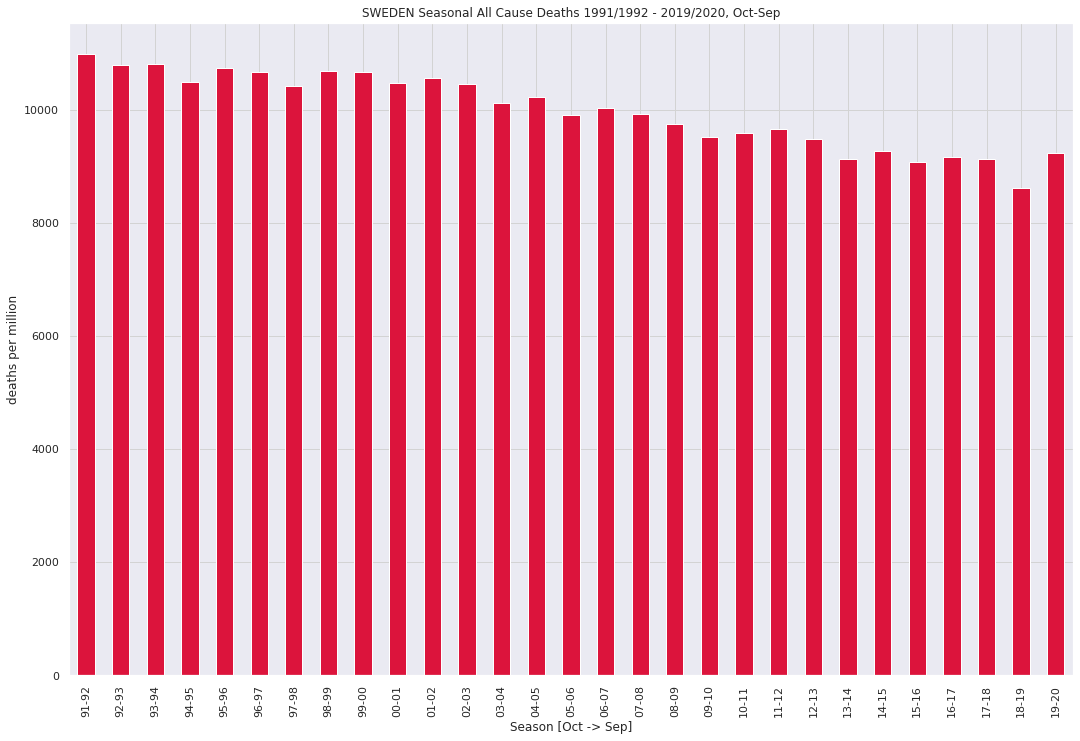

In [174]:
all_season_deaths_per_m.plot(figsize=(18,12),kind='bar',color='crimson',
                            title='SWEDEN Seasonal All Cause Deaths 1991/1992 - 2019/2020, Oct-Sep')

plt.xlabel('Season [Oct -> Sep]')
plt.ylabel('deaths per million')

plt.savefig('sweden_seasonal_deaths_91_2020_sep_aug.jpg',format='jpg',dpi=400)
                             

In [175]:
scb = parse_scb_prel_2021(YTD=False)
scb = scb.loc[:,'2015':'2015-2019'].astype(int)
scb['2015-2018'] = scb.loc[:,'2015':'2018'].mean(axis=1)
scb

,2015,2016,2017,2018,2019,2020,2021,2015-2019,2015-2018
2020-01-01,298,250,347,282,309,260,96,297,294.25
2020-01-02,274,277,324,320,284,310,113,296,298.75
2020-01-03,283,299,317,303,279,262,109,296,300.50
2020-01-04,258,265,312,292,290,281,80,284,281.75
2020-01-05,270,265,311,299,283,272,58,286,286.25
...,...,...,...,...,...,...,...,...,...
2020-12-27,229,254,277,246,245,315,0,250,251.50
2020-12-28,276,267,279,268,221,323,0,262,272.50
2020-12-29,295,280,282,270,251,223,0,276,281.75
2020-12-30,286,313,281,238,232,141,0,271,279.50


In [176]:
np.argwhere(scb.index=='2020-09-25')

array([[268]])

In [177]:
scb.sum()

2015         90723.0
2016         90798.0
2017         91790.0
2018         91997.0
2019         88584.0
2020         96977.0
2021           548.0
2015-2019    90997.0
2015-2018    91327.0
dtype: float64

In [178]:
cum_means = scb.cumsum().div(np.arange(1,len(scb) + 1),axis=0)

Text(0, 0.5, 'average daily deaths at day n')

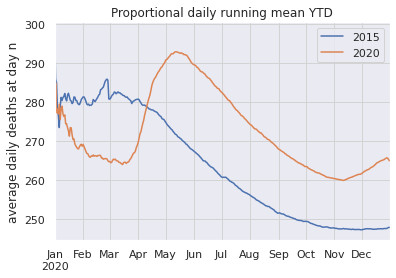

In [179]:
cum_means.plot(y=['2015','2020'],title='Proportional daily running mean YTD')
plt.ylabel('average daily deaths at day n')

In [180]:
cum_means

,2015,2016,2017,2018,2019,2020,2021,2015-2019,2015-2018
2020-01-01,298.00,250.00,347.00,282.00,309.00,260.00,96.00,297.00,294.25
2020-01-02,286.00,263.50,335.50,301.00,296.50,285.00,104.50,296.50,296.50
2020-01-03,285.00,275.33,329.33,301.67,290.67,277.33,106.00,296.33,297.83
2020-01-04,278.25,272.75,325.00,299.25,290.50,278.25,99.50,293.25,293.81
2020-01-05,276.60,271.20,322.20,299.20,289.00,277.00,91.20,291.80,292.30
...,...,...,...,...,...,...,...,...,...
2020-12-27,247.54,247.63,250.38,251.26,242.06,265.59,1.51,248.38,249.20
2020-12-28,247.62,247.69,250.46,251.31,242.01,265.75,1.51,248.41,249.27
2020-12-29,247.75,247.77,250.55,251.36,242.03,265.63,1.51,248.49,249.36
2020-12-30,247.85,247.95,250.63,251.32,242.00,265.29,1.50,248.55,249.44


In [181]:
(cum_means.loc['2020-09-04','2020'] - cum_means.loc['2020-09-04','2015-2019']) 

17.112903225806434

In [182]:
scb_pop

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,8590630,8644119,8692013,8745109,8816381,8837496,8844499,8847625,8854322,8861426,...,9482855,9555893,9644864,9747355,9851017,9995153,10120242,10230185,10327589,10327589


In [183]:
scb.drop(['2015-2018','2015-2019','2021'],axis=1,inplace=True)
scb

,2015,2016,2017,2018,2019,2020
2020-01-01,298,250,347,282,309,260
2020-01-02,274,277,324,320,284,310
2020-01-03,283,299,317,303,279,262
2020-01-04,258,265,312,292,290,281
2020-01-05,270,265,311,299,283,272
...,...,...,...,...,...,...
2020-12-27,229,254,277,246,245,315
2020-12-28,276,267,279,268,221,323
2020-12-29,295,280,282,270,251,223
2020-12-30,286,313,281,238,232,141


In [184]:
pop_15_20 = scb_pop.loc[:,'2014' : '2019']
pop_15_20.columns=['2015','2016','2017','2018','2019','2020']
pop_15_20

,2015,2016,2017,2018,2019,2020
0,9747355,9851017,9995153,10120242,10230185,10327589


In [185]:
scb_per_M = scb / (pop_15_20.values / 1e6)
scb_per_M = scb_per_M[:-4]
scb_per_M

,2015,2016,2017,2018,2019,2020
2020-01-01,30.57,25.38,34.72,27.86,30.20,25.18
2020-01-02,28.11,28.12,32.42,31.62,27.76,30.02
2020-01-03,29.03,30.35,31.72,29.94,27.27,25.37
2020-01-04,26.47,26.90,31.22,28.85,28.35,27.21
2020-01-05,27.70,26.90,31.12,29.54,27.66,26.34
...,...,...,...,...,...,...
2020-12-23,24.01,27.92,27.11,24.80,25.22,27.40
2020-12-24,25.75,31.98,30.71,25.39,25.81,28.95
2020-12-25,27.70,29.64,27.61,24.70,24.83,29.53
2020-12-26,25.96,30.25,26.81,27.17,26.78,31.66


In [186]:
cum_means_per_M = scb_per_M.cumsum().div(np.arange(1,len(scb_per_M) + 1),axis=0)
cum_means_per_M_avg = cum_means_per_M.loc[:,'2015' : '2018'].mean(axis=1)
cum_means_per_M

,2015,2016,2017,2018,2019,2020
2020-01-01,30.57,25.38,34.72,27.86,30.20,25.18
2020-01-02,29.34,26.75,33.57,29.74,28.98,27.60
2020-01-03,29.24,27.95,32.95,29.81,28.41,26.85
2020-01-04,28.55,27.69,32.52,29.57,28.40,26.94
2020-01-05,28.38,27.53,32.24,29.56,28.25,26.82
...,...,...,...,...,...,...
2020-12-23,25.39,25.09,25.02,24.82,23.64,25.67
2020-12-24,25.39,25.11,25.03,24.82,23.65,25.68
2020-12-25,25.40,25.12,25.04,24.82,23.65,25.69
2020-12-26,25.40,25.14,25.04,24.83,23.66,25.70


In [187]:
cum_means_per_M.loc[:'2020-09-18']

,2015,2016,2017,2018,2019,2020
2020-01-01,30.57,25.38,34.72,27.86,30.20,25.18
2020-01-02,29.34,26.75,33.57,29.74,28.98,27.60
2020-01-03,29.24,27.95,32.95,29.81,28.41,26.85
2020-01-04,28.55,27.69,32.52,29.57,28.40,26.94
2020-01-05,28.38,27.53,32.24,29.56,28.25,26.82
...,...,...,...,...,...,...
2020-09-14,25.70,25.05,25.15,25.17,23.45,25.74
2020-09-15,25.68,25.04,25.14,25.16,23.46,25.72
2020-09-16,25.68,25.03,25.13,25.14,23.45,25.71
2020-09-17,25.67,25.03,25.13,25.14,23.45,25.70


In [188]:
last_d = cum_means_per_M.index[-1].date()
last_d

datetime.date(2020, 12, 27)

In [189]:
last_date = last_date - pd.DateOffset(weeks=1)

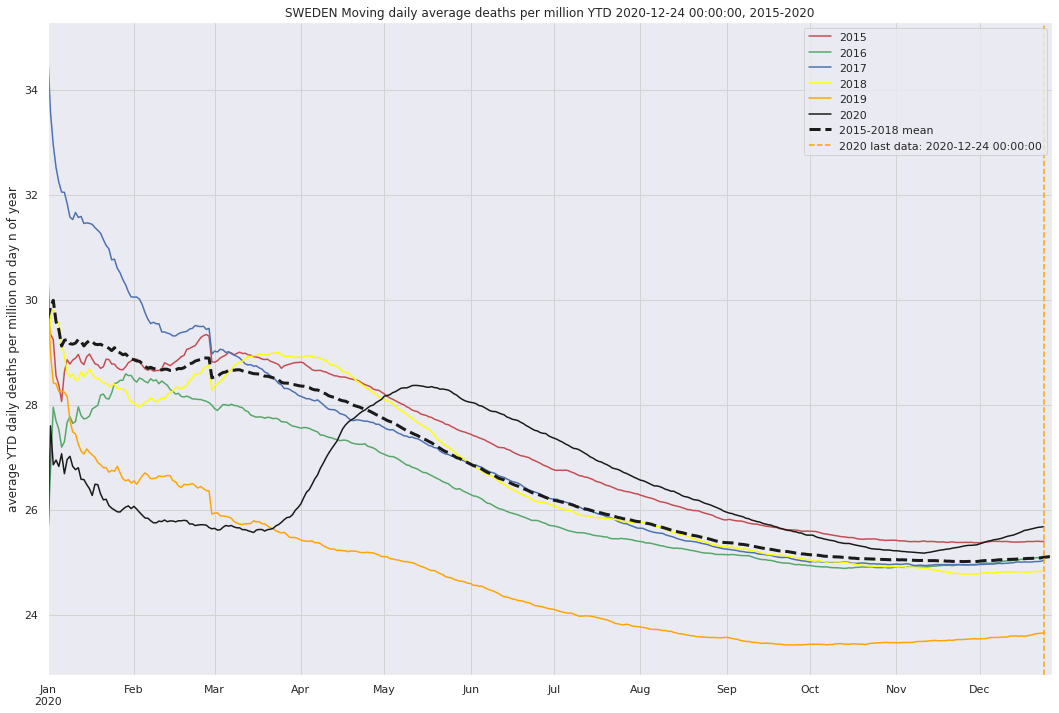

In [190]:
colors = ['r','g','b','yellow','orange','k']
ax = cum_means_per_M.loc[:last_date].plot(
    title='SWEDEN Moving daily average deaths per million YTD {}, 2015-2020'.format(last_date),
                    figsize=(18,12),color=colors)

cum_means_per_M_avg.plot(ax=ax,style='k--',label='2015-2018 mean',lw=3)

plt.ylabel('average YTD daily deaths per million on day n of year')
plt.axvline(last_date,color='orange',ls='dashed',label='2020 last data: {}'.format(last_date))
plt.legend(loc='upper right')
plt.savefig('running_daily_average_deaths.jpg',format='jpg')

In [191]:
total_abs_ytd

1990    95161.0
1991    95202.0
1992    94710.0
1993    97008.0
1994    91844.0
1995    93955.0
1996    94133.0
1997    93326.0
1998    93271.0
1999    94726.0
2000    93461.0
2001    93752.0
2002    95009.0
2003    92961.0
2004    90532.0
2005    91710.0
2006    91177.0
2007    91729.0
2008    91449.0
2009    90080.0
2010    90487.0
2011    89938.0
2012    91938.0
2013    90402.0
2014    88976.0
2015    90907.0
2016    90982.0
2017    91972.0
2018    92185.0
2019    88766.0
2020    97164.0
dtype: float64

In [192]:
pair_wise_years_abs = total_abs_ytd + total_abs_ytd.shift()
pair_wise_years_abs.dropna(inplace=True)
pair_wise_years_abs.index = ['90/91','91/92','92/93','93/94','94/95','95/96','96/97','97/98',
                            '98/99','99/00','00/01','01/02','02/03','03/04','04/05','05/06',
                            '06/07','07/08','08/09','09/10','10/11','11/12','12/13','13/14',
                            '14/15','15/16','16/17','17/18','18/19','19/20']

pair_wise_years_abs / 2


90/91    95181.5
91/92    94956.0
92/93    95859.0
93/94    94426.0
94/95    92899.5
95/96    94044.0
96/97    93729.5
97/98    93298.5
98/99    93998.5
99/00    94093.5
00/01    93606.5
01/02    94380.5
02/03    93985.0
03/04    91746.5
04/05    91121.0
05/06    91443.5
06/07    91453.0
07/08    91589.0
08/09    90764.5
09/10    90283.5
10/11    90212.5
11/12    90938.0
12/13    91170.0
13/14    89689.0
14/15    89941.5
15/16    90944.5
16/17    91477.0
17/18    92078.5
18/19    90475.5
19/20    92965.0
dtype: float64

In [193]:
scb_pop

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,8590630,8644119,8692013,8745109,8816381,8837496,8844499,8847625,8854322,8861426,...,9482855,9555893,9644864,9747355,9851017,9995153,10120242,10230185,10327589,10327589


In [194]:
pair_wise_pop = (scb_pop.T + scb_pop.T.shift()) / 2
pair_wise_pop.dropna(inplace=True)
pair_wise_pop.index = ['90/91','91/92','92/93','93/94','94/95','95/96','96/97','97/98',
                            '98/99','99/00','00/01','01/02','02/03','03/04','04/05','05/06',
                            '06/07','07/08','08/09','09/10','10/11','11/12','12/13','13/14',
                            '14/15','15/16','16/17','17/18','18/19','19/20']

pair_wise_pop = pair_wise_pop[0]
pair_wise_pop

90/91    8.62e+06
91/92    8.67e+06
92/93    8.72e+06
93/94    8.78e+06
94/95    8.83e+06
95/96    8.84e+06
96/97    8.85e+06
97/98    8.85e+06
98/99    8.86e+06
99/00    8.87e+06
00/01    8.90e+06
01/02    8.92e+06
02/03    8.96e+06
03/04    8.99e+06
04/05    9.03e+06
05/06    9.08e+06
06/07    9.15e+06
07/08    9.22e+06
08/09    9.30e+06
09/10    9.38e+06
10/11    9.45e+06
11/12    9.52e+06
12/13    9.60e+06
13/14    9.70e+06
14/15    9.80e+06
15/16    9.92e+06
16/17    1.01e+07
17/18    1.02e+07
18/19    1.03e+07
19/20    1.03e+07
Name: 0, dtype: float64

In [195]:
pair_wise_deaths_per_m = (pair_wise_years_abs / 2) / (pair_wise_pop / 1e6)
pair_wise_deaths_per_m

90/91    11045.30
91/92    10954.69
92/93    10994.82
93/94    10753.76
94/95    10524.54
95/96    10637.26
96/97    10595.62
97/98    10541.04
98/99    10611.86
99/00    10605.54
00/01    10522.36
01/02    10574.90
02/03    10491.47
03/04    10201.39
04/05    10091.40
05/06    10070.31
06/07     9996.95
07/08     9934.12
08/09     9761.18
09/10     9627.03
10/11     9547.09
11/12     9552.94
12/13     9496.50
13/14     9250.00
14/15     9178.47
15/16     9164.94
16/17     9095.22
17/18     9049.29
18/19     8802.07
19/20     9001.62
dtype: float64

In [196]:
pd.to_datetime(last_complete_month).month_name()

'December'

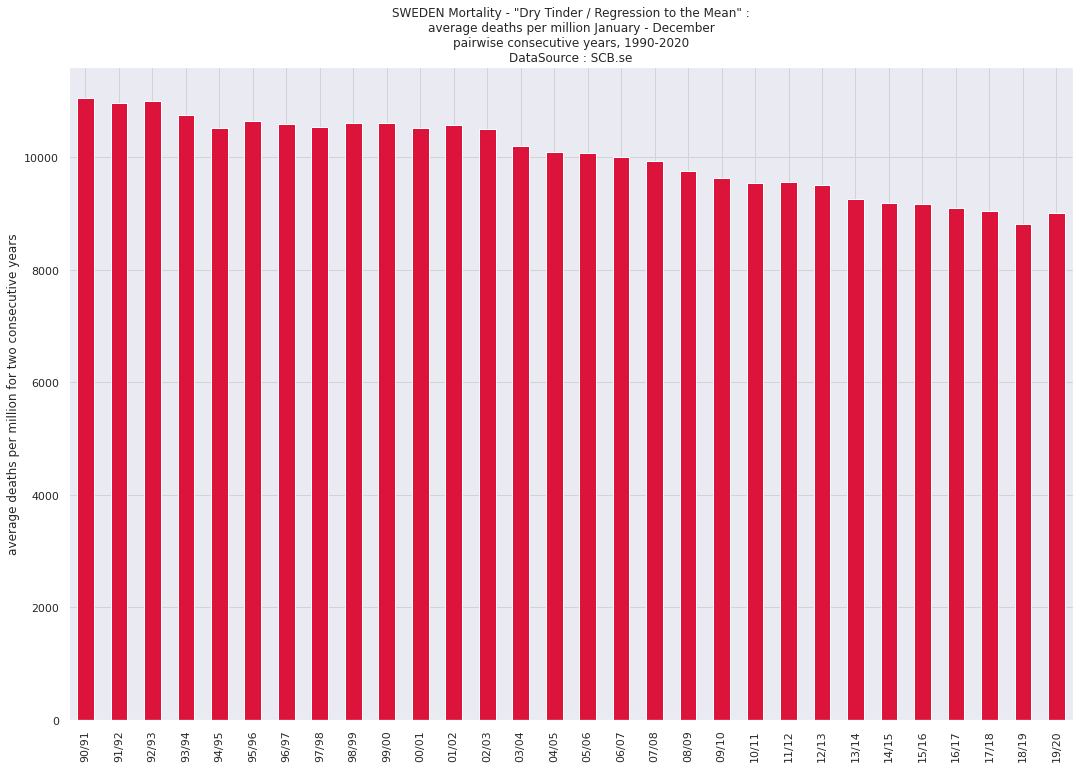

In [197]:
title='SWEDEN Mortality - "Dry Tinder / Regression to the Mean" :'\
'\naverage deaths per million January - {}\n'\
'pairwise consecutive years, 1990-2020\nDataSource : SCB.se'.format(
    pd.to_datetime(last_complete_month).month_name())

pair_wise_deaths_per_m.plot(kind='bar',figsize=(18,12),title=title,color='crimson')
plt.ylabel('average deaths per million for two consecutive years')
plt.savefig('sweden_regression_to_mean.jpg',format='jpg')

In [198]:
print (years_per_M.min())
print (years_per_M.apply(lambda x : years_per_M.index[x.argmin()]))

month
Jan    800.69
Feb    725.80
Mar    756.62
Apr    716.03
May    681.49
Jun    644.26
Jul    674.36
Aug    668.85
Sep    649.04
Oct    695.06
Nov    696.09
Dec    766.82
dtype: float64
month
Jan    2020
Feb    2020
Mar    2019
Apr    2019
May    2018
Jun    2019
Jul    2019
Aug    2020
Sep    2020
Oct    2020
Nov    2018
Dec    2019
dtype: int64


In [199]:
years_per_M

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1990,1019.60,881.73,982.28,930.37,924.54,865.63,897.71,874.73,859.33,884.99,918.94,1037.45
1991,1041.25,861.31,927.86,919.28,923.92,886.35,928.21,872.90,883.69,865.25,911.98,991.51
1992,1054.52,967.89,960.63,893.84,866.96,869.39,877.00,832.70,836.28,889.11,891.76,956.13
1993,1007.27,874.68,1043.52,902.21,861.49,833.62,860.23,833.50,838.21,864.70,905.19,1268.21
1994,1045.83,828.42,881.35,818.18,845.50,805.77,877.25,815.22,871.22,854.72,855.29,918.69
1995,945.67,838.99,918.63,925.22,885.00,833.99,845.92,825.47,833.31,853.99,875.69,1049.51
1996,1149.97,925.47,907.20,842.73,855.10,812.42,825.82,812.54,809.93,852.49,855.89,993.57
1997,1065.41,929.61,912.80,854.44,863.52,827.53,836.50,834.00,828.44,865.00,815.83,915.07
1998,915.97,891.14,978.33,905.20,841.26,794.32,836.83,834.11,791.60,865.86,889.55,989.78


In [200]:
odd_years = years_per_M.iloc[1::2]
even_years = years_per_M.iloc[2::2]
print (odd_years)
even_years

month      Jan     Feb      Mar     Apr     May     Jun     Jul     Aug  \
year                                                                      
1991   1041.25  861.31   927.86  919.28  923.92  886.35  928.21  872.90   
1993   1007.27  874.68  1043.52  902.21  861.49  833.62  860.23  833.50   
1995    945.67  838.99   918.63  925.22  885.00  833.99  845.92  825.47   
1997   1065.41  929.61   912.80  854.44  863.52  827.53  836.50  834.00   
1999    975.86  955.58  1027.64  848.85  853.04  785.29  837.29  850.55   
2001    932.88  842.34   937.28  898.60  890.71  842.34  861.74  825.32   
2003   1042.68  851.54   929.32  861.61  813.71  769.84  834.42  813.15   
2005    910.23  871.57  1033.85  882.64  823.05  791.14  796.02  787.82   
2007    919.50  838.25   952.76  849.81  790.81  769.87  785.35  763.65   
2009   1007.16  848.18   860.08  788.25  787.50  730.47  742.05  728.11   
2011    911.01  767.09   858.78  792.94  770.89  707.90  758.65  740.61   
2013    911.46  822.59   

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1992,1054.52,967.89,960.63,893.84,866.96,869.39,877.00,832.70,836.28,889.11,891.76,956.13
1994,1045.83,828.42,881.35,818.18,845.50,805.77,877.25,815.22,871.22,854.72,855.29,918.69
1996,1149.97,925.47,907.20,842.73,855.10,812.42,825.82,812.54,809.93,852.49,855.89,993.57
1998,915.97,891.14,978.33,905.20,841.26,794.32,836.83,834.11,791.60,865.86,889.55,989.78
2000,1110.28,924.78,912.58,848.48,847.01,794.90,843.39,820.22,814.91,840.68,842.04,922.30
2002,951.47,836.45,1012.01,915.19,850.16,792.31,845.89,854.76,806.58,906.43,867.12,988.09
2004,970.04,820.21,875.58,807.51,827.23,777.10,798.71,802.95,779.66,834.80,828.23,924.37
2006,925.21,808.81,898.83,811.99,812.21,786.60,811.66,804.19,789.90,828.81,837.83,888.83
2008,904.60,816.76,904.92,848.24,800.76,764.95,793.29,761.38,770.36,798.16,805.08,911.09


In [201]:
pairwise_years = (odd_years.reset_index(drop=True) + even_years.reset_index(drop=True)) / 2
pairwise_years.index=['91/92','93/94','95/96','97/98','99/00',
                     '01/02','03/04','05/06','07/08','09/10',
                     '11/12','13/14','15/16','17/18','19/20']
pairwise_years

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
91/92,1047.88,914.60,944.24,906.56,895.44,877.87,902.60,852.80,859.98,877.18,901.87,973.82
93/94,1026.55,851.55,962.43,860.19,853.49,819.70,868.74,824.36,854.71,859.71,880.24,1093.45
95/96,1047.82,882.23,912.91,883.97,870.05,823.21,835.87,819.01,821.62,853.24,865.79,1021.54
97/98,990.69,910.37,945.56,879.82,852.39,810.92,836.67,834.06,810.02,865.43,852.69,952.43
99/00,1043.07,940.18,970.11,848.67,850.03,790.09,840.34,835.39,815.34,851.17,852.92,968.34
01/02,942.18,839.40,974.64,906.90,870.43,817.33,853.81,840.04,813.81,880.70,867.92,967.64
03/04,1006.36,835.87,902.45,834.56,820.47,773.47,816.56,808.05,793.95,844.96,827.46,937.53
05/06,917.72,840.19,966.34,847.32,817.63,788.87,803.84,796.01,776.68,810.25,814.54,891.16
07/08,912.05,827.51,928.84,849.03,795.78,767.41,789.32,762.52,776.60,808.23,810.21,906.84
09/10,957.95,812.63,858.48,792.87,781.71,729.39,756.43,736.50,735.77,794.55,791.71,879.13


In [202]:
pairwise_years.sum(axis=1)

91/92    10954.85
93/94    10755.13
95/96    10637.26
97/98    10541.05
99/00    10605.64
01/02    10574.80
03/04    10201.70
05/06    10070.55
07/08     9934.34
09/10     9627.10
11/12     9552.68
13/14     9250.65
15/16     9165.40
17/18     9049.50
19/20     8957.25
dtype: float64

In [203]:
month = pd.to_datetime(last_complete_month).month_name()
day = pd.to_datetime(last_complete_month).day

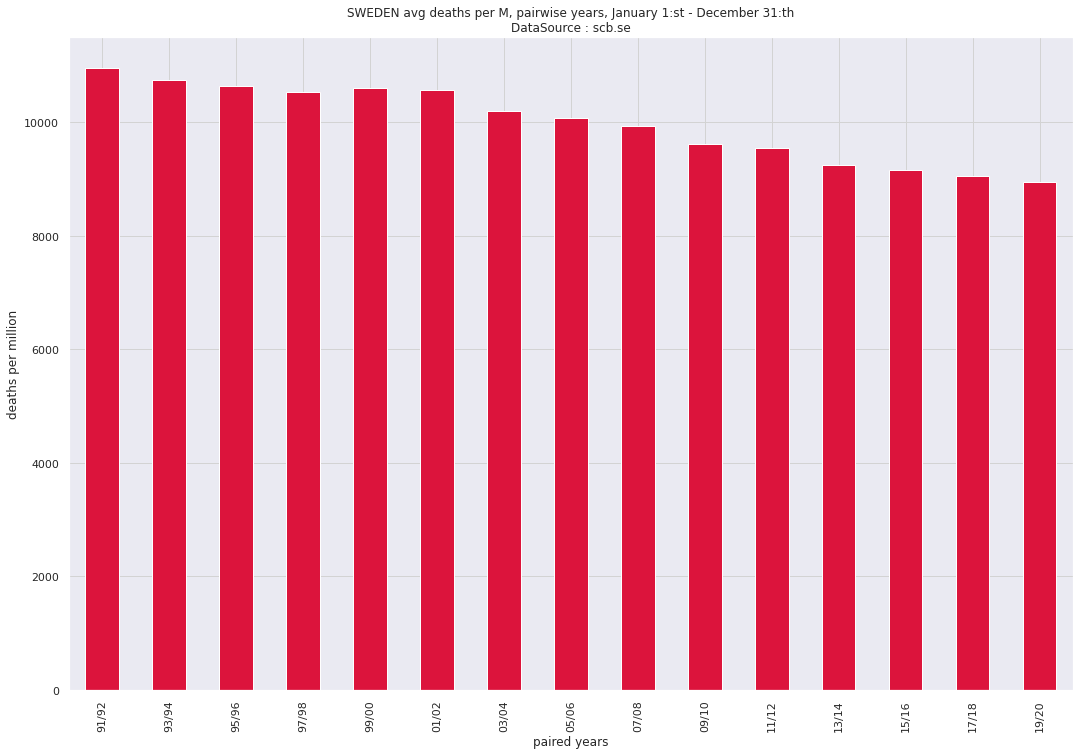

In [204]:
title = 'SWEDEN avg deaths per M, pairwise years, January 1:st - {} {}:th\nDataSource : scb.se'.format(month,day)
pairwise_years.sum(axis=1).plot(kind='bar',figsize=(18,12),color='crimson',title=title)
plt.ylabel('deaths per million')
plt.xlabel('paired years')

plt.savefig('swe_pairwise_years_deaths_per_m_ytd.jpg',format='jpg')

In [205]:
abs_deaths_ytd = abs_deaths.loc[:,:'October'].sum(axis=1)
abs_deaths_ytd

1990    78354.38
1991    78748.05
1992    78648.11
1993    78001.40
1994    76204.00
1995    76941.09
1996    77775.44
1997    78011.60
1998    76630.77
1999    78082.59
2000    77788.78
2001    77573.70
2002    78421.99
2003    77007.78
2004    74738.64
2005    76466.76
2006    75441.56
2007    75953.27
2008    75563.54
2009    74798.64
2010    74427.01
2011    74538.10
2012    76199.23
2013    75227.64
2014    73652.21
2015    75605.68
2016    74941.21
2017    76197.21
2018    77028.22
2019    73386.61
2020    79578.51
dtype: float64

In [206]:
odd_abs = abs_deaths_ytd.iloc[1::2]
even_abs = abs_deaths_ytd.iloc[2::2]
print (odd_abs)
print (even_abs)

1991    78748.05
1993    78001.40
1995    76941.09
1997    78011.60
1999    78082.59
2001    77573.70
2003    77007.78
2005    76466.76
2007    75953.27
2009    74798.64
2011    74538.10
2013    75227.64
2015    75605.68
2017    76197.21
2019    73386.61
dtype: float64
1992    78648.11
1994    76204.00
1996    77775.44
1998    76630.77
2000    77788.78
2002    78421.99
2004    74738.64
2006    75441.56
2008    75563.54
2010    74427.01
2012    76199.23
2014    73652.21
2016    74941.21
2018    77028.22
2020    79578.51
dtype: float64


In [207]:
pairwise_abs = (odd_abs.reset_index(drop=True) + even_abs.reset_index(drop=True)) / 2
pairwise_abs.index=['91/92','93/94','95/96','97/98','99/00',
                     '01/02','03/04','05/06','07/08','09/10',
                     '11/12','13/14','15/16','17/18','19/20']

pairwise_abs

91/92    78698.08
93/94    77102.70
95/96    77358.27
97/98    77321.19
99/00    77935.68
01/02    77997.84
03/04    75873.21
05/06    75954.16
07/08    75758.41
09/10    74612.83
11/12    75368.66
13/14    74439.93
15/16    75273.44
17/18    76612.72
19/20    76482.56
dtype: float64

<AxesSubplot:>

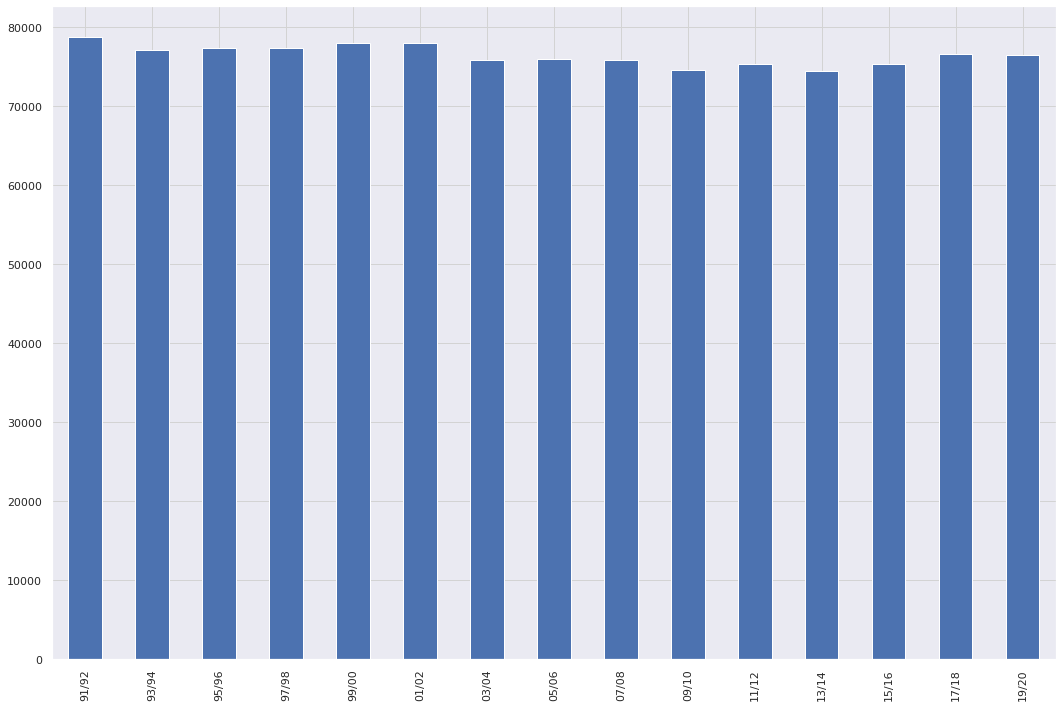

In [208]:
pairwise_abs.plot(kind='bar',figsize=(18,12))